In [1]:
%%HTML 
<script>
    function luc21893_refresh_cell(cell) {
        if( cell.luc21893 ) return;
        cell.luc21893 = true;
        console.debug('New code cell found...' );
        
        var div = document.createElement('DIV');            
        cell.parentNode.insertBefore( div, cell.nextSibling );
        div.style.textAlign = 'right';
        var a = document.createElement('A');
        div.appendChild(a);
        a.href='#'
        a.luc21893 = cell;
        a.setAttribute( 'onclick', "luc21893_toggle(this); return false;" );

        cell.style.visibility='hidden';
        cell.style.position='absolute';
        a.innerHTML = '[show code]';        
                
    }
    function luc21893_refresh() {                
        if( document.querySelector('.code_cell .input') == null ) {            
            // it apeears that I am in a exported html
            // hide this code
            var codeCells = document.querySelectorAll('.jp-InputArea')
            codeCells[0].style.visibility = 'hidden';
            codeCells[0].style.position = 'absolute';                        
            for( var i = 1; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i].parentNode)
            }
            window.onload = luc21893_refresh;
        }                 
        else {
            // it apperas that I am in a jupyter editor
            var codeCells = document.querySelectorAll('.code_cell .input')
            for( var i = 0; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i])
            }            
            window.setTimeout( luc21893_refresh, 1000 )
        }        
    }
    
    function luc21893_toggle(a) {
        if( a.luc21893.style.visibility=='hidden' ) {
            a.luc21893.style.visibility='visible';        
            a.luc21893.style.position='';
            a.innerHTML = '[hide code]';
        }
        else {
            a.luc21893.style.visibility='hidden';        
            a.luc21893.style.position='absolute';
            a.innerHTML = '[show code]';
        }
    }
    
    luc21893_refresh()
</script>

In [2]:
from IPython.display import display, HTML

# Afficher un titre centré et sous-ligné avec une taille de police plus grande
display(HTML('<center><h1>Analyse actionnaires</h1></center>'))


In [3]:
from IPython.display import display, HTML


# Insérer une ligne de soulignement
display(HTML("<hr>"))

In [4]:
import random
import pandas as pd
import string
import numpy as np
from datetime import datetime, timedelta


# Fonction pour générer une combinaison de 6 lettres aléatoires
def generer_combinaison():
    lettres = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    return ''.join(random.choice(lettres) for _ in range(6))

# Générer une liste de 20 000 combinaisons de noms complets uniques
noms_complets = set()
while len(noms_complets) < 20000:
    nom_complet = f"{generer_combinaison()} {generer_combinaison()}"
    noms_complets.add(nom_complet)

# Répéter aléatoirement les noms complets jusqu'à 12 fois maximum
noms_complets_repetes = []
for nom_complet in noms_complets:
    repetitions = random.randint(0, 12)
    noms_complets_repetes.extend([nom_complet] * repetitions)

# Limiter la liste à 20 000 éléments
noms_complets_final = random.sample(noms_complets_repetes, 20000)

# Créer un DataFrame pandas avec les noms complets
data = pd.DataFrame({'Nom complet': noms_complets_final})
# Fonction pour générer une combinaison de 6 lettres aléatoires
def generer_combinaison():
    lettres = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    return ''.join(random.choice(lettres) for _ in range(6))

# Générer une liste de 35 combinaisons de noms complets uniques répétées 11 fois
noms_complets_35 = []
for _ in range(35):
    nom_complet = f"{generer_combinaison()} {generer_combinaison()}"
    noms_complets_35.extend([nom_complet] * 11)

# Générer une liste de 65 combinaisons de noms complets uniques répétées 12 fois
noms_complets_65 = []
for _ in range(65):
    nom_complet = f"{generer_combinaison()} {generer_combinaison()}"
    noms_complets_65.extend([nom_complet] * 12)

# Combiner les deux listes
noms_complets_final = noms_complets_35 + noms_complets_65

# Créer un DataFrame pandas avec les noms complets
data2 = pd.DataFrame({'Nom complet': noms_complets_final})

# Concaténer les deux DataFrames
data = pd.concat([data, data2], ignore_index=True)

# Initialiser un dictionnaire pour suivre les ID du contact par nom complet
id_du_contact_par_nom = {}

# Générer une liste de noms complets avec répétition
noms_complets = data['Nom complet']

# Générer une liste d'ID de contact basée sur les noms complets (mêmes noms auront les mêmes ID)
ids_contacts = [''.join(random.choices(string.ascii_uppercase + string.digits, k=10)) + ''.join(random.choices(string.ascii_uppercase, k=2)) for _ in range(21165)]

# Remplir le dictionnaire ID du contact par nom complet
for nom_complet, id_contact in zip(noms_complets, ids_contacts):
    if nom_complet not in id_du_contact_par_nom:
        id_du_contact_par_nom[nom_complet] = id_contact

# Utiliser le dictionnaire pour obtenir les ID du contact pour chaque nom complet
data['ID du contact'] = [id_du_contact_par_nom[nom_complet] for nom_complet in noms_complets]

# Créer une colonne 'âge' en attribuant un âge aléatoire entre 0 et 90 à chaque ID du contact unique
unique_ids = data['ID du contact'].unique()
ages = [random.randint(0, 90) for _ in range(len(unique_ids))]

# Créer un dictionnaire pour associer chaque ID du contact à son âge
id_to_age = dict(zip(unique_ids, ages))

# Appliquer l'âge correspondant à chaque ID du contact dans le DataFrame original
data['âge'] = data['ID du contact'].map(id_to_age)

territoires = [
    "Alsace", "Aquitaine", "Auvergne", "Basse-Normandie", "Bourgogne", "Bretagne", "Centre", "Champagne-Ardenne", 
    "Corse", "Franche-Comté", "Haute-Normandie", "Île-de-France", "Languedoc-Roussillon", "Limousin", "Lorraine", 
    "Midi-Pyrénées", "Nord-Pas-de-Calais", "Pays de la Loire", "Picardie", "Poitou-Charentes", "Provence-Alpes-Côte d'Azur", 
    "Rhône-Alpes"
]

# Associer aléatoirement un territoire à chaque ID du contact unique
territoire_par_id = {id_contact: random.choice(territoires) for id_contact in unique_ids}

# Appliquer les attributions de territoire au DataFrame
data['Territoire Terre de Liens'] = data['ID du contact'].map(territoire_par_id)
# Afficher les premières lignes du DataFrame pour vérification


# Générer aléatoirement des valeurs 0 ou 1 pour chaque ID du contact unique
valeurs_adherent_n_1 = np.random.randint(0, 2, size=len(unique_ids))
valeurs_adherent_n = np.random.randint(0, 2, size=len(unique_ids))
valeurs_donateur_n = np.random.randint(0, 2, size=len(unique_ids))

# Créer des dictionnaires pour associer chaque ID du contact à ses valeurs respectives
adherent_n_1_par_id = dict(zip(unique_ids, valeurs_adherent_n_1))
adherent_n_par_id = dict(zip(unique_ids, valeurs_adherent_n))
donateur_n_par_id = dict(zip(unique_ids, valeurs_donateur_n))

# Appliquer les valeurs correspondantes aux colonnes du DataFrame
data['adhérent N-1'] = data['ID du contact'].map(adherent_n_1_par_id)
data['adhérent N'] = data['ID du contact'].map(adherent_n_par_id)
data['Donateur N'] = data['ID du contact'].map(donateur_n_par_id)

# Définition de la fonction pour générer une date aléatoire entre deux dates données
def random_date(start_date, end_date):
    return start_date + timedelta(
        days=random.randint(0, (end_date - start_date).days)
    )


# Générer des dates aléatoires pour 'RFM-Date Première Souscription' entre le 01/02/2006 et le 31/07/2022
start_date = datetime(2006, 2, 1)
end_date = datetime(2022, 7, 31)

# Créer un dictionnaire pour associer chaque ID du contact à une date 'RFM-Date Première Souscription' unique
rfm_dates = {id_contact: random_date(start_date, end_date) for id_contact in unique_ids}

# Appliquer les dates correspondantes aux ID du contact dans le DataFrame original
data['RFM-Date Première Souscription'] = data['ID du contact'].map(rfm_dates)


# Créez un dictionnaire pour stocker les dates du dernier don par ID du contact
rfm_date_dernier_don_par_id = {}
this_year = datetime.now().year

# Générez des dates aléatoires pour 'RFM-Date Dernier Don' en fonction de la valeur 'Donateur N'
for id_contact in unique_ids:
    if donateur_n_par_id[id_contact] == 1:
        # Si Donateur N est égal à 1, générez une date entre le 01/01 de cette année et le 31/12 de cette année
        this_year = datetime.now().year
        rfm_date_dernier_don_par_id[id_contact] = random_date(datetime(this_year, 1, 1), datetime(this_year, 12, 31))
    else:
        # Sinon, générez une date entre le 01/01/2006 et le 01/01 de cette année (exclu)
        rfm_date_dernier_don_par_id[id_contact] = random_date(datetime(2006, 1, 1), datetime(this_year, 1, 1))

# Appliquez les dates du dernier don correspondantes aux ID du contact dans le DataFrame original
data['RFM-Date Dernier Don'] = data['ID du contact'].map(rfm_date_dernier_don_par_id)


# Créer une liste de nombres avec des probabilités
# Plus de probabilité d'obtenir un nombre entre 1 et 10, moins de probabilité pour 0, et très rarement pour 10 à 8000
nombres_actions_detenues = []
for _ in range(len(unique_ids)):
    random_value = random.random()
    if random_value < 0.7:  # 70% de chance d'obtenir un nombre entre 1 et 10
        nombre = random.randint(1, 100)
    elif random_value < 0.85:  # 15% de chance d'obtenir un zéro
        nombre = 0
    else:  # 15% de chance d'obtenir un nombre entre 10 et 8000
        nombre = random.randint(101, 8000)
    nombres_actions_detenues.append(nombre)

# Créer un dictionnaire pour associer chaque ID du contact à son nombre d'actions
id_to_actions_detenues = dict(zip(unique_ids, nombres_actions_detenues))

# Appliquer le nombre d'actions correspondant à chaque ID du contact dans le DataFrame original
data['Foncière : Nombre d\'actions détenues'] = data['ID du contact'].map(id_to_actions_detenues)
data["Foncière : Capital possédé"] = data['Foncière : Nombre d\'actions détenues'] * 105
data['Actionnaire ?'] = data['Foncière : Nombre d\'actions détenues'].apply(lambda x: 0 if x == 0 else 1)

nouvel_ordre = [
    'Nom complet', 'ID du contact', 'âge', 'Territoire Terre de Liens', 'Actionnaire ?',
    'adhérent N-1', 'adhérent N', 'Donateur N', 'RFM-Date Première Souscription',
    'RFM-Date Dernier Don', 'Foncière : Capital possédé', 'Foncière : Nombre d\'actions détenues'
]

data = data[nouvel_ordre]
somme_capital = data.drop_duplicates(subset = "ID du contact")
somme_capital = somme_capital['Foncière : Capital possédé'].sum()
data["Foncière : Part du capital possédée (%)"] = data['Foncière : Capital possédé']/somme_capital *100
data['Numéro du contrat'] = ['{:06}'.format(random.randint(0, 999999)) for _ in range(len(data))]
data["Type d'enregistrement des contrats"] = "Foncière - Action PP"
# Fonction pour générer le nombre d'actions à l'acquisition en fonction des probabilités
def generate_nombre_actions():
    random_value = random.random()
    if random_value < 0.50:  # 30% des cas : de 0 à 10 actions
        return random.randint(1, 10)
    elif random_value < 0.75:  # 30% des cas : de 10 à 50 actions
        return random.randint(10, 50)
    elif random_value < 0.90:  # 30% des cas : de 50 à 100 actions
        return random.randint(50, 100)
    else:  # 10% des cas : de 100 à 500 actions
        return random.randint(100, 500)

# Appliquez la fonction pour générer le nombre d'actions à l'acquisition pour chaque ligne
data['Nombre d\'actions à l\'acquisition'] = [generate_nombre_actions() for _ in range(len(data))]

# Fonction pour générer la valeur de "A fait l'objet d'un reçu fiscal" en fonction de la probabilité
def generate_recu_fiscal():
    random_value = random.random()
    if random_value < 0.7688:  # 76,88% de chance d'obtenir 1
        return 1
    else:
        return 0

# Appliquez la fonction pour générer la valeur de "A fait l'objet d'un reçu fiscal" pour chaque ligne
data["A fait l'objet d'un reçu fiscal"] = [generate_recu_fiscal() for _ in range(len(data))]

# Fonction pour générer la valeur de "Affectation" en fonction des proportions spécifiées
def generate_affectation():
    random_value = random.random()
    if random_value < 1/3:  # 1/3 des cas, "Ensemble des fermes de la Foncière"
        return "Ensemble des fermes de la Foncière"
    elif random_value < 2/3:  # 1/3 des cas, "Collecte dédiée" + valeur aléatoire dans "territoires"
        territoires = [
            "Alsace", "Aquitaine", "Auvergne", "Basse-Normandie", "Bourgogne", "Bretagne", "Centre", "Champagne-Ardenne", 
            "Corse", "Franche-Comté", "Haute-Normandie", "Île-de-France", "Languedoc-Roussillon", "Limousin", "Lorraine", 
            "Midi-Pyrénées", "Nord-Pas-de-Calais", "Pays de la Loire", "Picardie", "Poitou-Charentes", "Provence-Alpes-Côte d'Azur", 
            "Rhône-Alpes"
        ]
        random_territoire = random.choice(territoires)
        return f"Collecte dédiée - {random_territoire}"
    else:  # 1/3 des cas, combinaison de 6 lettres aléatoires
        lettres = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
        return ''.join(random.choice(lettres) for _ in range(6))

# Appliquez la fonction pour générer la valeur de "Affectation" pour chaque ligne
data["Affectation"] = [generate_affectation() for _ in range(len(data))]


# Fonction pour générer une combinaison de 6 chiffres aléatoires
def generer_combinaison_chiffres():
    chiffres = '0123456789'
    return ''.join(random.choice(chiffres) for _ in range(6))

# Appliquez la fonction pour générer les valeurs de la colonne "M-XXXXXX"
data["Mouvement de titre Name"] = ["M-" + generer_combinaison_chiffres() for _ in range(len(data))]

# Définissez les valeurs possibles pour la colonne "Nature du mouvement"
valeurs_possibles = ['Souscription'] * 80 + ['Don TDL'] * 7 + ['Rachat'] * 13

# Utilisez numpy.random.choice pour attribuer ces valeurs en fonction des pourcentages
data["Nature du mouvement"] = np.random.choice(valeurs_possibles, size=len(data))

# Fonction pour générer des dates aléatoires entre le 01/01/2006 et aujourd'hui
def generate_date_activation():
    start_date = datetime(2006, 1, 1)
    end_date = datetime.now()
    random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    return random_date

# Appliquer la fonction pour créer la colonne "Date d'activation"
data['Date d\'activation'] = [generate_date_activation() for _ in range(len(data))]
# Générez des dates aléatoires pour chaque ligne en fonction de "RFM-Date Première Souscription"
random_dates = []
for _, row in data.iterrows():
    start_date = row['RFM-Date Première Souscription']
    end_date = datetime(2023, 7, 31)
    random_date = start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
    random_dates.append(random_date)

# Ajoutez la colonne "Date du Mouvement" au DataFrame
data['Date du Mouvement'] = random_dates


# Fonction pour générer "Nombre d'actions échangées" en fonction de "Nature du mouvement"
def generate_actions_echangees(row):
    if row['Nature du mouvement'] == 'Souscription':
        return row['Nombre d\'actions à l\'acquisition']
    else:
        # Vérifiez d'abord que "Nombre d'actions à l'acquisition" est supérieur à zéro
        if row['Nombre d\'actions à l\'acquisition'] > 0:
            # 80% de chance que "Nombre d'actions échangées" soit égal à "Nombre d'actions à l'acquisition"
            # 20% de chance que "Nombre d'actions échangées" soit strictement inférieur à "Nombre d'actions à l'acquisition"
            if np.random.rand() < 0.8:
                return row['Nombre d\'actions à l\'acquisition']
            else:
                return np.random.randint(1, row['Nombre d\'actions à l\'acquisition'] + 1)
        else:
            return 0  # Si "Nombre d'actions à l'acquisition" est zéro, "Nombre d'actions échangées" est également zéro

# Appliquez la fonction pour créer la colonne "Nombre d'actions échangées"
data['Nombre d\'actions échangées'] = data.apply(generate_actions_echangees, axis=1)

# Fonction pour générer "Actions - Date de fin" en fonction des conditions
def generate_actions_date_fin(row):
    if row['Nature du mouvement'] == 'Souscription':
        # Si "Nature du mouvement" est "Souscription"
        if random.random() < 0.5:
            return datetime.now()  # 90% des cas, aujourd'hui
        else:
            return row['Date du Mouvement'] + timedelta(days=random.randint(1, (datetime.now() - row['Date du Mouvement']).days - 1))
    elif (row['Nature du mouvement'] == 'Don TDL' or row['Nature du mouvement'] == 'Rachat') and row['Nombre d\'actions à l\'acquisition'] == row['Nombre d\'actions échangées']:
        # Si "Nature du mouvement" est "Don TDL" ou "Rachat" et "Nombre d'actions à l'acquisition" est égal à "Nombre d'actions échangées"
        return row['Date du Mouvement']
    elif (row['Nature du mouvement'] == 'Don TDL' or row['Nature du mouvement'] == 'Rachat') and row['Nombre d\'actions à l\'acquisition'] > row['Nombre d\'actions échangées']:
        # Si "Nature du mouvement" est "Don TDL" ou "Rachat" et "Nombre d'actions à l'acquisition" est supérieur à "Nombre d'actions échangées"
        if random.random() < 0.9:
            return datetime.now()  # 90% des cas, aujourd'hui
        else:
            return row['Date du Mouvement'] + timedelta(days=random.randint(1, (datetime.now() - row['Date du Mouvement']).days - 1))


# Appliquez la fonction pour créer la colonne "Actions - Date de fin"
data['Actions - Date de fin'] = data.apply(generate_actions_date_fin, axis=1)

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
df = data
df_var_tps_reprise = df.copy()
df_partrachat = df.copy()
df_fidèle = df.copy()
df_doublon = df.copy()
df_serie_sous = df.copy()
df_serie_sousbis = df.copy()
dfretraitrepise = df.copy()
df_parcoursD = df.copy()
df_MS_infos = df.copy()
df_info_parcours = df.copy()
df_parcours =df.copy()
dfsousmoy = df.copy()
df_parcoursD = df.copy()
df_MS_infos = df.copy()
df_info_parcours = df.copy()
df_parcours =df.copy()
dfsousmoy = df.copy()

In [6]:
df_parcours1 = df_parcours[df_parcours["Nature du mouvement"] == "Souscription"]
df_parcours1['Année souscription'] = 'souscription_en_' + df_parcours1['Date du Mouvement'].dt.year.astype(str)
df_parcours1 = df_parcours1.sort_values(by=['ID du contact', "Date du Mouvement"])
df_parcours1 = df_parcours1[["Nom complet","ID du contact", "Année souscription","Nombre d'actions à l'acquisition"]]
df_parcours1 = df_parcours1.pivot_table(index=['Nom complet','ID du contact'], columns='Année souscription', values='Nombre d\'actions à l\'acquisition', aggfunc='sum')
df_parcours2 = df_parcours[df_parcours["Nature du mouvement"] == "Rachat"]
df_parcours2['Année rachat'] = 'Rachat_en_' + df_parcours2['Date du Mouvement'].dt.year.astype(str)
df_parcours2 = df_parcours2.sort_values(by=['ID du contact', "Date du Mouvement"])
df_parcours2 = df_parcours2[["Nom complet","ID du contact", "Année rachat","Nombre d'actions échangées"]]
df_parcours2 = df_parcours2.pivot_table(index=['Nom complet','ID du contact'], columns='Année rachat', values='Nombre d\'actions échangées', aggfunc='sum')
df_parcours1 = df_parcours1.reset_index()
df_parcours2 = df_parcours2.reset_index()
df_parcours = df_parcours1.merge(df_parcours2, on=['Nom complet', 'ID du contact'], how='left')
conditions = [
    (df_info_parcours['âge'] < 25),
    (df_info_parcours['âge'] < 40),
    (df_info_parcours['âge'] < 60)
]

choices = ['0-25 ans', '25-40 ans', '40-60 ans']

df_info_parcours['catégories âge'] = np.select(conditions, choices, default='60 ans et plus')
df_info_parcours['RFM-Date Première Souscription'] = pd.to_datetime(df_info_parcours['RFM-Date Première Souscription'], dayfirst=True)

conditions = [
     (df_info_parcours['RFM-Date Première Souscription'] <= pd.to_datetime('2012')),
     (df_info_parcours['RFM-Date Première Souscription'] <= pd.to_datetime('2017'))
]

choices = ['Nouvel actionnaire en 2012 ou moins', 'Nouvel actionnaire entre 2012 à 2017']

df_info_parcours['ancienneté actionnaires'] = np.select(conditions, choices, default='Nouvel actionnaire depuis 2017 ou plus')
df_info_parcours['RFM-Date Première Souscription'] = pd.to_datetime(df_info_parcours['RFM-Date Première Souscription'], format='%d/%m/%Y')
df_info_parcours['répartition année nouveau actionnaire'] = df_info_parcours['RFM-Date Première Souscription'].dt.year
twenty4_months_ago = datetime.now() - timedelta(days=730)
df_info_parcours['RFM-Date Dernier Don'] = pd.to_datetime(df_info_parcours['RFM-Date Dernier Don'], format='%d/%m/%Y')

df_info_parcours.loc[:, "multi-casquette ?"] = df_info_parcours.apply(lambda row: "Actionnaire-donateur" if row["Actionnaire ?"] == 1 and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)  and row["adhérent N"] == 0 and row['adhérent N-1'] == 0
                                            else "Actionnaire-adhérent" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and row["Donateur N"] == 0 and row['RFM-Date Dernier Don'] < twenty4_months_ago
                                            else "Triple-engagement" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)
                                            else "Plus actionnaire" if row["Actionnaire ?"] == 0 
                                            else "Actionaire uniquement", axis=1)
colonnes_suppr = [
    'Type d\'enregistrement des contrats',
       'Nombre d\'actions à l\'acquisition', 'A fait l\'objet d\'un reçu fiscal',
       'Affectation', 'Mouvement de titre Name', 'Nature du mouvement',
       'Date d\'activation', 'Date du Mouvement', 'Actions - Date de fin',
       'Nombre d\'actions échangées'
]
df_info_parcours = df_info_parcours.drop_duplicates(subset="ID du contact")
df_info_parcours = df_info_parcours.drop(columns=colonnes_suppr)
df_MS_infos = df_MS_infos[(df_MS_infos["Nature du mouvement"] == "Souscription") | (df_MS_infos["Nature du mouvement"] == "Rachat")]
df_MS_infos = df_MS_infos.sort_values(by = ["ID du contact", "Nature du mouvement", "Date du Mouvement"])
df_MS_infos = df_MS_infos[["Nom complet","ID du contact","Nature du mouvement"]]
df_MS_infos = df_MS_infos.groupby(["ID du contact", "Nature du mouvement"]).size().reset_index(name='Nombre de SS et de rachats')
df_MS_infos = df_MS_infos.pivot_table(index=['ID du contact'], columns='Nature du mouvement', values='Nombre de SS et de rachats', aggfunc='sum')
df_info_parcours = df_info_parcours.merge(df_MS_infos, on=[ 'ID du contact'], how='left')
df_info_parcours = df_info_parcours.rename(columns={'Rachat': 'Nombre de rachats'})
df_info_parcours = df_info_parcours.rename(columns={'Souscription': 'Nombre de souscriptions'})
df_parcours = df_parcours.merge(df_info_parcours, on=["Nom complet",'ID du contact'], how='left')
df_parcours['multi-souscripteur ?'] = df_parcours['Nombre de souscriptions'].apply(lambda x: x > 1)
dfsousmoy = dfsousmoy[dfsousmoy["Nature du mouvement"] == "Souscription"]
dfsousmoy['Nombre de souscriptions'] = dfsousmoy['ID du contact'].map(df['ID du contact'].value_counts())
dfsousmoy = dfsousmoy[["ID du contact", 'Nombre de souscriptions', "Nombre d'actions à l'acquisition"]]
dfsousmoy = dfsousmoy.groupby('ID du contact').agg({'Nombre de souscriptions': 'first', 'Nombre d\'actions à l\'acquisition': 'sum'}).reset_index()
dfsousmoy["Nombre moyen d'actions par souscription"] = dfsousmoy["Nombre d'actions à l'acquisition"]/dfsousmoy["Nombre de souscriptions"]
dfsousmoy = dfsousmoy[["ID du contact", "Nombre moyen d'actions par souscription"]]
df_parcours = df_parcours.merge(dfsousmoy, on=['ID du contact'], how='left')
df_parcoursD = df_parcoursD[df_parcoursD["Actionnaire ?"] == True]
df_parcoursD = df_parcoursD.drop_duplicates(subset = "ID du contact")
df_parcoursD = df_parcoursD[["ID du contact","Foncière : Nombre d'actions détenues"]]
# Calculer les déciles avec des intervalles égaux
deciles = pd.qcut(df_parcoursD["Foncière : Nombre d'actions détenues"], q=11, duplicates='drop')
# En utilisant duplicates='drop'  la fonction supprimera les bornes en double. Cela signifie que si deux valeurs identiques tombent exactement sur une limite d'intervalle, l'une des bornes sera supprimée, de sorte que chaque limite d'intervalle est unique. Cela peut entraîner un nombre réduit d'intervalles si vos données ont beaucoup de valeurs identiques.Il faut donc prévoir des intervalles en plus pour en spécifier 10  soit utiliser q = 11 au lieu de 10 
# Utilisez ces intervalles pour découper les déciles
df_parcoursD['déciles actionnaire'] = deciles
df_parcoursD['déciles actionnaire'] = df_parcoursD['déciles actionnaire'].cat.codes + 1

# Créer une nouvelle colonne avec la catégorie d1 à d10
df_parcoursD['Déciles actionnaires'] = 'Décile ' + df_parcoursD['déciles actionnaire'].astype(str)
df_parcoursD = df_parcoursD[["ID du contact","Déciles actionnaires"]]
df_parcours = df_parcours.merge(df_parcoursD, on=['ID du contact'], how='left')
df_parcours['Déciles actionnaires'] = df_parcours['Déciles actionnaires'].fillna('plus actionnaire')

In [7]:
import warnings
warnings.filterwarnings("ignore")


df['Difference début fin'] = df['Nombre d\'actions à l\'acquisition'] - df['Nombre d\'actions échangées']

df['retrait complet ou partiel'] = df['Difference début fin'].apply(lambda x: 'retrait complet' if x == 0 else 'retrait partiel')

df['année rachat'] = df['Date du Mouvement'].dt.year


df['Date d\'activation'] = pd.to_datetime(df['Date d\'activation'])


df['Date d\'activation'] = df['Date d\'activation'].dt.floor('D')

df['Date du Mouvement'] = pd.to_datetime(df['Date du Mouvement'], dayfirst=True)

df['durée conservation'] = df['Date du Mouvement'] - df['Date d\'activation']
df_don = df[df["Nature du mouvement"] == "Don TDL"]
df_dongraph = df[df["Nature du mouvement"] == "Don TDL"]

df_rachat = df[df["Nature du mouvement"] == "Rachat"]


In [8]:
import numpy as np

# Convertir la colonne en type chaîne de caractères
df['Date d\'activation'] = df['Date d\'activation'].astype(str)

# Extraire l'année de la colonne "Date d'activation" et créer une nouvelle colonne
df['répartition année'] = df['Date d\'activation'].str.extract(r'(\d{4})')





conditions = [
    (df['âge'] < 25),
    (df['âge'] < 40),
    (df['âge'] < 60)
]

choices = ['0-25 ans', '25-40 ans', '40-60 ans']

df['catégories âge'] = np.select(conditions, choices, default='60 ans et plus')

In [9]:
df['RFM-Date Première Souscription'] = pd.to_datetime(df['RFM-Date Première Souscription'], dayfirst=True)

conditions = [
     (df['RFM-Date Première Souscription'] <= pd.to_datetime('2012')),
     (df['RFM-Date Première Souscription'] <= pd.to_datetime('2017'))
]

choices = ['Nouvel actionnaire en 2012 ou moins', 'Nouvel actionnaire entre 2012 à 2017']

df['ancienneté actionnaires'] = np.select(conditions, choices, default='Nouvel actionnaire depuis 2017 ou plus')
df['RFM-Date Première Souscription'] = df['RFM-Date Première Souscription'].astype(str)
df['répartition année nouveau actionnaire'] = df['RFM-Date Première Souscription'].str.extract(r'(\d{4})')


In [10]:
dfpiechart = df[(df["Actionnaire ?"]==1) & (df["Nature du mouvement"] == "Souscription")]
dfpiechart = dfpiechart.drop_duplicates(subset="ID du contact")

In [11]:
dfpiechart1 = df[df["Nature du mouvement"] == "Souscription"]
dfpiechart1 = dfpiechart1.drop_duplicates(subset="ID du contact")

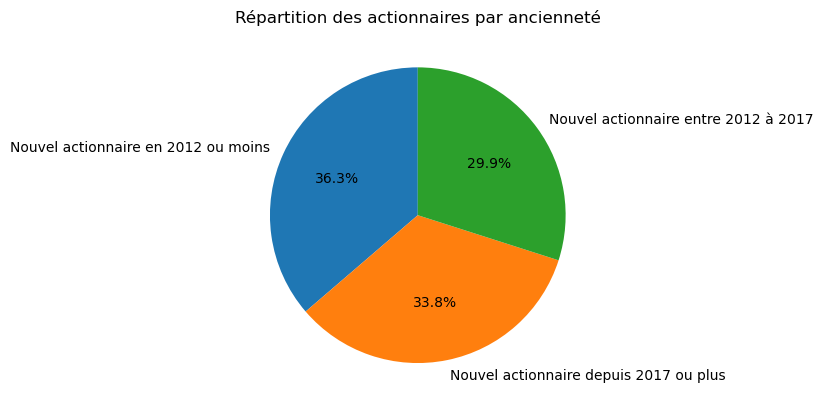

In [12]:
import matplotlib.pyplot as plt

# Calculer les valeurs et les étiquettes pour le pie chart
counts = dfpiechart['ancienneté actionnaires'].value_counts()
percentages = counts / counts.sum() * 100

# Créer le pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des actionnaires par ancienneté")



# Afficher le graphique
plt.show()


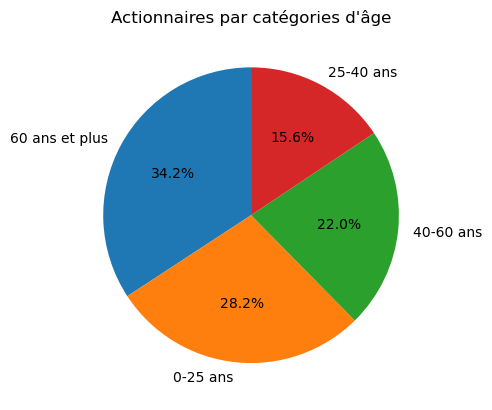

In [13]:
import matplotlib.pyplot as plt
 

# Calculer les valeurs et les étiquettes pour le pie chart
counts = dfpiechart['catégories âge'].value_counts()
percentages = counts / counts.sum() * 100

# Créer le pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Actionnaires par catégories d'âge")



# Afficher le graphique
plt.show()



In [14]:
dfpiechart.rename(columns={'Territoire Terre de Liens': 'Territoire d\'habitation renseigné'}, inplace=True)

In [15]:
from IPython.display import display, Markdown, HTML


# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))
# Afficher un titre avec une taille de police plus grande
display(HTML("<h2>Création distinction multi casquette et multi souscripteur, répartition des actionnaires par nombre de souscriptions, catégories de souscriptions par nombre d'actions</h2>"))

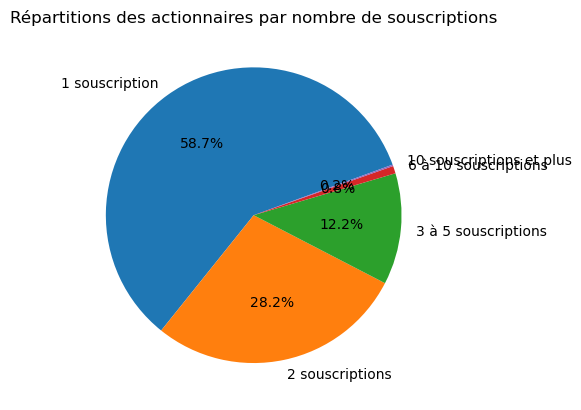

In [16]:
from datetime import datetime, timedelta

df['RFM-Date Dernier Don'] = pd.to_datetime(df['RFM-Date Dernier Don'], format='%d/%m/%Y')

df2 = df[df["Nature du mouvement"]=="Souscription"]
df3 = df2[df2["Actionnaire ?"]==1]
twenty4_months_ago = datetime.now() - timedelta(days=730)
df3.loc[:, "multi-casquette ?"] = df3.apply(lambda row: "Actionnaire-donateur" if row["Actionnaire ?"] == 1 and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)  and row["adhérent N"] == 0 and row['adhérent N-1'] == 0
                                            else "Actionnaire-adhérent" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and row["Donateur N"] == 0 and row['RFM-Date Dernier Don'] < twenty4_months_ago
                                            else "Triple-engagement" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)
                                            else "Actionnaire uniquement", axis=1)

df3.loc[:, 'multi-souscripteur ?'] = df3.duplicated(subset='ID du contact', keep=False)

df3.loc[:, 'Nombre de souscriptions'] = 1

df_MS = df3.groupby('ID du contact').agg({"Nombre d'actions à l'acquisition": 'sum', 'Nombre de souscriptions': 'sum'})

df_MS

conditions = [
     (df_MS['Nombre de souscriptions'] < 2),
     (df_MS['Nombre de souscriptions'] <3),
     (df_MS['Nombre de souscriptions'] <=5),
     (df_MS['Nombre de souscriptions'] <=10),
]

choices = ['1 souscription', "2 souscriptions" , "3 à 5 souscriptions","6 à 10 souscriptions"]

df_MS['Catégories souscripteurs'] = np.select(conditions, choices, default='10 souscriptions et plus')

df_MS = df_MS.merge(df3[['ID du contact','multi-casquette ?','multi-souscripteur ?','ancienneté actionnaires','catégories âge', "Territoire Terre de Liens"]], on='ID du contact', how='left')
df_MS = df_MS.drop_duplicates(subset = "ID du contact")
import pandas as pd

# Calculer les valeurs et les étiquettes pour le pie chart
counts = df_MS['Catégories souscripteurs'].value_counts()
percentages = counts / counts.sum() * 100

# Créer le DataFrame à partir des valeurs calculées
df_cat_nbactions = pd.DataFrame({'Catégories souscripteurs': counts.index,
                         'Nombre de souscripteurs': counts.values,
                         'Pourcentage': percentages.values})


df_cat_nbactions

# Créer le pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=20)
plt.title("Répartitions des actionnaires par nombre de souscriptions")



# Afficher le graphique
plt.show()



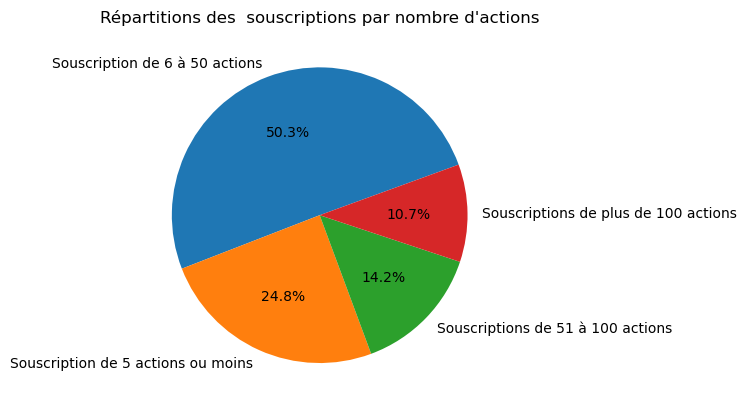

In [17]:
df2 = df.copy()
df2= df2[df2["Nature du mouvement"]== "Souscription"]

df2["catégorie souscription"] = df2.apply( lambda row : "Souscription de 5 actions ou moins" if row["Nombre d'actions à l'acquisition"] <=5
                                          else "Souscription de 6 à 50 actions" if row["Nombre d'actions à l'acquisition"] <= 50
                                          else "Souscriptions de 51 à 100 actions" if row["Nombre d'actions à l'acquisition"] <= 100
                                          else "Souscriptions de plus de 100 actions",
                                          axis = 1) 

counts = df2['catégorie souscription'].value_counts()
percentages = counts / counts.sum() * 100

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=20)
plt.title("Répartitions des  souscriptions par nombre d'actions")



# Afficher le graphique
plt.show()


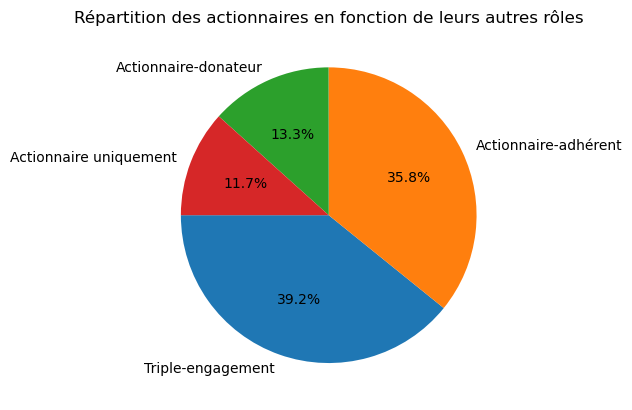

In [18]:
import matplotlib.pyplot as plt

# Calculer les valeurs et les étiquettes pour le pie chart
counts = df_MS['multi-casquette ?'].value_counts()
percentages = counts / counts.sum() * 100

# Créer le pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=180)
plt.title("Répartition des actionnaires en fonction de leurs autres rôles")



# Afficher le graphique
plt.show()

In [19]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Il s'agit de savoir si les actionnaires actuels sont également donateurs N ou adhérent N ou les 3 à la fois (triples-casquettes)</h4>"))

In [20]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>On se rend compte que si l'actionnaire est multi-engagé, il privilégie les 3 types d'engagement combinés</h4>"))

In [21]:
df_MS['multi-souscripteur ?'] = df_MS ['multi-souscripteur ?'].replace({True: "multi-souscripteurs", False: "souscripteurs uniques"})


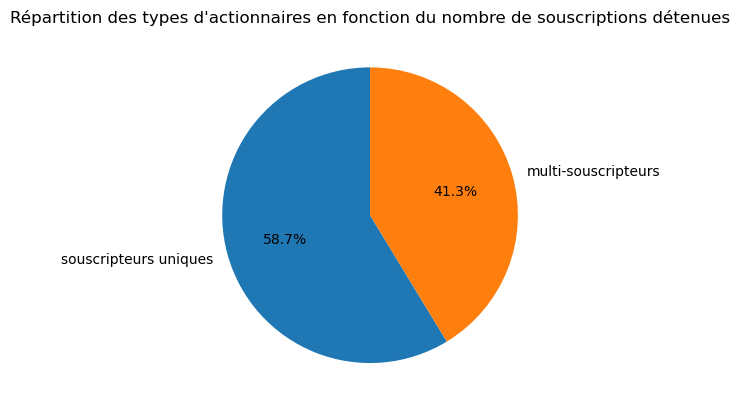

In [22]:
import matplotlib.pyplot as plt

# Calculer les valeurs et les étiquettes pour le pie chart
counts = df_MS ['multi-souscripteur ?'].value_counts()
percentages = counts / counts.sum() * 100

# Créer le pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des types d'actionnaires en fonction du nombre de souscriptions détenues")



# Afficher le graphique
plt.show()

In [23]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Sont souscripteurs uniques les actionnaires qui n'ont qu'une seule souscription et sont multi-souscripteurs les actionnaires qui ont plus d'une souscription</h4>"))

In [24]:
from IPython.display import display, HTML

# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre avec une taille de police plus grande et souligné
display(HTML("<h2><u>Croisement données âges, territoire terre de liens, ancienneté des actionnaires, catégories des multisouscripteurs, multi-souscription et multi-casquette</u></h2>"))


In [25]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h2>Croisement données âges, territoire terre de liens, ancienneté des actionnaires, catégories des multis-souscripteurs, multi-souscription et multi-casquette</h2>"))

In [26]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Répartition des actionnaires en fonction du nombre de souscriptions et de leur âge</h3>"))

In [27]:
df_MS_age = pd.crosstab(index=df_MS['catégories âge'], columns=df_MS['Catégories souscripteurs'], margins=True, margins_name='Total')
new_column_order = ["1 souscription","2 souscriptions", "3 à 5 souscriptions", "6 à 10 souscriptions", "10 souscriptions et plus","Total"]
df_MS_age = df_MS_age.reindex(columns=new_column_order)
df_MS_age

Catégories souscripteurs  1 souscription  2 souscriptions  \
catégories âge                                              
0-25 ans                            1458              683   
25-40 ans                            789              382   
40-60 ans                           1129              539   
60 ans et plus                      1780              870   
Total                               5156             2474   

Catégories souscripteurs  3 à 5 souscriptions  6 à 10 souscriptions  \
catégories âge                                                        
0-25 ans                                  308                    25   
25-40 ans                                 191                     9   
40-60 ans                                 242                    17   
60 ans et plus                            329                    21   
Total                                    1070                    72   

Catégories souscripteurs  10 souscriptions et plus  Total  
catégories âge                                             
0-25 ans                                         0   2474  
25-40 ans                                        2   1373  
40-60 ans                                        5   1932  
60 ans et plus                                   7   3007  
Total                                           14   8786

In [28]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>% de répartition entre les catégories d'âges pour chaque catégorie de souscription</h3>"))

In [29]:
df_col_percent = df_MS_age.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum()  # Ajouter la somme des pourcentages dans la dernière ligne
df_col_percent

Catégories souscripteurs  1 souscription  2 souscriptions  \
catégories âge                                              
0-25 ans                            28.3             27.6   
25-40 ans                           15.3             15.4   
40-60 ans                           21.9             21.8   
60 ans et plus                      34.5             35.2   
Total                              100.0            100.0   

Catégories souscripteurs  3 à 5 souscriptions  6 à 10 souscriptions  \
catégories âge                                                        
0-25 ans                                 28.8                  34.7   
25-40 ans                                17.9                  12.5   
40-60 ans                                22.6                  23.6   
60 ans et plus                           30.7                  29.2   
Total                                   100.0                 100.0   

Catégories souscripteurs  10 souscriptions et plus  Total  
catégories âge                                             
0-25 ans                                       0.0   28.2  
25-40 ans                                     14.3   15.6  
40-60 ans                                     35.7   22.0  
60 ans et plus                                50.0   34.2  
Total                                        100.0  100.0

In [30]:
df_row_percent = df_MS_age.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1)  

df_row_percent

Catégories souscripteurs  1 souscription  2 souscriptions  \
catégories âge                                              
0-25 ans                            58.9             27.6   
25-40 ans                           57.5             27.8   
40-60 ans                           58.4             27.9   
60 ans et plus                      59.2             28.9   
Total                               58.7             28.2   

Catégories souscripteurs  3 à 5 souscriptions  6 à 10 souscriptions  \
catégories âge                                                        
0-25 ans                                 12.4                   1.0   
25-40 ans                                13.9                   0.7   
40-60 ans                                12.5                   0.9   
60 ans et plus                           10.9                   0.7   
Total                                    12.2                   0.8   

Catégories souscripteurs  10 souscriptions et plus  Total  
catégories âge                                             
0-25 ans                                       0.0   99.9  
25-40 ans                                      0.1  100.0  
40-60 ans                                      0.3  100.0  
60 ans et plus                                 0.2   99.9  
Total                                          0.2  100.1

In [31]:
df5 = df3.drop_duplicates(subset="ID du contact")

In [32]:
df_age_MS = pd.crosstab(index=df_MS['catégories âge'], columns=df_MS['multi-souscripteur ?'], margins=True, margins_name='Total')
df_age_MS

multi-souscripteur ?  multi-souscripteurs  souscripteurs uniques  Total
catégories âge                                                         
0-25 ans                             1016                   1458   2474
25-40 ans                             584                    789   1373
40-60 ans                             803                   1129   1932
60 ans et plus                       1227                   1780   3007
Total                                3630                   5156   8786

In [33]:
df_col_percent = df_age_MS.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum()  # Ajouter la somme des pourcentages dans la dernière ligne
df_col_percent

multi-souscripteur ?  multi-souscripteurs  souscripteurs uniques  Total
catégories âge                                                         
0-25 ans                             28.0                   28.3   28.2
25-40 ans                            16.1                   15.3   15.6
40-60 ans                            22.1                   21.9   22.0
60 ans et plus                       33.8                   34.5   34.2
Total                               100.0                  100.0  100.0

In [34]:
df_row_percent = df_age_MS.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1)  

df_row_percent

multi-souscripteur ?  multi-souscripteurs  souscripteurs uniques  Total
catégories âge                                                         
0-25 ans                             41.1                   58.9  100.0
25-40 ans                            42.5                   57.5  100.0
40-60 ans                            41.6                   58.4  100.0
60 ans et plus                       40.8                   59.2  100.0
Total                                41.3                   58.7  100.0

In [35]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Catégories des multi-souscripteurs et multi-engagnement ?</h3>"))

In [36]:
ordre_categories = ['1 souscription', '2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus']
df_MS_MC = pd.crosstab(index=df_MS['multi-casquette ?'], columns=df_MS['Catégories souscripteurs'], margins=True, margins_name='Total')
df_MS_MC = df_MS_MC[ordre_categories + ['Total']]  
df_MS_MC

Catégories souscripteurs  1 souscription  2 souscriptions  \
multi-casquette ?                                           
Actionnaire uniquement               632              265   
Actionnaire-adhérent                1805              924   
Actionnaire-donateur                 681              344   
Triple-engagement                   2038              941   
Total                               5156             2474   

Catégories souscripteurs  3 à 5 souscriptions  6 à 10 souscriptions  \
multi-casquette ?                                                     
Actionnaire uniquement                    122                     4   
Actionnaire-adhérent                      385                    30   
Actionnaire-donateur                      130                    11   
Triple-engagement                         433                    27   
Total                                    1070                    72   

Catégories souscripteurs  10 souscriptions et plus  Total  
multi-casquette ?                                          
Actionnaire uniquement                           1   1024  
Actionnaire-adhérent                             4   3148  
Actionnaire-donateur                             5   1171  
Triple-engagement                                4   3443  
Total                                           14   8786

In [37]:
df_col_percent = df_MS_MC.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum()  # Ajouter la somme des pourcentages dans la dernière ligne
df_col_percent

Catégories souscripteurs  1 souscription  2 souscriptions  \
multi-casquette ?                                           
Actionnaire uniquement              12.3             10.7   
Actionnaire-adhérent                35.0             37.3   
Actionnaire-donateur                13.2             13.9   
Triple-engagement                   39.5             38.0   
Total                              100.0             99.9   

Catégories souscripteurs  3 à 5 souscriptions  6 à 10 souscriptions  \
multi-casquette ?                                                     
Actionnaire uniquement                   11.4                   5.6   
Actionnaire-adhérent                     36.0                  41.7   
Actionnaire-donateur                     12.1                  15.3   
Triple-engagement                        40.5                  37.5   
Total                                   100.0                 100.1   

Catégories souscripteurs  10 souscriptions et plus  Total  
multi-casquette ?                                          
Actionnaire uniquement                         7.1   11.7  
Actionnaire-adhérent                          28.6   35.8  
Actionnaire-donateur                          35.7   13.3  
Triple-engagement                             28.6   39.2  
Total                                        100.0  100.0

In [38]:
df_row_percent = df_MS_MC.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1)  

df_row_percent

Catégories souscripteurs  1 souscription  2 souscriptions  \
multi-casquette ?                                           
Actionnaire uniquement              61.7             25.9   
Actionnaire-adhérent                57.3             29.4   
Actionnaire-donateur                58.2             29.4   
Triple-engagement                   59.2             27.3   
Total                               58.7             28.2   

Catégories souscripteurs  3 à 5 souscriptions  6 à 10 souscriptions  \
multi-casquette ?                                                     
Actionnaire uniquement                   11.9                   0.4   
Actionnaire-adhérent                     12.2                   1.0   
Actionnaire-donateur                     11.1                   0.9   
Triple-engagement                        12.6                   0.8   
Total                                    12.2                   0.8   

Catégories souscripteurs  10 souscriptions et plus  Total  
multi-casquette ?                                          
Actionnaire uniquement                         0.1  100.0  
Actionnaire-adhérent                           0.1  100.0  
Actionnaire-donateur                           0.4  100.0  
Triple-engagement                              0.1  100.0  
Total                                          0.2  100.1

In [39]:
df_nbcroisés = pd.crosstab(index=df_MS['multi-casquette ?'], columns=df_MS['multi-souscripteur ?'], margins=True, margins_name='Total')
df_nbcroisés

multi-souscripteur ?    multi-souscripteurs  souscripteurs uniques  Total
multi-casquette ?                                                        
Actionnaire uniquement                  392                    632   1024
Actionnaire-adhérent                   1343                   1805   3148
Actionnaire-donateur                    490                    681   1171
Triple-engagement                      1405                   2038   3443
Total                                  3630                   5156   8786

In [40]:
df_col_percent = df_nbcroisés.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum()  # Ajouter la somme des pourcentages dans la dernière ligne
df_col_percent

multi-souscripteur ?    multi-souscripteurs  souscripteurs uniques  Total
multi-casquette ?                                                        
Actionnaire uniquement                 10.8                   12.3   11.7
Actionnaire-adhérent                   37.0                   35.0   35.8
Actionnaire-donateur                   13.5                   13.2   13.3
Triple-engagement                      38.7                   39.5   39.2
Total                                 100.0                  100.0  100.0

In [41]:
df_row_percent = df_nbcroisés.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1)  

df_row_percent


multi-souscripteur ?    multi-souscripteurs  souscripteurs uniques  Total
multi-casquette ?                                                        
Actionnaire uniquement                 38.3                   61.7  100.0
Actionnaire-adhérent                   42.7                   57.3  100.0
Actionnaire-donateur                   41.8                   58.2  100.0
Triple-engagement                      40.8                   59.2  100.0
Total                                  41.3                   58.7  100.0

In [42]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Catégories des multi-souscripteurs et ancienneté </h3>"))

In [43]:

ordre_categories_souscripteurs = ['1 souscription', '2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus']
ordre_categories_ancienneté = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']
df_MS_ancienneté = pd.crosstab(index=df_MS["Catégories souscripteurs"], columns=df_MS["ancienneté actionnaires"], margins=True, margins_name='Total')
df_MS_ancienneté = df_MS_ancienneté.reindex(index=ordre_categories_souscripteurs, columns=ordre_categories_ancienneté)
df_MS_ancienneté['Total'] = df_MS_ancienneté.sum(axis=1)
df_MS_ancienneté.loc['Total'] = df_MS_ancienneté.sum()
df_MS_ancienneté


ancienneté actionnaires   Nouvel actionnaire depuis 2017 ou plus  \
Catégories souscripteurs                                           
1 souscription                                              1736   
2 souscriptions                                              843   
3 à 5 souscriptions                                          359   
6 à 10 souscriptions                                          27   
10 souscriptions et plus                                       2   
Total                                                       2967   

ancienneté actionnaires   Nouvel actionnaire entre 2012 à 2017  \
Catégories souscripteurs                                         
1 souscription                                            1541   
2 souscriptions                                            751   
3 à 5 souscriptions                                        310   
6 à 10 souscriptions                                        21   
10 souscriptions et plus                                     7   
Total                                                     2630   

ancienneté actionnaires   Nouvel actionnaire en 2012 ou moins  Total  
Catégories souscripteurs                                              
1 souscription                                           1879   5156  
2 souscriptions                                           880   2474  
3 à 5 souscriptions                                       401   1070  
6 à 10 souscriptions                                       24     72  
10 souscriptions et plus                                    5     14  
Total                                                    3189   8786

In [44]:
df_col_percent = df_MS_ancienneté.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum()  # Ajouter la somme des pourcentages dans la dernière ligne
df_col_percent 

ancienneté actionnaires   Nouvel actionnaire depuis 2017 ou plus  \
Catégories souscripteurs                                           
1 souscription                                              58.5   
2 souscriptions                                             28.4   
3 à 5 souscriptions                                         12.1   
6 à 10 souscriptions                                         0.9   
10 souscriptions et plus                                     0.1   
Total                                                      100.0   

ancienneté actionnaires   Nouvel actionnaire entre 2012 à 2017  \
Catégories souscripteurs                                         
1 souscription                                            58.6   
2 souscriptions                                           28.6   
3 à 5 souscriptions                                       11.8   
6 à 10 souscriptions                                       0.8   
10 souscriptions et plus                                   0.3   
Total                                                    100.1   

ancienneté actionnaires   Nouvel actionnaire en 2012 ou moins  Total  
Catégories souscripteurs                                              
1 souscription                                           58.9   58.7  
2 souscriptions                                          27.6   28.2  
3 à 5 souscriptions                                      12.6   12.2  
6 à 10 souscriptions                                      0.8    0.8  
10 souscriptions et plus                                  0.2    0.2  
Total                                                   100.1  100.1

In [45]:
df_row_percent = df_MS_ancienneté.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1)  

df_row_percent

ancienneté actionnaires   Nouvel actionnaire depuis 2017 ou plus  \
Catégories souscripteurs                                           
1 souscription                                              33.7   
2 souscriptions                                             34.1   
3 à 5 souscriptions                                         33.6   
6 à 10 souscriptions                                        37.5   
10 souscriptions et plus                                    14.3   
Total                                                       33.8   

ancienneté actionnaires   Nouvel actionnaire entre 2012 à 2017  \
Catégories souscripteurs                                         
1 souscription                                            29.9   
2 souscriptions                                           30.4   
3 à 5 souscriptions                                       29.0   
6 à 10 souscriptions                                      29.2   
10 souscriptions et plus                                  50.0   
Total                                                     29.9   

ancienneté actionnaires   Nouvel actionnaire en 2012 ou moins  Total  
Catégories souscripteurs                                              
1 souscription                                           36.4  100.0  
2 souscriptions                                          35.6  100.1  
3 à 5 souscriptions                                      37.5  100.1  
6 à 10 souscriptions                                     33.3  100.0  
10 souscriptions et plus                                 35.7  100.0  
Total                                                    36.3  100.0

In [46]:
df_ancienneté_MS = pd.crosstab(index=df_MS ['ancienneté actionnaires'], columns=df_MS ['multi-souscripteur ?'], margins=True, margins_name='Total')
df_ancienneté_MS = df_ancienneté_MS.reindex(index=ordre_categories_ancienneté)
df_ancienneté_MS.loc['Total'] = df_ancienneté_MS.sum()
df_ancienneté_MS

multi-souscripteur ?                    multi-souscripteurs  \
ancienneté actionnaires                                       
Nouvel actionnaire depuis 2017 ou plus                 1231   
Nouvel actionnaire entre 2012 à 2017                   1089   
Nouvel actionnaire en 2012 ou moins                    1310   
Total                                                  3630   

multi-souscripteur ?                    souscripteurs uniques  Total  
ancienneté actionnaires                                               
Nouvel actionnaire depuis 2017 ou plus                   1736   2967  
Nouvel actionnaire entre 2012 à 2017                     1541   2630  
Nouvel actionnaire en 2012 ou moins                      1879   3189  
Total                                                    5156   8786

In [47]:
df_col_percent = df_ancienneté_MS.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum()  # Ajouter la somme des pourcentages dans la dernière ligne
df_col_percent

multi-souscripteur ?                    multi-souscripteurs  \
ancienneté actionnaires                                       
Nouvel actionnaire depuis 2017 ou plus                 33.9   
Nouvel actionnaire entre 2012 à 2017                   30.0   
Nouvel actionnaire en 2012 ou moins                    36.1   
Total                                                 100.0   

multi-souscripteur ?                    souscripteurs uniques  Total  
ancienneté actionnaires                                               
Nouvel actionnaire depuis 2017 ou plus                   33.7   33.8  
Nouvel actionnaire entre 2012 à 2017                     29.9   29.9  
Nouvel actionnaire en 2012 ou moins                      36.4   36.3  
Total                                                   100.0  100.0

In [48]:
df_row_percent = df_ancienneté_MS.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1)  

df_row_percent

multi-souscripteur ?                    multi-souscripteurs  \
ancienneté actionnaires                                       
Nouvel actionnaire depuis 2017 ou plus                 41.5   
Nouvel actionnaire entre 2012 à 2017                   41.4   
Nouvel actionnaire en 2012 ou moins                    41.1   
Total                                                  41.3   

multi-souscripteur ?                    souscripteurs uniques  Total  
ancienneté actionnaires                                               
Nouvel actionnaire depuis 2017 ou plus                   58.5  100.0  
Nouvel actionnaire entre 2012 à 2017                     58.6  100.0  
Nouvel actionnaire en 2012 ou moins                      58.9  100.0  
Total                                                    58.7  100.0

In [49]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Ancienneté et multi-casquettes ? </h3>"))

In [50]:
df_ancienneté_MC = pd.crosstab(index=df_MS['ancienneté actionnaires'], columns=df_MS['multi-casquette ?'], margins=True, margins_name='Total')
df_ancienneté_MC = df_ancienneté_MC.reindex(index=ordre_categories_ancienneté)
df_ancienneté_MC.loc['Total'] = df_ancienneté_MC.sum()

In [51]:
# Calculer les pourcentages de colonnes
df_col_percent_ancienneté_MC = df_ancienneté_MC.copy()
df_col_percent_ancienneté_MC = df_col_percent_ancienneté_MC.div(df_col_percent_ancienneté_MC.loc['Total']) * 100
df_col_percent_ancienneté_MC = df_col_percent_ancienneté_MC.round(1)
df_col_percent_ancienneté_MC.iloc[-1] = df_col_percent_ancienneté_MC.iloc[:-1].sum()  # Ajouter la somme des pourcentages dans la dernière ligne
df_col_percent_ancienneté_MC


multi-casquette ?                       Actionnaire uniquement  \
ancienneté actionnaires                                          
Nouvel actionnaire depuis 2017 ou plus                    31.5   
Nouvel actionnaire entre 2012 à 2017                      30.8   
Nouvel actionnaire en 2012 ou moins                       37.7   
Total                                                    100.0   

multi-casquette ?                       Actionnaire-adhérent  \
ancienneté actionnaires                                        
Nouvel actionnaire depuis 2017 ou plus                  34.1   
Nouvel actionnaire entre 2012 à 2017                    29.5   
Nouvel actionnaire en 2012 ou moins                     36.4   
Total                                                  100.0   

multi-casquette ?                       Actionnaire-donateur  \
ancienneté actionnaires                                        
Nouvel actionnaire depuis 2017 ou plus                  33.3   
Nouvel actionnaire entre 2012 à 2017                    29.7   
Nouvel actionnaire en 2012 ou moins                     37.0   
Total                                                  100.0   

multi-casquette ?                       Triple-engagement  Total  
ancienneté actionnaires                                           
Nouvel actionnaire depuis 2017 ou plus               34.3   33.8  
Nouvel actionnaire entre 2012 à 2017                 30.1   29.9  
Nouvel actionnaire en 2012 ou moins                  35.6   36.3  
Total                                               100.0  100.0

In [52]:
# Calculer les pourcentages de lignes
df_row_percent_ancienneté_MC = df_ancienneté_MC.copy()
df_row_percent_ancienneté_MC.iloc[:, :-1] = df_row_percent_ancienneté_MC.iloc[:, :-1].div(df_row_percent_ancienneté_MC['Total'], axis=0) * 100
df_row_percent_ancienneté_MC = df_row_percent_ancienneté_MC.round(1)
df_row_percent_ancienneté_MC['Total'] = df_row_percent_ancienneté_MC.iloc[:, :-1].sum(axis=1)
df_row_percent_ancienneté_MC


multi-casquette ?                       Actionnaire uniquement  \
ancienneté actionnaires                                          
Nouvel actionnaire depuis 2017 ou plus                    10.9   
Nouvel actionnaire entre 2012 à 2017                      12.0   
Nouvel actionnaire en 2012 ou moins                       12.1   
Total                                                     11.7   

multi-casquette ?                       Actionnaire-adhérent  \
ancienneté actionnaires                                        
Nouvel actionnaire depuis 2017 ou plus                  36.2   
Nouvel actionnaire entre 2012 à 2017                    35.3   
Nouvel actionnaire en 2012 ou moins                     35.9   
Total                                                   35.8   

multi-casquette ?                       Actionnaire-donateur  \
ancienneté actionnaires                                        
Nouvel actionnaire depuis 2017 ou plus                  13.1   
Nouvel actionnaire entre 2012 à 2017                    13.2   
Nouvel actionnaire en 2012 ou moins                     13.6   
Total                                                   13.3   

multi-casquette ?                       Triple-engagement  Total  
ancienneté actionnaires                                           
Nouvel actionnaire depuis 2017 ou plus               39.8  100.0  
Nouvel actionnaire entre 2012 à 2017                 39.5  100.0  
Nouvel actionnaire en 2012 ou moins                  38.4  100.0  
Total                                                39.2  100.0

In [53]:
import pandas as pd

# Grouper le DataFrame par la colonne "Nom complet" et agréger la somme des actions
df_aggrégé = df3.groupby(['ID du contact', 'multi-casquette ?', 'multi-souscripteur ?',"catégories âge","ancienneté actionnaires"]).agg({'Nombre d\'actions à l\'acquisition': 'sum'}).reset_index()

In [54]:
df3['Nombre de souscriptions'] = df3['ID du contact'].map(df['ID du contact'].value_counts())

In [55]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h2>Nombre d'actions total et moyen par multi-engagement et multi-souscripteurs</h2>"))

In [56]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre moyen d'actions par multi-souscripteurs </h3>"))

In [57]:
df_action_MSmean = df3.groupby("multi-souscripteur ?")["Nombre d'actions à l'acquisition"].mean().round().to_frame()
df_action_MSmean

Nombre d'actions à l'acquisition
multi-souscripteur ?                                  
False                                             55.0
True                                              52.0

In [58]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre total d'actions par multi-souscripteurs </h3>"))

In [59]:
df_action_MSsum = df3
df_action_MSsum = df_action_MSsum.groupby("multi-souscripteur ?")["Nombre d'actions à l'acquisition"].sum().to_frame()
df_action_MSsum

Nombre d'actions à l'acquisition
multi-souscripteur ?                                  
False                                           281704
True                                            478914

In [60]:
# Calculer la somme totale de la colonne "Foncière : Nombre d'actions détenues"
total_sum = df_action_MSsum["Nombre d'actions à l'acquisition"].sum()


print("Somme  des actions détenues", total_sum)

Somme  des actions détenues 760618


In [61]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre moyen d'actions par multi-casquettes </h3>"))

In [62]:
df_action_MCmean = df_aggrégé.groupby('multi-casquette ?')["Nombre d'actions à l'acquisition"].mean().round().to_frame()
df_action_MCmean

Nombre d'actions à l'acquisition
multi-casquette ?                                       
Actionnaire uniquement                              88.0
Actionnaire-adhérent                                87.0
Actionnaire-donateur                                92.0
Triple-engagement                                   84.0

In [63]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre moyen d'actions par ancienneté </h3>"))

In [64]:
df_action_ancienneté_mean = df_aggrégé.groupby('ancienneté actionnaires')["Nombre d'actions à l'acquisition"].mean().round().to_frame()
df_action_ancienneté_mean = df_action_ancienneté_mean.reindex(index=ordre_categories_ancienneté)
df_action_ancienneté_mean

Nombre d'actions à l'acquisition
ancienneté actionnaires                                                 
Nouvel actionnaire depuis 2017 ou plus                              89.0
Nouvel actionnaire entre 2012 à 2017                                89.0
Nouvel actionnaire en 2012 ou moins                                 83.0

In [65]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre moyen d'actions par nombre de souscriptions </h3>"))

In [66]:
df2["catégorie souscription"] = df2.apply( lambda row : "Souscription de 5 actions ou moins" if row["Nombre d'actions à l'acquisition"] <=5
                                          else "Souscription de 6 à 50 actions" if row["Nombre d'actions à l'acquisition"] <= 50
                                          else "Souscriptions de 51 à 100 actions" if row["Nombre d'actions à l'acquisition"] <= 100
                                          else "Souscriptions de plus de 100 actions",
                                          axis = 1) 


In [67]:
df_cat_nbactions_mean = df_MS.groupby('Catégories souscripteurs')["Nombre d'actions à l'acquisition"].mean().round().to_frame()
df_cat_nbactions_mean = df_cat_nbactions_mean.reindex(index=ordre_categories)
df_cat_nbactions_mean

Nombre d'actions à l'acquisition
Catégories souscripteurs                                  
1 souscription                                        55.0
2 souscriptions                                      105.0
3 à 5 souscriptions                                  169.0
6 à 10 souscriptions                                 420.0
10 souscriptions et plus                             486.0

In [68]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre total d'actions par nombre de souscriptions </h3>"))

In [69]:
df_cat_nbactions_sum = df_MS.groupby('Catégories souscripteurs')["Nombre d'actions à l'acquisition"].sum().to_frame()
df_cat_nbactions_sum = df_cat_nbactions_sum.reindex(index=ordre_categories)
df_cat_nbactions_sum

Nombre d'actions à l'acquisition
Catégories souscripteurs                                  
1 souscription                                      281704
2 souscriptions                                     260901
3 à 5 souscriptions                                 180955
6 à 10 souscriptions                                 30247
10 souscriptions et plus                              6811

In [70]:
# Calculer la somme totale de la colonne "Foncière : Nombre d'actions détenues"
total_sum = df_cat_nbactions_sum["Nombre d'actions à l'acquisition"].sum()


print("Somme  des actions prises (différent des actions détenues)", total_sum)

Somme  des actions prises (différent des actions détenues) 760618


In [71]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Capital possédé par multi-souscripteurs</h3>"))

In [72]:

#df3.loc[:, "Foncière : Capital possédé"] = df3["Foncière : Capital possédé"].str.replace(',', '.').astype(float)
#df3.loc[:, "Foncière : Part du capital possédée (%)"] = df3["Foncière : Part du capital possédée (%)"].str.replace(',', '.').astype(float)

df4 = df3.drop_duplicates(subset="ID du contact")
df_capital_MC = df4.groupby("multi-souscripteur ?").agg({
    "Foncière : Capital possédé": "sum",
    "Foncière : Part du capital possédée (%)": "sum"
})
df_capital_MC


Foncière : Capital possédé  \
multi-souscripteur ?                               
False                                  412118805   
True                                   282614850   

                      Foncière : Part du capital possédée (%)  
multi-souscripteur ?                                           
False                                               51.881907  
True                                                35.578569

In [73]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Capital possédé par catégories d'ancienneté</h3>"))

In [74]:
df6 = df3.drop_duplicates(subset="ID du contact")
#df6.loc[:, "Foncière : Part du capital possédée (%)"] = df6["Foncière : Part du capital possédée (%)"].astype(float).apply(lambda x: round(float(x), 2))
df_capital_ancienneté = df6.groupby("ancienneté actionnaires").agg({
    "Foncière : Capital possédé": "sum",
    "Foncière : Part du capital possédée (%)": "sum"
})
df_capital_ancienneté = df_capital_ancienneté.reindex(index=ordre_categories_ancienneté)
df_capital_ancienneté

Foncière : Capital possédé  \
ancienneté actionnaires                                              
Nouvel actionnaire depuis 2017 ou plus                   225978270   
Nouvel actionnaire entre 2012 à 2017                     206575845   
Nouvel actionnaire en 2012 ou moins                      262179540   

                                        Foncière : Part du capital possédée (%)  
ancienneté actionnaires                                                          
Nouvel actionnaire depuis 2017 ou plus                                28.448553  
Nouvel actionnaire entre 2012 à 2017                                  26.005969  
Nouvel actionnaire en 2012 ou moins                                   33.005955

In [75]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Capital possédé par nombre de souscriptions de l'actionnaire</h3>"))

In [76]:
conditions = [
     (df3['Nombre de souscriptions'] < 2),
     (df3['Nombre de souscriptions'] <3),
     (df3['Nombre de souscriptions'] <=5),
     (df3['Nombre de souscriptions'] <=10),
]

choices = ['1 souscription', "2 souscriptions" , "3 à 5 souscriptions","6 à 10 souscriptions"]

df3['Catégories souscripteurs'] = np.select(conditions, choices, default='10 souscriptions et plus')


In [77]:
df6 = df3.drop_duplicates(subset="ID du contact")
#df6.loc[:, "Foncière : Part du capital possédée (%)"] = df6["Foncière : Part du capital possédée (%)"].astype(str).apply(lambda x: round(float(x), 2))
df_capital_nbsous = df6.groupby("Catégories souscripteurs").agg({
    "Foncière : Capital possédé": "sum",
    "Foncière : Part du capital possédée (%)": "sum"
})
df_capital_nbsous =  df_capital_nbsous.reindex(index=ordre_categories)
df_capital_nbsous

Foncière : Capital possédé  \
Catégories souscripteurs                               
1 souscription                             327246990   
2 souscriptions                            229901385   
3 à 5 souscriptions                        130627350   
6 à 10 souscriptions                         2308320   
10 souscriptions et plus                     4649610   

                          Foncière : Part du capital possédée (%)  
Catégories souscripteurs                                           
1 souscription                                          41.197339  
2 souscriptions                                         28.942437  
3 à 5 souscriptions                                     16.444763  
6 à 10 souscriptions                                     0.290596  
10 souscriptions et plus                                 0.585342

In [78]:
from IPython.display import display, HTML

# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Part des multi-souscripteurs parmi les actionnaires par années</u></h2></center>'))


In [79]:
dffid = df.copy()
import pandas as pd

# Créer une fonction pour vérifier les conditions
def is_retrait_definitif(row):
    same_contact_rows = dffid[dffid['ID du contact'] == row['ID du contact']]
    later_rows = same_contact_rows[pd.to_datetime(same_contact_rows['Actions - Date de fin'], format="%d/%m/%Y") > pd.to_datetime(row['Actions - Date de fin'], format="%d/%m/%Y")]
    return (row['Nature du mouvement'] in ['Rachat', 'Don TDL'] and later_rows.empty)

# Appliquer la fonction pour créer la variable conditionnelle
dffid['fin actionnariat'] = dffid.apply(is_retrait_definitif, axis=1).map({True: 'fin actionnariat', False: 'toujours actionnaire'})

actionnairefin = dffid[dffid['fin actionnariat']== "fin actionnariat"]
actionnairefin = actionnairefin.drop_duplicates(subset = "ID du contact")
actionnairefin["année fin actionnariat"] = actionnairefin['Actions - Date de fin'].dt.year
nbactionnairefin = actionnairefin["année fin actionnariat"].value_counts().sort_index().to_frame()
dffid_nbactionnaire_par_an = dffid[dffid["Nature du mouvement"] == "Souscription"]
dffid_nbactionnaire_par_an = dffid_nbactionnaire_par_an.drop_duplicates(subset = "ID du contact")
dffid_nbactionnaire_par_an = dffid_nbactionnaire_par_an["répartition année nouveau actionnaire"].value_counts().sort_index().to_frame()
dffid_nbactionnaire_par_an['effectif cumulé'] = dffid_nbactionnaire_par_an['count'].cumsum()
dffid_nbactionnaire_par_an
merged_df = dffid_nbactionnaire_par_an.merge(nbactionnairefin, left_index=True, right_index=True, how='left')
merged_df.reset_index(inplace=True)
merged_df.rename(columns={'index': 'année'}, inplace=True)
merged_df.rename(columns={'count_x': 'nouveaux actionnaires', 'count_y': 'actionnaires partis'}, inplace=True)
merged_df.fillna(0, inplace=True)
merged_df['actionnaires actifs'] = merged_df['effectif cumulé'] - merged_df['actionnaires partis']

#Attribuer la caractérisation mumti-souscripteurs l'année ou la personne l'est devenu. 

df_MS_an = dffid[dffid["Nature du mouvement"] == "Souscription"]
df_MS_an
# Extraire les années de souscription sous forme d'entiers
df_MS_an["souscription sur l'année :"] = df_MS_an["Date du Mouvement"].dt.year.astype(int)
# Créer des colonnes "dummy" pour chaque année de souscription
years = df_MS_an["souscription sur l'année :"].unique()
for year in years:
    df_MS_an[f'souscription sur l\'année : {year}'] = df_MS_an["souscription sur l'année :"] == year

columns_to_drop = ['âge',"Nom complet","souscription sur l'année :", "fin actionnariat",'Territoire Terre de Liens', 'Actionnaire ?', 'adhérent N',
                   'Donateur N', 'RFM-Date Première Souscription', 'Foncière : Capital possédé',
                   'Foncière : Nombre d\'actions détenues', 'Foncière : Part du capital possédée (%)',
                   'Numéro du contrat', 'Type d\'enregistrement des contrats',
                   'Nombre d\'actions à l\'acquisition', 'A fait l\'objet d\'un reçu fiscal',
                   'Affectation', 'Mouvement de titre Name', 'Nature du mouvement',
                   'Date d\'activation', 'Date du Mouvement', 'Actions - Date de fin',
                   'Nombre d\'actions échangées', 'Difference début fin',
                   'retrait complet ou partiel', 'année rachat', 'durée conservation',
                   'répartition année', 'catégories âge', 'ancienneté actionnaires',
                   'répartition année nouveau actionnaire']

df_MS_an.drop(columns=columns_to_drop, inplace=True)
df_MS_an = df_MS_an.groupby('ID du contact').max().reset_index()
sorted_cols = ['ID du contact'] + sorted([col for col in df_MS_an.columns if col.startswith('souscription sur l\'année :')])
df_MS_an = df_MS_an[sorted_cols]
# Trier les colonnes par ordre chronologique
years = [col for col in df_MS_an.columns if col.startswith('souscription sur l\'année :')]
years.sort(key=lambda x: int(x.split(': ')[-1]))

# Ajouter les colonnes "Catégorie de souscripteurs sur l'annéeN"
for year in years:
    col_name = f'Catégorie de souscripteurs sur l\'année {year.split(": ")[-1]}'
    df_MS_an[col_name] = df_MS_an.apply(lambda row: 'multi-souscripteur' if row[year] and any(row[y] for y in years[:years.index(year)]) else ('multi-souscripteur' if not row[year] and sum(row[y] for y in years[:years.index(year)]) >= 2 else 'souscripteurs uniques'), axis=1)
# Liste des colonnes à supprimer
columns_to_drop = [
    'souscription sur l\'année : 2006',
    'souscription sur l\'année : 2007',
    'souscription sur l\'année : 2008',
    'souscription sur l\'année : 2009',
    'souscription sur l\'année : 2010',
    'souscription sur l\'année : 2011',
    'souscription sur l\'année : 2012',
    'souscription sur l\'année : 2013',
    'souscription sur l\'année : 2014',
    'souscription sur l\'année : 2015',
    'souscription sur l\'année : 2016',
    'souscription sur l\'année : 2017',
    'souscription sur l\'année : 2018',
    'souscription sur l\'année : 2019',
    'souscription sur l\'année : 2020',
    'souscription sur l\'année : 2021',
    'souscription sur l\'année : 2022',
    'souscription sur l\'année : 2023',
]


df_MS_an = df_MS_an.drop(columns=columns_to_drop)
df_MS_an = df_MS_an.merge(actionnairefin[['ID du contact', 'année fin actionnariat']], on='ID du contact', how='left')
df_MS_an['année fin actionnariat'] = df_MS_an['année fin actionnariat'].fillna(0).astype(int)

# changer le caractère multi-souscripteurs des actionnaires qui sont sortis
for index, row in df_MS_an.iterrows():
    for year in range(2006, 2024):
        target_year = year
        fin_actionnariat = row['année fin actionnariat']
        
        if fin_actionnariat == target_year and f'Catégorie de souscripteurs sur l\'année {year}' in row.index and row[f'Catégorie de souscripteurs sur l\'année {year}'] == 'multi-souscripteur':
            for i in range(year + 1, 2024):
                df_MS_an.at[index, f'Catégorie de souscripteurs sur l\'année {i}'] = 'souscripteurs uniques'

# Supprimer la colonne "ID du contact"
df_MS_an = df_MS_an.drop(columns=['ID du contact', "année fin actionnariat"])

# Renommer les colonnes en conservant uniquement les années
new_columns = {col: col.split(" ")[-1] for col in df_MS_an.columns if "Catégorie de souscripteurs sur l'année" in col}
df_MS_an = df_MS_an.rename(columns=new_columns)

# Compter le nombre de "multi-souscripteur" pour chaque colonne de 2006 à 2023
multi_souscripteur_counts = df_MS_an.loc[:, "2006":"2023"].apply(
    lambda col: col.eq("multi-souscripteur").sum(), axis=0
)
multi_souscripteur_counts = multi_souscripteur_counts.to_frame()
multi_souscripteur_counts.index.name = "années"
multi_souscripteur_counts.columns = ["Nombre de multi-souscripteurs"]

# Fusionner les DataFrames en utilisant la clé "répartition année nouveau actionnaire" et "années"
merged_df = merged_df.merge(multi_souscripteur_counts, left_on="répartition année nouveau actionnaire", right_on="années", how="left")

# Sélectionner uniquement les colonnes "actionnaires actifs" et "Nombre de multi-souscripteurs"
final_df = merged_df[["répartition année nouveau actionnaire","actionnaires actifs", "Nombre de multi-souscripteurs"]]
final_df["Nombre de souscripteurs uniques"] = final_df["actionnaires actifs"] - final_df["Nombre de multi-souscripteurs"]


import matplotlib.pyplot as plt

# Calculer les pourcentages
final_df['Pourcentage multi-souscripteurs'] = (final_df['Nombre de multi-souscripteurs'] / (final_df['Nombre de multi-souscripteurs'] + final_df['Nombre de souscripteurs uniques'])) * 100
final_df['Pourcentage souscripteurs uniques'] = (final_df['Nombre de souscripteurs uniques'] / (final_df['Nombre de multi-souscripteurs'] + final_df['Nombre de souscripteurs uniques'])) * 100

# Créer le diagramme à barres empilées
fig, ax = plt.subplots(figsize=(10, 6))
final_df.plot(kind='bar', x='répartition année nouveau actionnaire', y=['Pourcentage multi-souscripteurs', 'Pourcentage souscripteurs uniques'], stacked=True, ax=ax)

# Afficher les étiquettes de valeurs en pourcentage pour les multi-souscripteurs uniquement
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    
    if height > 0 and p.get_label() == 'Pourcentage multi-souscripteurs':
        percentage = round(height, 1)
        ax.annotate(f'{percentage}%', (x + width / 2, y + height + 1), ha='center')

# Ajouter les étiquettes d'axe et le titre
ax.set_xlabel("Année")
ax.set_ylabel("Pourcentage")
ax.set_title("Répartition des souscripteurs par année")

# Afficher le diagramme
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
final_df

répartition année nouveau actionnaire  actionnaires actifs   
0                                   2006                571.0  \
1                                   2007               1188.0   
2                                   2008               1845.0   
3                                   2009               2456.0   
4                                   2010               3052.0   
5                                   2011               3683.0   
6                                   2012               4326.0   
7                                   2013               4933.0   
8                                   2014               5550.0   
9                                   2015               6170.0   
10                                  2016               6868.0   
11                                  2017               7542.0   
12                                  2018               8157.0   
13                                  2019               8774.0   
14                                  2020               9402.0   
15                                  2021              10005.0   
16                                  2022              10384.0   

    Nombre de multi-souscripteurs  Nombre de souscripteurs uniques   
0                               0                            571.0  \
1                               1                           1187.0   
2                               5                           1840.0   
3                              23                           2433.0   
4                              53                           2999.0   
5                              98                           3585.0   
6                             149                           4177.0   
7                             225                           4708.0   
8                             334                           5216.0   
9                             456                           5714.0   
10                            624                           6244.0   
11                            850                           6692.0   
12                           1121                           7036.0   
13                           1477                           7297.0   
14                           1927                           7475.0   
15                           2466                           7539.0   
16                           3161                           7223.0   

    Pourcentage multi-souscripteurs  Pourcentage souscripteurs uniques  
0                          0.000000                         100.000000  
1                          0.084175                          99.915825  
2                          0.271003                          99.728997  
3                          0.936482                          99.063518  
4                          1.736566                          98.263434  
5                          2.660874                          97.339126  
6                          3.444290                          96.555710  
7                          4.561119                          95.438881  
8                          6.018018                          93.981982  
9                          7.390600                          92.609400  
10                         9.085614                          90.914386  
11                        11.270220                          88.729780  
12                        13.742798                          86.257202  
13                        16.833827                          83.166173  
14                        20.495639                          79.504361  
15                        24.647676                          75.352324  
16                        30.441063                          69.558937

In [ ]:
import pandas as pd
df_fidèle= df_fidèle[df_fidèle["Nature du mouvement"] == "Souscription"]
# Convertir la colonne 'Date du Mouvement' en datetime
df_fidèle["Date du Mouvement"] = pd.to_datetime(df_fidèle["Date du Mouvement"], format='%d/%m/%Y')

# Extraire les années de souscription sous forme d'entiers
df_fidèle["souscription sur l'année :"] = df_fidèle["Date du Mouvement"].dt.year.astype(int)
# Créer des colonnes "dummy" pour chaque année de souscription
years = df_fidèle["souscription sur l'année :"].unique()
for year in years:
    df_fidèle[f'souscription sur l\'année : {year}'] = df_fidèle["souscription sur l'année :"] == year

# Liste des colonnes à supprimer
cols_to_drop = [
    "Nom complet", "âge", "Territoire Terre de Liens",
    "Actionnaire ?", "adhérent N", "Donateur N",
    "RFM-Date Première Souscription", "Foncière : Capital possédé",
    "Foncière : Nombre d'actions détenues",
    "Foncière : Part du capital possédée (%)", "Numéro du contrat",
    "Type d'enregistrement des contrats",
    "Nombre d'actions à l'acquisition", "A fait l'objet d'un reçu fiscal",
    "Affectation", "Mouvement de titre Name", "Nature du mouvement",
    "Date d'activation", "Date du Mouvement", "Actions - Date de fin",
    "Nombre d'actions échangées", "souscription sur l'année :",
    'adhérent N-1', 'RFM-Date Dernier Don'
]

# Supprimer les colonnes spécifiées du DataFrame
df_fidèle = df_fidèle.drop(columns=cols_to_drop)
result = df_fidèle.groupby('ID du contact').max().reset_index()
resultpercent = result.copy()
# Sélectionner les lignes où il y a au moins deux occurrences "True" par ligne
#result = result[result.iloc[:, 1:].sum(axis=1) >= 2]


In [ ]:
sorted_cols = ['ID du contact'] + sorted([col for col in result.columns if col.startswith('souscription sur l\'année :')])
result = result[sorted_cols]



# Compter le nombre d'ID du contact qui ont souscrit les années N et N-1
results = {}
for i in range(1, len(sorted_cols)):
    year_N = sorted_cols[i]
    year_N_minus_1 = sorted_cols[i - 1]
    year_N_values = result[year_N]
    year_N_minus_1_values = result[year_N_minus_1]
    count = ((year_N_values == True) & (year_N_minus_1_values == True)).sum()
    results[year_N] = count

# Créer un DataFrame à partir des résultats
result_df = pd.DataFrame(results.items(), columns=['Année', 'Nombre de souscripteurs fidèles'])

# Afficher le DataFrame des résultats

result_df['Année'] = result_df['Année'].str.replace("souscription sur l\'année : ", "")


In [ ]:
count_total = resultpercent.drop(columns=['ID du contact']).sum(axis=0).to_frame()
count_total.index = count_total.index.str.split(': ').str[-1]
count_total.rename(columns={0: "Nombre de souscripteurs total"}, inplace=True)
count_total.index = count_total.index.astype(int)
count_total = count_total.sort_index()
count_total.reset_index(level=0, inplace=True)
count_total.rename(columns={"index": "Année"}, inplace=True)
result_df['Année'] = result_df['Année'].astype(int)
merged_df = result_df.merge(count_total, on='Année', how='left')
merged_df['Année'] = merged_df['Année'].astype(str)

merged_df['Nombre de souscripteurs non fidèles'] = merged_df['Nombre de souscripteurs total'] - merged_df['Nombre de souscripteurs fidèles']


In [ ]:
#from IPython.display import display, HTML

# Insérer un saut de page
#display(HTML("<div style='page-break-before: always;'></div>"))


# Afficher un titre centré avec une taille de police plus grande
#display(HTML('<center><h2><u>Fidélisation sur périodes de 3 ans parmi les multi-souscripteurs et l\'ensemble des actionnaires de chaque années</u></h2></center>'))


In [ ]:
#from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
#display(HTML("<h3>Pour l'année N combien de personnes ont pris une souscription tout en ayant déjà pris une il y a au moins 3 ans</h3>"))

In [ ]:
# Compter le nombre d'ID du contact qui ont souscrit les années N et (N-1, N-2 ou N-3)
results2 = {}
for i in range(1, len(sorted_cols)):
    year_N = sorted_cols[i]
    year_N_minus_1 = sorted_cols[i - 1]
    year_N_minus_2 = sorted_cols[i - 2]
    year_N_minus_3 = sorted_cols[i - 3]
    year_N_values = result[year_N]
    year_N_minus_1_values = result[year_N_minus_1]
    year_N_minus_2_values = result[year_N_minus_2]
    year_N_minus_3_values = result[year_N_minus_3]
    count = (
        (year_N_values == True) & 
        ((year_N_minus_1_values == True) | (year_N_minus_2_values == True) | (year_N_minus_3_values == True))
    ).sum()
    results2[year_N] = count

# Créer un DataFrame à partir des résultats
result_df2 = pd.DataFrame(results2.items(), columns=['Année', 'Nombre de fidèles'])

In [ ]:

# Afficher le DataFrame des résultats
result_df2['Année'] = result_df2['Année'].str.replace("souscription sur l\'année : ", "")
count_total['Année'] = count_total['Année'].astype(str)
result_df2['Année'] = result_df2['Année'].astype(str)
merged_df2 = result_df2.merge(count_total, on='Année', how='left')

In [ ]:
# Calcul du décompte des années et tri par ordre croissant
df_count_actionnaires = dfpiechart1
df_count_actionnaires =df_count_actionnaires['répartition année nouveau actionnaire'].value_counts().sort_index().to_frame()

In [ ]:


df_count_actionnaires = df_count_actionnaires.rename(columns={'count': 'nombre de nouveaux actionnaires'})
df_count_actionnaires.reset_index(level=0, inplace=True)
df_count_actionnaires = df_count_actionnaires.rename(columns={'répartition année nouveau actionnaire': 'Année'})
count_total['Année'] = count_total['Année'].astype(str)
df_count_actionnaires['Année'] = df_count_actionnaires['Année'].astype(str)
merged_df3 = merged_df2.merge(df_count_actionnaires, on='Année', how='left')

In [ ]:
#Bizarrerie dans le compte des actionnaires fidèles qui on fait une sous N et (N-1 ou N-2 ou N-3). Nom de fidèles les 3 premières années + nombre de nouveaux actionnaire doit être = au nombre total
merged_df3.loc[merged_df3['Année'] == "2007", 'Nombre de fidèles'] -= 1
merged_df3.loc[merged_df3['Année'] == "2008", 'Nombre de fidèles'] += 3
merged_df3.loc[merged_df3['Année'] == "2009", 'Nombre de fidèles'] += 4
merged_df3["Nombre de MS"] = merged_df3["Nombre de souscripteurs total"] - merged_df3['nombre de nouveaux actionnaires']
merged_df3["Nombre de MS non fidèles sur au moins les 3 années précédentes"] = merged_df3["Nombre de MS"] - merged_df3["Nombre de fidèles"]

In [ ]:
import matplotlib.pyplot as plt

# Extraire les données du DataFrame
annees = merged_df3['Année']
fidèles = merged_df3['Nombre de fidèles']
non_fidèles = merged_df3['Nombre de MS non fidèles sur au moins les 3 années précédentes']
nouveaux_actionnaires = merged_df3['nombre de nouveaux actionnaires']

# Créer le graphique à barres empilées
#plt.figure(figsize=(10, 6))
#plt.bar(annees, fidèles, color='dodgerblue', label='MS fidèles')
#plt.bar(annees, non_fidèles, bottom=fidèles, color='skyblue', label=' MS non fidèles sur au moins les 3 années précédentes')
#plt.bar(annees, nouveaux_actionnaires, bottom=[f + nf for f, nf in zip(fidèles, non_fidèles)], color='steelblue', label='Nouveaux actionnaires')

#plt.xlabel('Année')
#plt.ylabel('Nombre de personnes')
#plt.title('Nouveaux actionnaires et multi-souscripteurs fidèles sur période de 3 ans ')

# Afficher les valeurs absolues au-dessus de chaque barre
#for x, y1, y2, y3 in zip(annees, fidèles, non_fidèles, nouveaux_actionnaires):
    #plt.text(x, y1 / 3, str(int(y1)), ha='center', va='center', color='black', fontweight='normal')
    #plt.text(x, y1 + y2 / 3, str(int(y2)), ha='center', va='center', color='black', fontweight='normal')
    #plt.text(x, y1 + y2 + y3/ 3, str(int(y3)), ha='center', va='center', color='black', fontweight='normal')

# Afficher la légende et le graphique
#plt.legend()
#plt.show()


In [ ]:
#from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
#display(HTML("<h4>Les MS non fidèles sont les personnes qui sont au moins à leur 2ème souscription l'année ou ils sont comptabilisé comme tel mais leur dernière souscription remonte à plus de 3 ans en arrière.</h4>"))

In [ ]:
import matplotlib.pyplot as plt

# Extraire les données du DataFrame
annees = merged_df3['Année']
part_fideles = merged_df3['Nombre de fidèles']
part_non_fideles = merged_df3['Nombre de MS non fidèles sur au moins les 3 années précédentes']
part_nouveaux_actionnaires = merged_df3['nombre de nouveaux actionnaires']

# Calculer la part des souscripteurs fidèles, des non fidèles et des nouveaux actionnaires sur le total en pourcentage
total_personnes = part_fideles + part_non_fideles + part_nouveaux_actionnaires
part_fideles_percent = (part_fideles / total_personnes) * 100
part_non_fideles_percent = (part_non_fideles / total_personnes) * 100
part_nouveaux_actionnaires_percent = (part_nouveaux_actionnaires / total_personnes) * 100

# Créer le graphique à barres empilées
#plt.figure(figsize=(10, 6))
#bars1 = plt.bar(annees, part_fideles_percent, color='dodgerblue', label='MS fidèles')
#bars2 = plt.bar(annees, part_non_fideles_percent, bottom=part_fideles_percent, color='skyblue', label='MS non fidèles sur au moins les 3 années précédentes')
#bars3 = plt.bar(annees, part_nouveaux_actionnaires_percent, bottom=[f + nf for f, nf in zip(part_fideles_percent, part_non_fideles_percent)], color='steelblue', label='Nouveaux actionnaires')

#plt.xlabel('Année')
#plt.ylabel('Pourcentage (%)')
#plt.title('Nouveaux actionnaires et multi-souscripteurs fidèles sur période de 3 ans ')

# Afficher les étiquettes de pourcentage au-dessus des barres
#for bar, value in zip(bars1, part_fideles_percent):
    #plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{value:.0f}%', ha='center', va='center', color='black', fontweight='normal')



#for bar, value in zip(bars3, part_nouveaux_actionnaires_percent):
    #plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + part_fideles_percent[int(bar.get_x())] + part_non_fideles_percent[int(bar.get_x())], f'{value:.0f}%', ha='center', va='center', color='black', fontweight='normal')

# Afficher la légende et le graphique
#plt.legend()
#plt.show()


In [ ]:
from IPython.display import display, HTML

# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Séries de reprises de souscriptions tous les un an</u></h2></center>'))

In [ ]:
from IPython.display import display, HTML
# Afficher un titre centré avec une taille de police plus grande
display(HTML('<h2>En regardant d\'année en année (ex : si le souscripteur a pris une souscription en 2018 et en 2019, il est conmpté comme ayant repris des souscriptions en série de un an</h2>'))

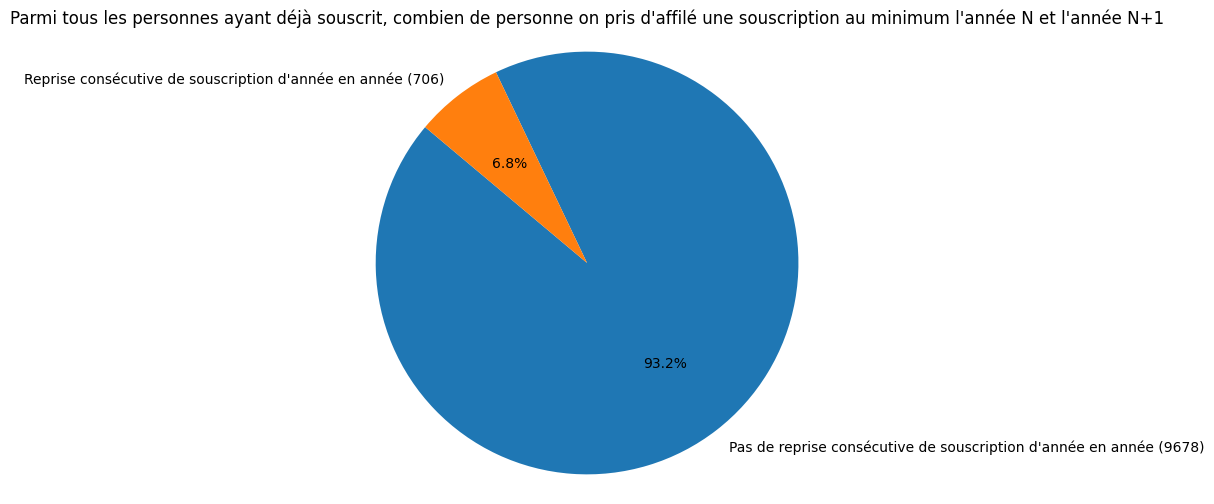

In [ ]:
df_serie_sous = df.copy()
df_serie_sous = df_serie_sous[df_serie_sous["Nature du mouvement"] == "Souscription"]
df_serie_sous['Date du Mouvement'] = pd.to_datetime(df_serie_sous['Date du Mouvement'])
# Extraire les années de souscription sous forme d'entiers
df_serie_sous["souscription sur l'année :"] = df_serie_sous["Date du Mouvement"].dt.year.astype(int)
df_serie_sous = df_serie_sous[["ID du contact", "souscription sur l'année :"]]
# Créer des colonnes "dummy" pour chaque année de souscription
years = df_serie_sous["souscription sur l'année :"].unique()
for year in years:
    df_serie_sous[f'souscription sur l\'année : {year}'] = df_serie_sous["souscription sur l'année :"] == year

df_serie_sous = df_serie_sous.groupby('ID du contact').max().reset_index()
df_serie_sous = df_serie_sous.drop(columns = "souscription sur l'année :")
df_serie_sous= df_serie_sous.set_index('ID du contact')
# Fonction pour vérifier si une série de "True" est présente dans une ligne
def a_au_moins_une_serie_continue_de_true(row):
    series_true = 0  # Compteur de séries de "True" consécutifs
    for value in row:
        if value:
            series_true += 1
            if series_true >= 2:  # Au moins une série continue de "True" trouvée
                return True
        else:
            series_true = 0
    return False

# Appliquer la fonction à chaque ligne du DataFrame
df_serie_sous['A une série continue de reprise de souscription tout les ans'] = df_serie_sous.apply(a_au_moins_une_serie_continue_de_true, axis=1)
df_serie_sous['A une série continue de reprise de souscription tout les ans'] = df_serie_sous['A une série continue de reprise de souscription tout les ans'].replace({True: "Reprise consécutive de souscription d'année en année", False: "Pas de reprise consécutive de souscription d'année en année"})
import matplotlib.pyplot as plt

# Compter les occurrences de chaque valeur unique
value_counts = df_serie_sous['A une série continue de reprise de souscription tout les ans'].value_counts()

# Créer un pie chart avec les pourcentages et les valeurs absolues
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajouter les valeurs absolues aux étiquettes
for i, label in enumerate(texts):
    label.set_text(f"{label.get_text()} ({value_counts[i]})")

plt.title("Parmi tous les personnes ayant déjà souscrit, combien de personne on pris d'affilé une souscription au minimum l'année N et l'année N+1")
plt.axis('equal')  # Assure que le pie chart est un cercle

plt.show()

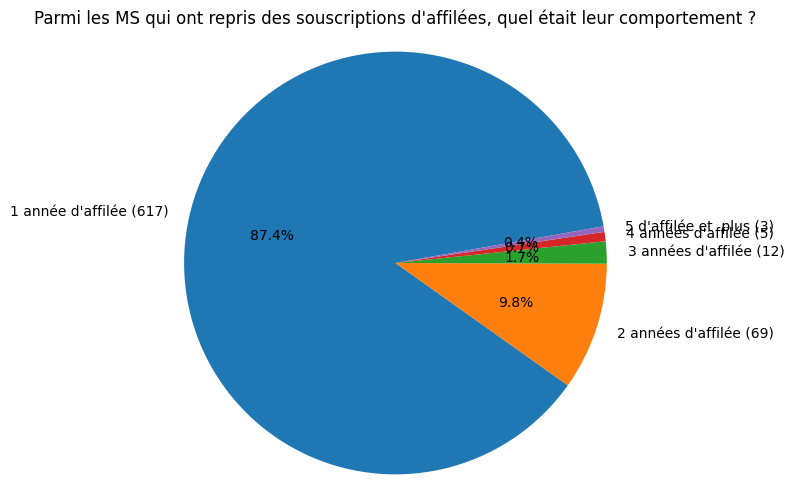

In [ ]:
import matplotlib.pyplot as plt

# Filtrer les lignes où 'A une série continue de reprise de souscription tout les ans' est True
df_serie_souscontinue = df_serie_sous[df_serie_sous['A une série continue de reprise de souscription tout les ans'] == "Reprise consécutive de souscription d'année en année"]

# Fonction pour compter la plus grande série continue de "True"
def compter_plus_grande_serie_continue_de_true(row):
    max_serie_true = 0  # Pour stocker le nombre maximum de "True" consécutifs
    current_serie_true = 0  # Pour suivre la série actuelle de "True"
    
    for value in row:
        if value:
            current_serie_true += 1
            max_serie_true = max(max_serie_true, current_serie_true)
        else:
            current_serie_true = 0
    
    return max_serie_true

# Appliquer la fonction à chaque ligne du DataFrame
df_serie_souscontinue['Plus grande série de reprise de souscription tout les ans'] = df_serie_souscontinue.apply(compter_plus_grande_serie_continue_de_true, axis=1)

df_serie_souscontinue['Catégorie de série'] = np.select(
    [
        df_serie_souscontinue['Plus grande série de reprise de souscription tout les ans'] == 2,
        df_serie_souscontinue['Plus grande série de reprise de souscription tout les ans'] == 3,
        df_serie_souscontinue['Plus grande série de reprise de souscription tout les ans'] == 4,
        df_serie_souscontinue['Plus grande série de reprise de souscription tout les ans'] == 5,
        df_serie_souscontinue['Plus grande série de reprise de souscription tout les ans'] > 5,
    ],
    [
        '1 année d\'affilée',
        '2 années d\'affilée',
        '3 années d\'affilée',
        '4 années d\'affilée',
        '5 d\'affilée et  plus'
    ],
    default='Autre'
)
# Compter les occurrences de chaque valeur unique
value_counts = df_serie_souscontinue['Catégorie de série'].value_counts()

# Créer un pie chart avec les pourcentages et les valeurs absolues
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=10)

# Ajouter les valeurs absolues aux étiquettes
for i, (label, count) in enumerate(zip(texts, value_counts)):
    label.set_text(f"{label.get_text()} ({count})")

plt.title("Parmi les MS qui ont repris des souscriptions d'affilées, quel était leur comportement ?")
plt.axis('equal')  # Assure que le pie chart est un cercle

plt.show()


In [ ]:
from IPython.display import display, HTML
# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))
# Afficher un titre centré avec une taille de police plus grande
display(HTML('<h2>En regardant d\'intervalle de 0,9 à 1,1 ans (ex : si le souscripteur a pris une souscription en en juillet 2018 et de 0,9 à 1,1 an après, il est conmpté comme ayant repris des souscriptions en série de un an</h2>'))

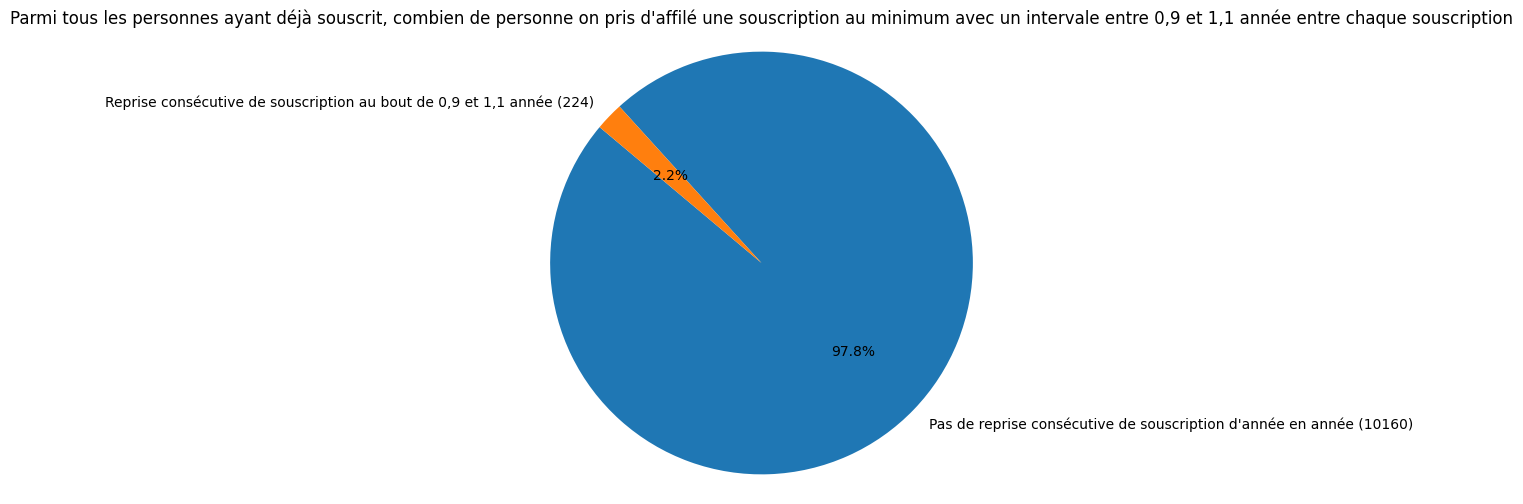

In [ ]:
df_serie_sousbis = df_serie_sousbis[df_serie_sousbis["Nature du mouvement"] == "Souscription"]
df_serie_sousbis['Date du Mouvement'] = pd.to_datetime(df_serie_sousbis['Date du Mouvement'])
df_serie_sousbis = df_serie_sousbis[['ID du contact', 'Date du Mouvement']]
df_serie_sousbis['nb souscriptions'] = df_serie_sousbis['ID du contact'].map(df_serie_sousbis['ID du contact'].value_counts())
df_serie_sousbis = df_serie_sousbis.sort_values(by=['ID du contact', 'Date du Mouvement'])
#df_serie_sousbis = df_serie_sousbis[df_serie_sousbis["nb souscriptions"] > 1]
df_serie_sousbis = pd.pivot_table(df_serie_sousbis, index='ID du contact', columns=df_serie_sousbis.groupby('ID du contact').cumcount() + 1,
values=["Date du Mouvement"],
aggfunc='first')
df_serie_sousbis.columns = [f'{col[0]}_{col[1]}' for col in df_serie_sousbis.columns]
df_serie_sousbis.reset_index(inplace=True)

# Créer les colonnes de différences de nombres d'actions
for i in range(2, 13):
    df_serie_sousbis[f'intervalle_souscriptions_{i}_{i-1}'] = df_serie_sousbis[f'Date du Mouvement_{i}'] - df_serie_sousbis[f'Date du Mouvement_{i-1}']

# Liste des colonnes d'intervalle à convertir
colonnes_intervalle = [f'intervalle_souscriptions_{i}_{i-1}' for i in range(2, 13)]

# Convertir les intervalles en années
for colonne in colonnes_intervalle:
    df_serie_sousbis[colonne] = df_serie_sousbis[colonne].apply(lambda x: np.nan if pd.isnull(x) else x.total_seconds() / 31536000)  # 31,536,000 secondes dans une année

# Supprimer les colonnes du tableau
colonnes_a_supprimer = [
    f"Date du Mouvement_{i}" for i in range(1, 13)
]

for colonne in colonnes_intervalle:
    df_serie_sousbis[colonne] = (df_serie_sousbis[colonne] >= 0.9) & (df_serie_sousbis[colonne] <= 1.1)

df_serie_sousbis.drop(colonnes_a_supprimer, axis=1, inplace=True)

# Fonction pour vérifier si une série de "True" est présente dans une ligne
def a_au_moins_une_serie_continue_de_true(row):
    series_true = 0  # Compteur de séries de "True" consécutifs
    for value in row:
        if value:
            series_true += 1
            if series_true >= 2:  # Au moins une série continue de "True" trouvée
                return True
        else:
            series_true = 0
    return False

# Appliquer la fonction à chaque ligne du DataFrame
df_serie_sousbis['A une série continue de reprise de souscription avec intervalle d\'un an'] = df_serie_sousbis.apply(a_au_moins_une_serie_continue_de_true, axis=1)
df_serie_sousbis['A une série continue de reprise de souscription avec intervalle d\'un an'] = df_serie_sousbis['A une série continue de reprise de souscription avec intervalle d\'un an'].replace({True: "Reprise consécutive de souscription au bout de 0,9 et 1,1 année", False: "Pas de reprise consécutive de souscription d'année en année"})

# Compter les occurrences de chaque valeur unique
value_counts = df_serie_sousbis['A une série continue de reprise de souscription avec intervalle d\'un an'].value_counts()

# Créer un pie chart avec les pourcentages et les valeurs absolues
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajouter les valeurs absolues aux étiquettes
for i, label in enumerate(texts):
    label.set_text(f"{label.get_text()} ({value_counts[i]})")

plt.title("Parmi tous les personnes ayant déjà souscrit, combien de personne on pris d'affilé une souscription au minimum avec un intervale entre 0,9 et 1,1 année entre chaque souscription")
plt.axis('equal')  # Assure que le pie chart est un cercle

plt.show()

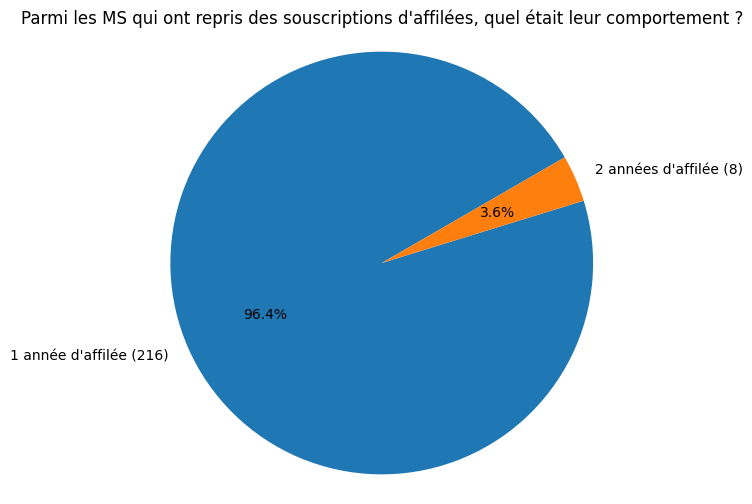

In [ ]:
# Filtrer les lignes où 'A une série continue de reprise de souscription tout les ans' est True
df_serie_sousbiscontinue = df_serie_sousbis[df_serie_sousbis['A une série continue de reprise de souscription avec intervalle d\'un an'] == "Reprise consécutive de souscription au bout de 0,9 et 1,1 année"]

# Fonction pour compter la plus grande série continue de "True"
def compter_plus_grande_serie_continue_de_true(row):
    max_serie_true = 0  # Pour stocker le nombre maximum de "True" consécutifs
    current_serie_true = 0  # Pour suivre la série actuelle de "True"
    
    for value in row:
        if value:
            current_serie_true += 1
            max_serie_true = max(max_serie_true, current_serie_true)
        else:
            current_serie_true = 0
    
    return max_serie_true

# Appliquer la fonction à chaque ligne du DataFrame
df_serie_sousbiscontinue['Plus grande série de reprise de souscription avec intervalle d\'environ 1 an'] = df_serie_sousbiscontinue.apply(compter_plus_grande_serie_continue_de_true, axis=1)

df_serie_sousbiscontinue['Catégorie de série'] = np.select(
    [
        df_serie_sousbiscontinue['Plus grande série de reprise de souscription avec intervalle d\'environ 1 an'] == 2,
        df_serie_sousbiscontinue['Plus grande série de reprise de souscription avec intervalle d\'environ 1 an'] == 3,
        df_serie_sousbiscontinue['Plus grande série de reprise de souscription avec intervalle d\'environ 1 an'] == 4,
        df_serie_sousbiscontinue['Plus grande série de reprise de souscription avec intervalle d\'environ 1 an'] > 4,
    ],
    [
        '1 année d\'affilée',
        '2 années d\'affilée',
        '3 années d\'affilée',
        '4 années d\'affilée et  plus'
    ],
    default='Autre'
)
# Compter les occurrences de chaque valeur unique
value_counts = df_serie_sousbiscontinue['Catégorie de série'].value_counts()

# Créer un pie chart avec les pourcentages et les valeurs absolues
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)

# Ajouter les valeurs absolues aux étiquettes
for i, (label, count) in enumerate(zip(texts, value_counts)):
    label.set_text(f"{label.get_text()} ({count})")

plt.title("Parmi les MS qui ont repris des souscriptions d'affilées, quel était leur comportement ?")
plt.axis('equal')  # Assure que le pie chart est un cercle

plt.show()

In [ ]:
from IPython.display import display, HTML

# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Variation du nombre d\'actions entre souscriptions</u></h2></center>'))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Pour cette rubrique nous avons calculé la différence individuelle du nombre d'actions entre la énième souscription d'un souscripteur et de sa souscription précédente. Nous avons ensuite fait des moyennes générale de variation, des moyennes de variation en fonction des types de variation du nombre d'actions (augmentation, diminution, stagnation du nombre d'une souscription à la précédente)</h3>"))

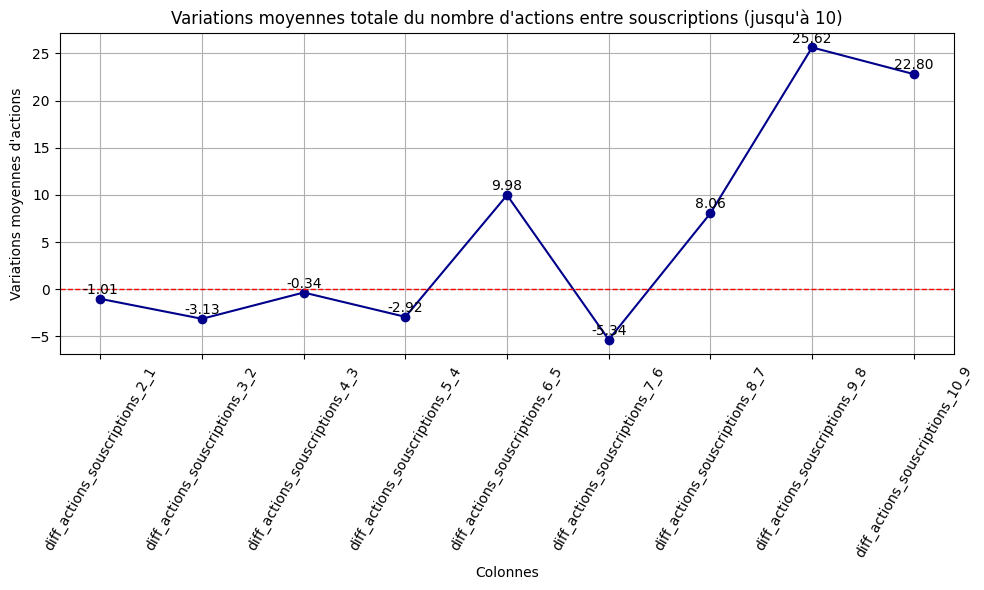

In [ ]:
df_variationactions = df2.copy()
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'âge', 'Territoire Terre de Liens', 'Actionnaire ?', 'adhérent N', 'Donateur N',
    'RFM-Date Première Souscription', 'Foncière : Capital possédé', 'Foncière : Nombre d\'actions détenues',
    'Foncière : Part du capital possédée (%)', 'Numéro du contrat', 'Type d\'enregistrement des contrats',
    'Nombre d\'actions à l\'acquisition', 'A fait l\'objet d\'un reçu fiscal', 'Affectation',
    'Mouvement de titre Name', 'Nature du mouvement', 'Date d\'activation',
    'Actions - Date de fin', 'Difference début fin', 'retrait complet ou partiel',
    'année rachat', 'durée conservation', 'répartition année', 'catégories âge', 'ancienneté actionnaires',
    'répartition année nouveau actionnaire', 'catégorie souscription'
]

# Supprimer les colonnes du DataFrame
df_variationactions.drop(colonnes_a_supprimer, axis=1, inplace=True)
df_variationactions['Nombre de souscriptions'] = df_variationactions['ID du contact'].map(df_variationactions ['ID du contact'].value_counts())
df_variationactions = df_variationactions.sort_values(by=['ID du contact', 'Date du Mouvement'])
df_variationactions10 = df_variationactions[(df_variationactions["Nombre de souscriptions"] <= 10) & (df_variationactions["Nombre de souscriptions"] > 1)]
# Pivoter le tableau

df_variationactions10 = pd.pivot_table(df_variationactions10, index='ID du contact', columns=df_variationactions10.groupby('ID du contact').cumcount() + 1,
values=["Nombre d'actions échangées"],
aggfunc='first')
df_log = df_variationactions10.copy()
#renommer les colonnes
df_variationactions10.columns = [f'{col[0]}_{col[1]}' for col in df_variationactions10.columns]
df_variationactions10.reset_index(inplace=True)
# Créer les colonnes de différences de nombres d'actions
for i in range(2, 11):
    df_variationactions10[f'diff_actions_souscriptions_{i}_{i-1}'] = df_variationactions10[f'Nombre d\'actions échangées_{i}'] - df_variationactions10[f'Nombre d\'actions échangées_{i-1}']

# Supprimer les colonnes du tableau

colonnes_a_supprimer = [
   "Nombre d'actions échangées_1",
"Nombre d'actions échangées_2",
"Nombre d'actions échangées_3",
"Nombre d'actions échangées_4",
"Nombre d'actions échangées_5",
"Nombre d'actions échangées_6",
"Nombre d'actions échangées_7",
"Nombre d'actions échangées_8",
"Nombre d'actions échangées_9",
"Nombre d'actions échangées_10"
]

# calculer les variations moyenne par colonnes 
df_variationactions10.drop(colonnes_a_supprimer, axis=1, inplace=True)
Variation_actions = df_variationactions10.drop(columns='ID du contact').mean(skipna=True).to_frame()
import matplotlib.pyplot as plt

# Données pour l'axe x (colonnes)
colonnes = Variation_actions.index

# Données pour l'axe y (moyennes)
moyennes_values = Variation_actions.values

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(colonnes, moyennes_values, marker='o', linestyle='-', color='darkblue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Ligne du 0 en rouge
plt.xlabel('Colonnes')
plt.ylabel('Variations moyennes d\'actions')
plt.title('Variations moyennes totale du nombre d\'actions entre souscriptions (jusqu\'à 10)')
plt.xticks(rotation=60)
plt.grid(True)

# Annoter chaque point avec sa valeur
for i, txt in enumerate(moyennes_values):
    plt.text(colonnes[i], txt[0] + 0.2, f'{txt[0]:.2f}', ha='center', va='bottom', color='black', fontweight='normal')


# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Nous avons pris les différences du nombre d'actions d'une souscription à sa précédente par personne et avons fait une moyenne total par rang de différence entre souscriptions</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : il y a eu en moyenne une augmentation de 2,5 actions pour la 4ème souscription des ex-actionnaires et actionnaires actuels comparé au nombre d'actions prises pour leur 3ème souscription</h4>"))


In [ ]:
import pandas as pd
import numpy as np

# Fonction pour calculer la proportion de valeurs positives, négatives et stagnantes
def positive_negative_stagnant_stats(column):
    valid_values = column.dropna()
    
    # Convertir les valeurs en nombres (int ou float)
    numeric_values = pd.to_numeric(valid_values, errors='coerce')
    
    positive_values = numeric_values[numeric_values > 0]
    negative_values = numeric_values[numeric_values < 0]
    stagnant_values = numeric_values[numeric_values == 0]
    
    total_valid = len(valid_values)
    positive_proportion = len(positive_values) / total_valid * 100 if total_valid > 0 else 0
    negative_proportion = len(negative_values) / total_valid * 100 if total_valid > 0 else 0
    stagnant_proportion = len(stagnant_values) / total_valid * 100 if total_valid > 0 else 0
    
    total_proportion = positive_proportion + negative_proportion + stagnant_proportion
    if total_proportion > 0:
        positive_proportion /= total_proportion
        negative_proportion /= total_proportion
        stagnant_proportion /= total_proportion
    
    return pd.Series({
        'Augmentation du nombre d\'actions  par rapport à la précédente': round(positive_proportion, 2),
        'Diminution du nombre d\'actions  par rapport à la précédente': round(negative_proportion, 2),
        'Stagnation  du nombre d\'actions  par rapport à la précédente': round(stagnant_proportion, 2)
    })

# Appliquer la fonction à chaque colonne du DataFrame df_variationactions10
result_stats = df_variationactions10.apply(positive_negative_stagnant_stats)

result_stats = result_stats.drop(columns= "ID du contact")


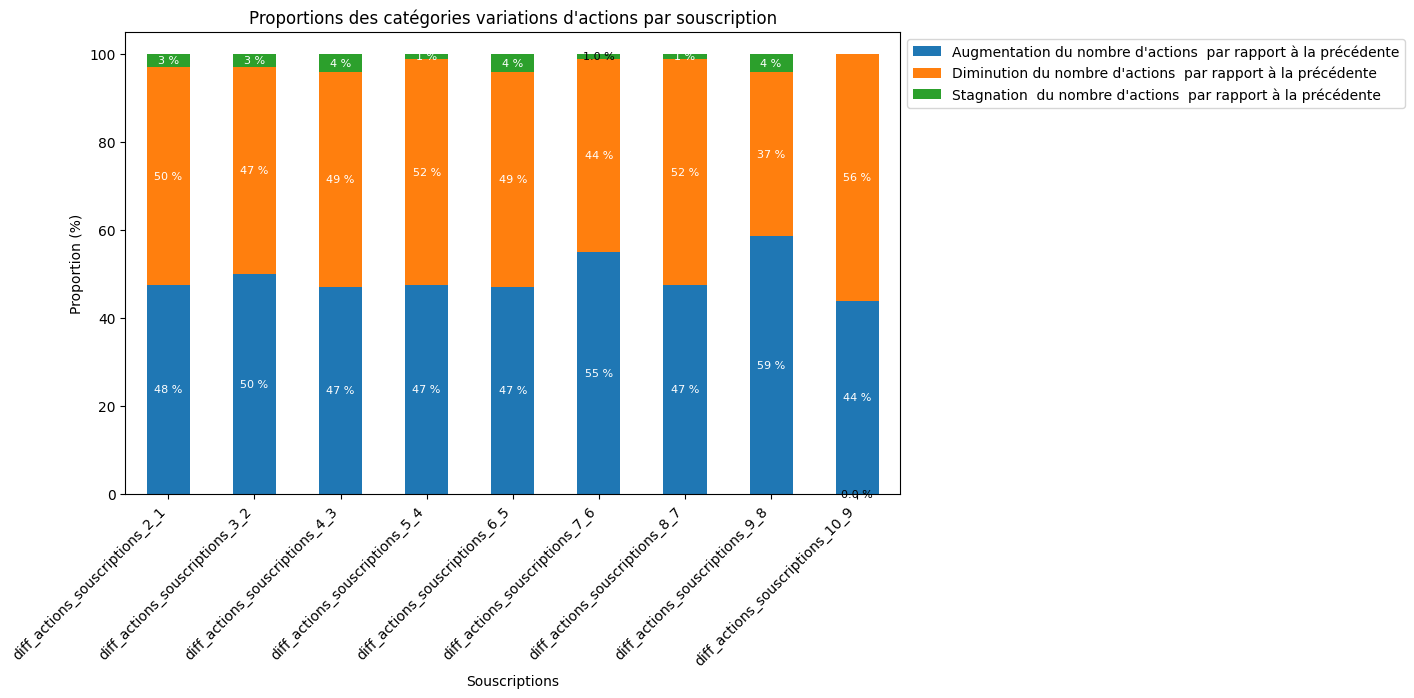

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Transposer le DataFrame pour que les colonnes deviennent des index
result_stats_transposed = result_stats.transpose()

# Calculer le total des proportions pour chaque souscription
result_stats_transposed['Total'] = result_stats_transposed.sum(axis=1)

# Convertir les proportions en pourcentages
result_stats_transposed_percentage = result_stats_transposed.apply(lambda row: row / row['Total'] * 100, axis=1)

# Supprimer la colonne Total
result_stats_transposed_percentage = result_stats_transposed_percentage.drop(columns='Total')

# Créer un graphique de barres empilées avec les étiquettes de données en pourcentage
ax = result_stats_transposed_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportions des catégories variations d\'actions par souscription')
plt.ylabel('Proportion (%)')
plt.xlabel('Souscriptions')
plt.xticks(rotation=45, ha='right')

# Afficher les étiquettes de données en pourcentage sur les parties empilées des barres
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 1:
            ax.annotate(f'{height:.0f} %', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', color='white', fontsize=8)
        elif height < -1:
            ax.annotate(f'{height:.0f} %', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', color='black', fontsize=8)
        elif -1 <= height <= 1:
            ax.annotate(f'{height:.1f} %', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', color='black', fontsize=8)

# Déplacer la légende à droite du graphique
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Afficher le graphique

plt.show()




In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Nous avons regardé quelle était la part de chaque type de variations du nombre d'actions par rang de différence entre souscriptions</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Parmi les ex-actionnaires et actionnaires actuels, 37 % ont pris plus d'actions pour leur 2ème souscription par rapport à la premiere. 27% en ont pris moins et 36 % ont pris le même nombre d'actions</h4>"))

In [ ]:
import pandas as pd
import numpy as np

# Fonction pour calculer le nombre absolu de valeurs positives, négatives et stagnantes
def positive_negative_stagnant_counts(column):
    valid_values = column.dropna()
    
    # Convertir les valeurs en nombres (int ou float)
    numeric_values = pd.to_numeric(valid_values, errors='coerce')
    
    positive_values = numeric_values[numeric_values > 0]
    negative_values = numeric_values[numeric_values < 0]
    stagnant_values = numeric_values[numeric_values == 0]
    
    positive_count = len(positive_values)
    negative_count = len(negative_values)
    stagnant_count = len(stagnant_values)
    
    return pd.Series({
        'Nombre de souscriptions à augmentation d\'actions': positive_count,
        'Nombre de souscriptions à diminution d\'actions': negative_count,
        'Nombre de souscriptions stagnantes': stagnant_count
    })

# Appliquer la fonction à chaque colonne du DataFrame df_variationactions10
result_counts = df_variationactions10.apply(positive_negative_stagnant_counts)

result_counts = result_counts.drop(columns="ID du contact")


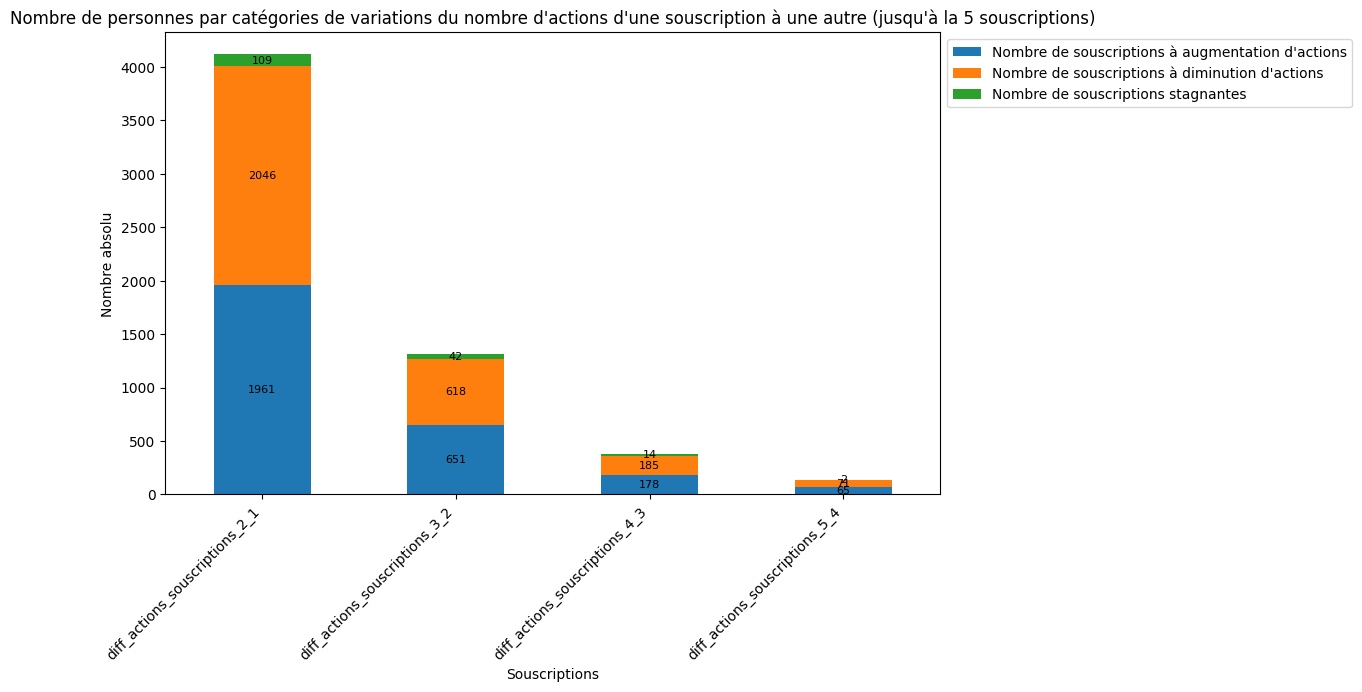

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sélectionner les colonnes pour le premier graphique
selected_columns = [
    'diff_actions_souscriptions_2_1',
    'diff_actions_souscriptions_3_2',
    'diff_actions_souscriptions_4_3',
    'diff_actions_souscriptions_5_4'
]

# Transposer le DataFrame pour que les colonnes deviennent des index
result_counts_selected = result_counts[selected_columns].transpose()

# Créer un graphique de barres empilées avec les étiquettes de données en nombre absolu (premier graphique)
ax1 = result_counts_selected.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Nombre de personnes par catégories de variations du nombre d\'actions d\'une souscription à une autre (jusqu\'à la 5 souscriptions)')
plt.ylabel('Nombre absolu')
plt.xlabel('Souscriptions')
plt.xticks(rotation=45, ha='right')

# Afficher les étiquettes de données en nombre absolu sur les parties empilées des barres
for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        ax1.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     ha='center', va='center', color='black', fontsize=8)

# Déplacer la légende à droite du graphique
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Afficher le premier graphique
plt.show()


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Parmi les ex-actionnaires et actionnaires actuels, il y avait 2183 personnes qui ont pris plus d'actions pour leur deuxième souscription par rapport à la première</h4>"))

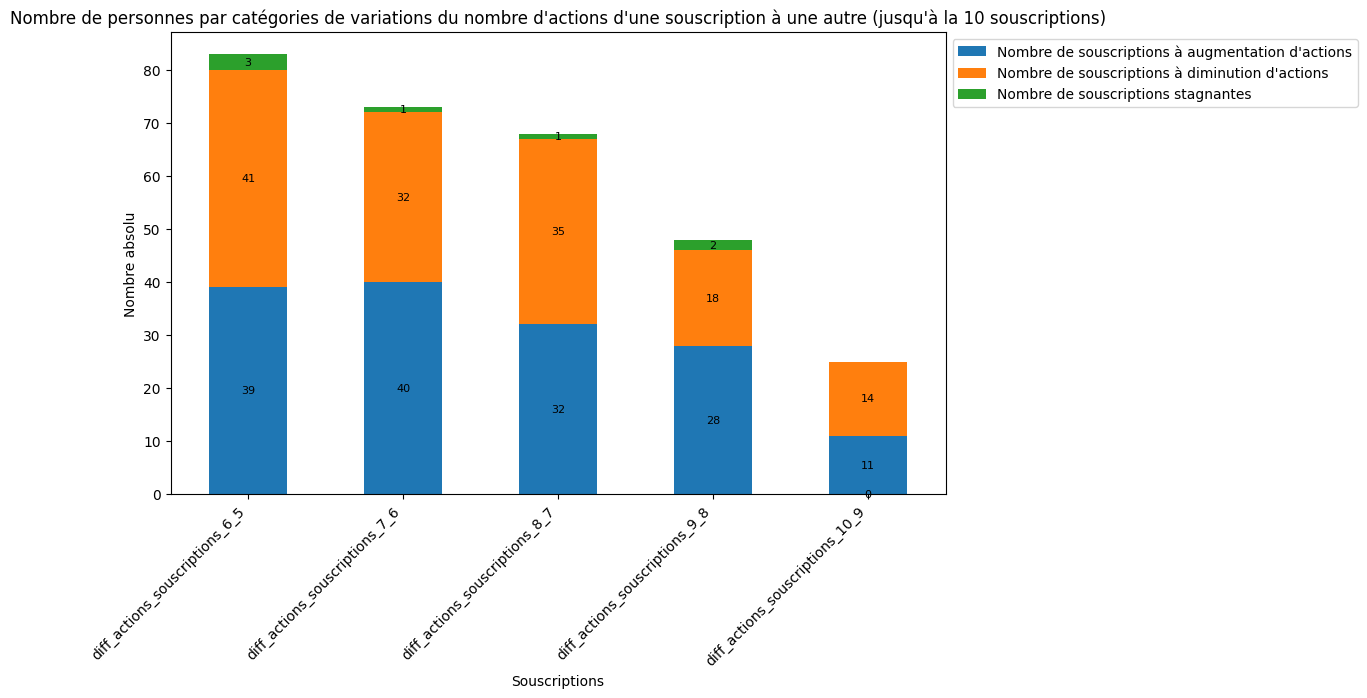

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sélectionner les colonnes pour le deuxième graphique (en excluant les colonnes du premier graphique)
selected_columns = [
    'diff_actions_souscriptions_6_5',
    'diff_actions_souscriptions_7_6',
    'diff_actions_souscriptions_8_7',
    'diff_actions_souscriptions_9_8',
    'diff_actions_souscriptions_10_9'
]

# Transposer le DataFrame pour que les colonnes deviennent des index
result_counts_selected = result_counts[selected_columns].transpose()

# Créer un graphique de barres empilées avec les étiquettes de données en nombre absolu (deuxième graphique)
ax2 = result_counts_selected.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Nombre de personnes par catégories de variations du nombre d\'actions d\'une souscription à une autre (jusqu\'à la 10 souscriptions)')
plt.ylabel('Nombre absolu')
plt.xlabel('Souscriptions')
plt.xticks(rotation=45, ha='right')

# Afficher les étiquettes de données en nombre absolu sur les parties empilées des barres
for container in ax2.containers:
    for bar in container:
        height = bar.get_height()
        ax2.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                     ha='center', va='center', color='black', fontsize=8)

# Déplacer la légende à droite du graphique
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Afficher le deuxième graphique
plt.show()



In [ ]:
# Liste des colonnes de variation
df_variationactions10groupe = df_variationactions10.copy()
variation_columns = [col for col in df_variationactions10.columns if col.startswith("diff_actions_souscriptions_")]

# Fonction pour déterminer la catégorie de variation
def determine_variation_category(value):
    if value < 0:
        return "Diminution"
    elif value > 0:
        return "Augmentation"
    else:
        return "Stagnation"

# Ajouter les colonnes "catégorie de variations" pour chaque colonne de variation
for col in variation_columns:
    new_col_name = col.replace("diff_actions_", "catégorie de variations ")
    df_variationactions10groupe[new_col_name] = df_variationactions10groupe[col].apply(determine_variation_category)

In [ ]:
import pandas as pd
from IPython.display import display


# Liste des colonnes de variation et de catégorie de variation
variation_columns = [
    'diff_actions_souscriptions_2_1', 'diff_actions_souscriptions_3_2', 'diff_actions_souscriptions_4_3',
    'diff_actions_souscriptions_5_4', 'diff_actions_souscriptions_6_5', 'diff_actions_souscriptions_7_6',
    'diff_actions_souscriptions_8_7', 'diff_actions_souscriptions_9_8', 'diff_actions_souscriptions_10_9'
]
category_columns = [
    'catégorie de variations souscriptions_2_1', 'catégorie de variations souscriptions_3_2',
    'catégorie de variations souscriptions_4_3', 'catégorie de variations souscriptions_5_4',
    'catégorie de variations souscriptions_6_5', 'catégorie de variations souscriptions_7_6',
    'catégorie de variations souscriptions_8_7', 'catégorie de variations souscriptions_9_8',
    'catégorie de variations souscriptions_10_9'
]

# Créer les 9 tableaux de avec les valeurs de variations et leur catégories de variations pour chaque écart entre souscriptions
tableaux = []
for variation_col, category_col in zip(variation_columns, category_columns):
    tableau = df_variationactions10groupe[[variation_col, category_col]].copy()
    col_name = f"variation_{variation_col.split('_')[3]}_{variation_col.split('_')[4]}"
    cat_col_name = f"catégorie_{category_col.split('_')[-2]}_{category_col.split('_')[-1]}"
    tableau.columns = [col_name, cat_col_name]
    tableau = tableau.dropna().loc[tableau[cat_col_name] != 'Stagnation']
    tableaux.append(tableau)

# créer des tableau pour calculer la moyenne des colonnes 'variation_{i}_{i-1}' groupée par 'Catégorie'
mean_data = []
for i, tableau in enumerate(tableaux, start=2):
    mean_value = tableau.groupby(f'catégorie_{i}_{i-1}')[f'variation_{i}_{i-1}'].mean().reset_index()
    mean_data.append(mean_value)
    
# Fusionner les données sur la clé 'Catégorie'
merged_mean_data = pd.concat(mean_data, axis=1)

# Afficher le DataFrame résultant
merged_mean_data
# Supprimer les colonnes 'catégorie_{i}_{i-1}' à partir de 'catégorie_3_2'
cols_to_drop = ['catégorie_3_2', 'catégorie_4_3', 'catégorie_5_4', 'catégorie_6_5', 'catégorie_7_6',
                'catégorie_8_7', 'catégorie_9_8', 'catégorie_10_9']
merged_mean_data.drop(columns=cols_to_drop, inplace=True)

merged_mean_data.rename(columns={'catégorie_2_1': 'Catégorie de Variation'}, inplace=True)
merged_mean_data = merged_mean_data.round()


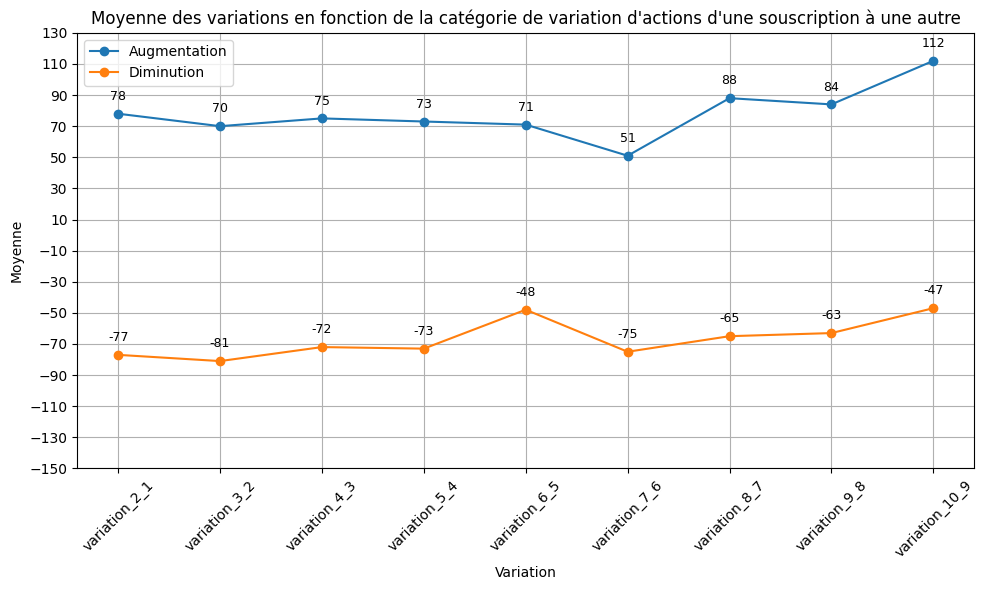

In [ ]:
import matplotlib.pyplot as plt

# Données pour le tracé
categories = merged_mean_data['Catégorie de Variation']
variations_augmentation = merged_mean_data.loc[merged_mean_data['Catégorie de Variation'] == 'Augmentation'].iloc[:, 1:]
variations_diminution = merged_mean_data.loc[merged_mean_data['Catégorie de Variation'] == 'Diminution'].iloc[:, 1:]

# Tracer les courbes
plt.figure(figsize=(10, 6))

for category, data in [('Augmentation', variations_augmentation), ('Diminution', variations_diminution)]:
    plt.plot(data.columns, data.iloc[0], marker='o', label=category)

plt.title('Moyenne des variations en fonction de la catégorie de variation d\'actions d\'une souscription à une autre')
plt.xlabel('Variation')
plt.ylabel('Moyenne')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(range(-150, 150, 20))  # Ajuster les graduations de l'axe des y
plt.tight_layout()

# Annoter les points avec les valeurs
for category, data in [('Augmentation', variations_augmentation), ('Diminution', variations_diminution)]:
    for i, value in enumerate(data.iloc[0]):
        plt.annotate(f'{value:.0f}', (data.columns[i], value), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, fontweight='normal')

# Afficher le graphique
plt.show()


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Tableau de données pour le graphique précédent</h3>"))

In [ ]:
merged_mean_data

Catégorie de Variation  variation_2_1  variation_3_2  variation_4_3   
0           Augmentation           78.0           70.0           75.0  \
1             Diminution          -77.0          -81.0          -72.0   

   variation_5_4  variation_6_5  variation_7_6  variation_8_7  variation_9_8   
0           73.0           71.0           51.0           88.0           84.0  \
1          -73.0          -48.0          -75.0          -65.0          -63.0   

   variation_10_9  
0           112.0  
1           -47.0

In [ ]:
 from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Parmis les ex-actionnaires et actionnaires actuels qui ont pris plus d'actions pour leur 2ème souscription par rapport à la premiere, en moyenne ces derniers en ont pris 34 de plus. Et parmi ceux qui ont diminué leur nombre d'actions pour leur 2ème souscriptons par rapport à la première, ils en ont pris en moyenne 34 de moins</h4>"))

In [ ]:
from IPython.display import display, HTML


# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Variations relatives du nombre d\'actions entre rang de souscriptions</u></h2></center>'))

In [ ]:
from IPython.display import display, HTML

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<h3>Notions : Nous avons pour cette section considérer les logarithmes néperiens (base e) du nombres d\'actions échangées à chaque rangs de souscriptions. Ainsi en faisant la soustraction entre entre 2 log on peut avoir une idée de la variation absolue entre le nombre d\'actions. Dans la section précédente on observait qu\'en moyenne entre la 2ème et la 1ere souscription les actionnaires prennaient 4 actions de plus que la fois précédente, ce qui n\'indique rien sur l\'évolution relative sur son comportement de souscription. La personne aurait avoir pris lors de la 1ere souscription 4 actions et lors de la 2eme 8 actions ce qui fait une augmentation de 100 % soit 2 fois plus une fois sur l\'autre. L\'actionnaire aurait pu avoir pris 400 actions lors de la 1ere souscription et 404 lors de la 2ème souscrition soit une augmentation de 1% ou 1,01 fois plus une fois sur l\'autre. Avec le logarithme népérien on peut avoir une idée de l\évolution relative en faisant e^(log(x en T+1) - log(X en T)) = e^(log(x en T+1/(X en T)). Ainsi pour reprendre nos exemples e^(log(8)-log(4)) = e^log(8/4) = 2 et  e^(log(404)-log(400)) = e^log(404/400) = 1,01 </h3>'))

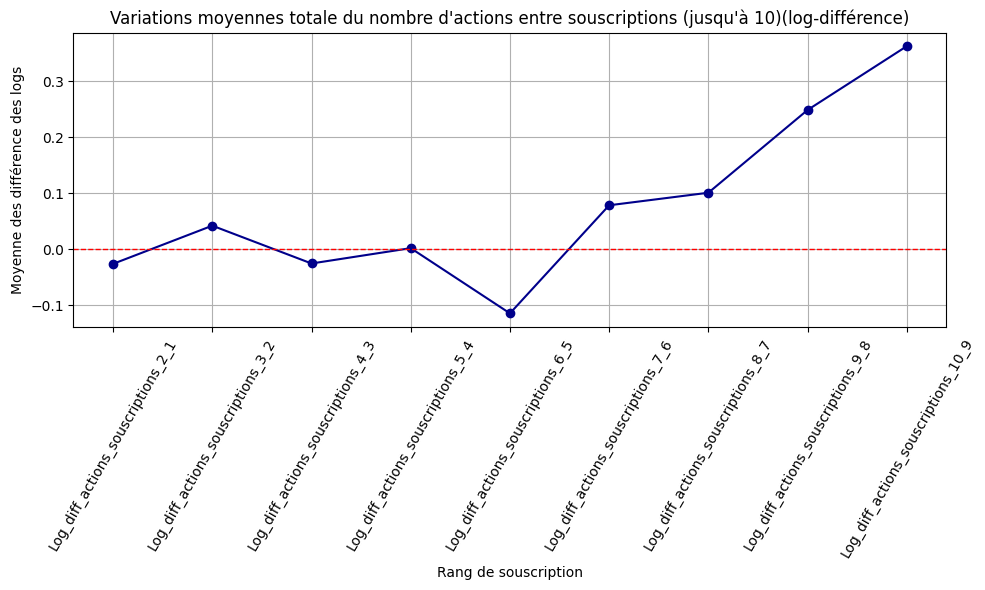

In [ ]:
df_log = np.log(df_log)
#renommer les colonnes
df_log.columns = [f'{col[0]}_{col[1]}' for col in df_log.columns]
df_log.reset_index(inplace=True)
# Créer les colonnes de différences de nombres d'actions
for i in range(2, 11):
    df_log[f'Log_diff_actions_souscriptions_{i}_{i-1}'] = df_log[f'Nombre d\'actions échangées_{i}'] - df_log[f'Nombre d\'actions échangées_{i-1}']

# Supprimer les colonnes du tableau

colonnes_a_supprimer = [
   "Nombre d'actions échangées_1",
"Nombre d'actions échangées_2",
"Nombre d'actions échangées_3",
"Nombre d'actions échangées_4",
"Nombre d'actions échangées_5",
"Nombre d'actions échangées_6",
"Nombre d'actions échangées_7",
"Nombre d'actions échangées_8",
"Nombre d'actions échangées_9",
"Nombre d'actions échangées_10"
]

# calculer les variations moyenne par colonnes 
df_log.drop(colonnes_a_supprimer, axis=1, inplace=True)
Variation_actionslog = df_log.drop(columns='ID du contact').mean(skipna=True).to_frame()
import matplotlib.pyplot as plt

# Données pour l'axe x (colonnes)
colonnes = Variation_actionslog.index

# Données pour l'axe y (moyennes)
moyennes_values = Variation_actionslog.values

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(colonnes, moyennes_values, marker='o', linestyle='-', color='darkblue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Ligne du 0 en rouge
plt.xlabel('Rang de souscription')
plt.ylabel('Moyenne des différence des logs')
plt.title('Variations moyennes totale du nombre d\'actions entre souscriptions (jusqu\'à 10)(log-différence)')
plt.xticks(rotation=60)
plt.grid(True)



# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
#Variation_actionslog = Variation_actionslog.T
Variation_actionslog = Variation_actionslog.rename(columns={Variation_actionslog.columns[0]: 'log(i+1) - log(i)'})
Variation_actionslog['e^log(x)'] = np.exp(Variation_actionslog.iloc[:, 0])
Variation_actionslog 

log(i+1) - log(i)  e^log(x)
Log_diff_actions_souscriptions_2_1           -0.026232  0.974109
Log_diff_actions_souscriptions_3_2            0.041931  1.042823
Log_diff_actions_souscriptions_4_3           -0.025583  0.974742
Log_diff_actions_souscriptions_5_4            0.001804  1.001806
Log_diff_actions_souscriptions_6_5           -0.114651  0.891677
Log_diff_actions_souscriptions_7_6            0.078376  1.081529
Log_diff_actions_souscriptions_8_7            0.100767  1.106019
Log_diff_actions_souscriptions_9_8            0.248553  1.282169
Log_diff_actions_souscriptions_10_9           0.362496  1.436911

In [ ]:
from IPython.display import display, HTML

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<h4> Clé de lecture : Dans la colonne de droite on peut se rendre compte en moyenne combien de fois plus ou moins les actionnaires ont pris d\'actions d\'une souscription à une autre. Si le nombre est supérieur à 1 il s\'agira d\'une augmentation et s\'il es inférieur, il s\'agira d\'une diminution.</h3>'))

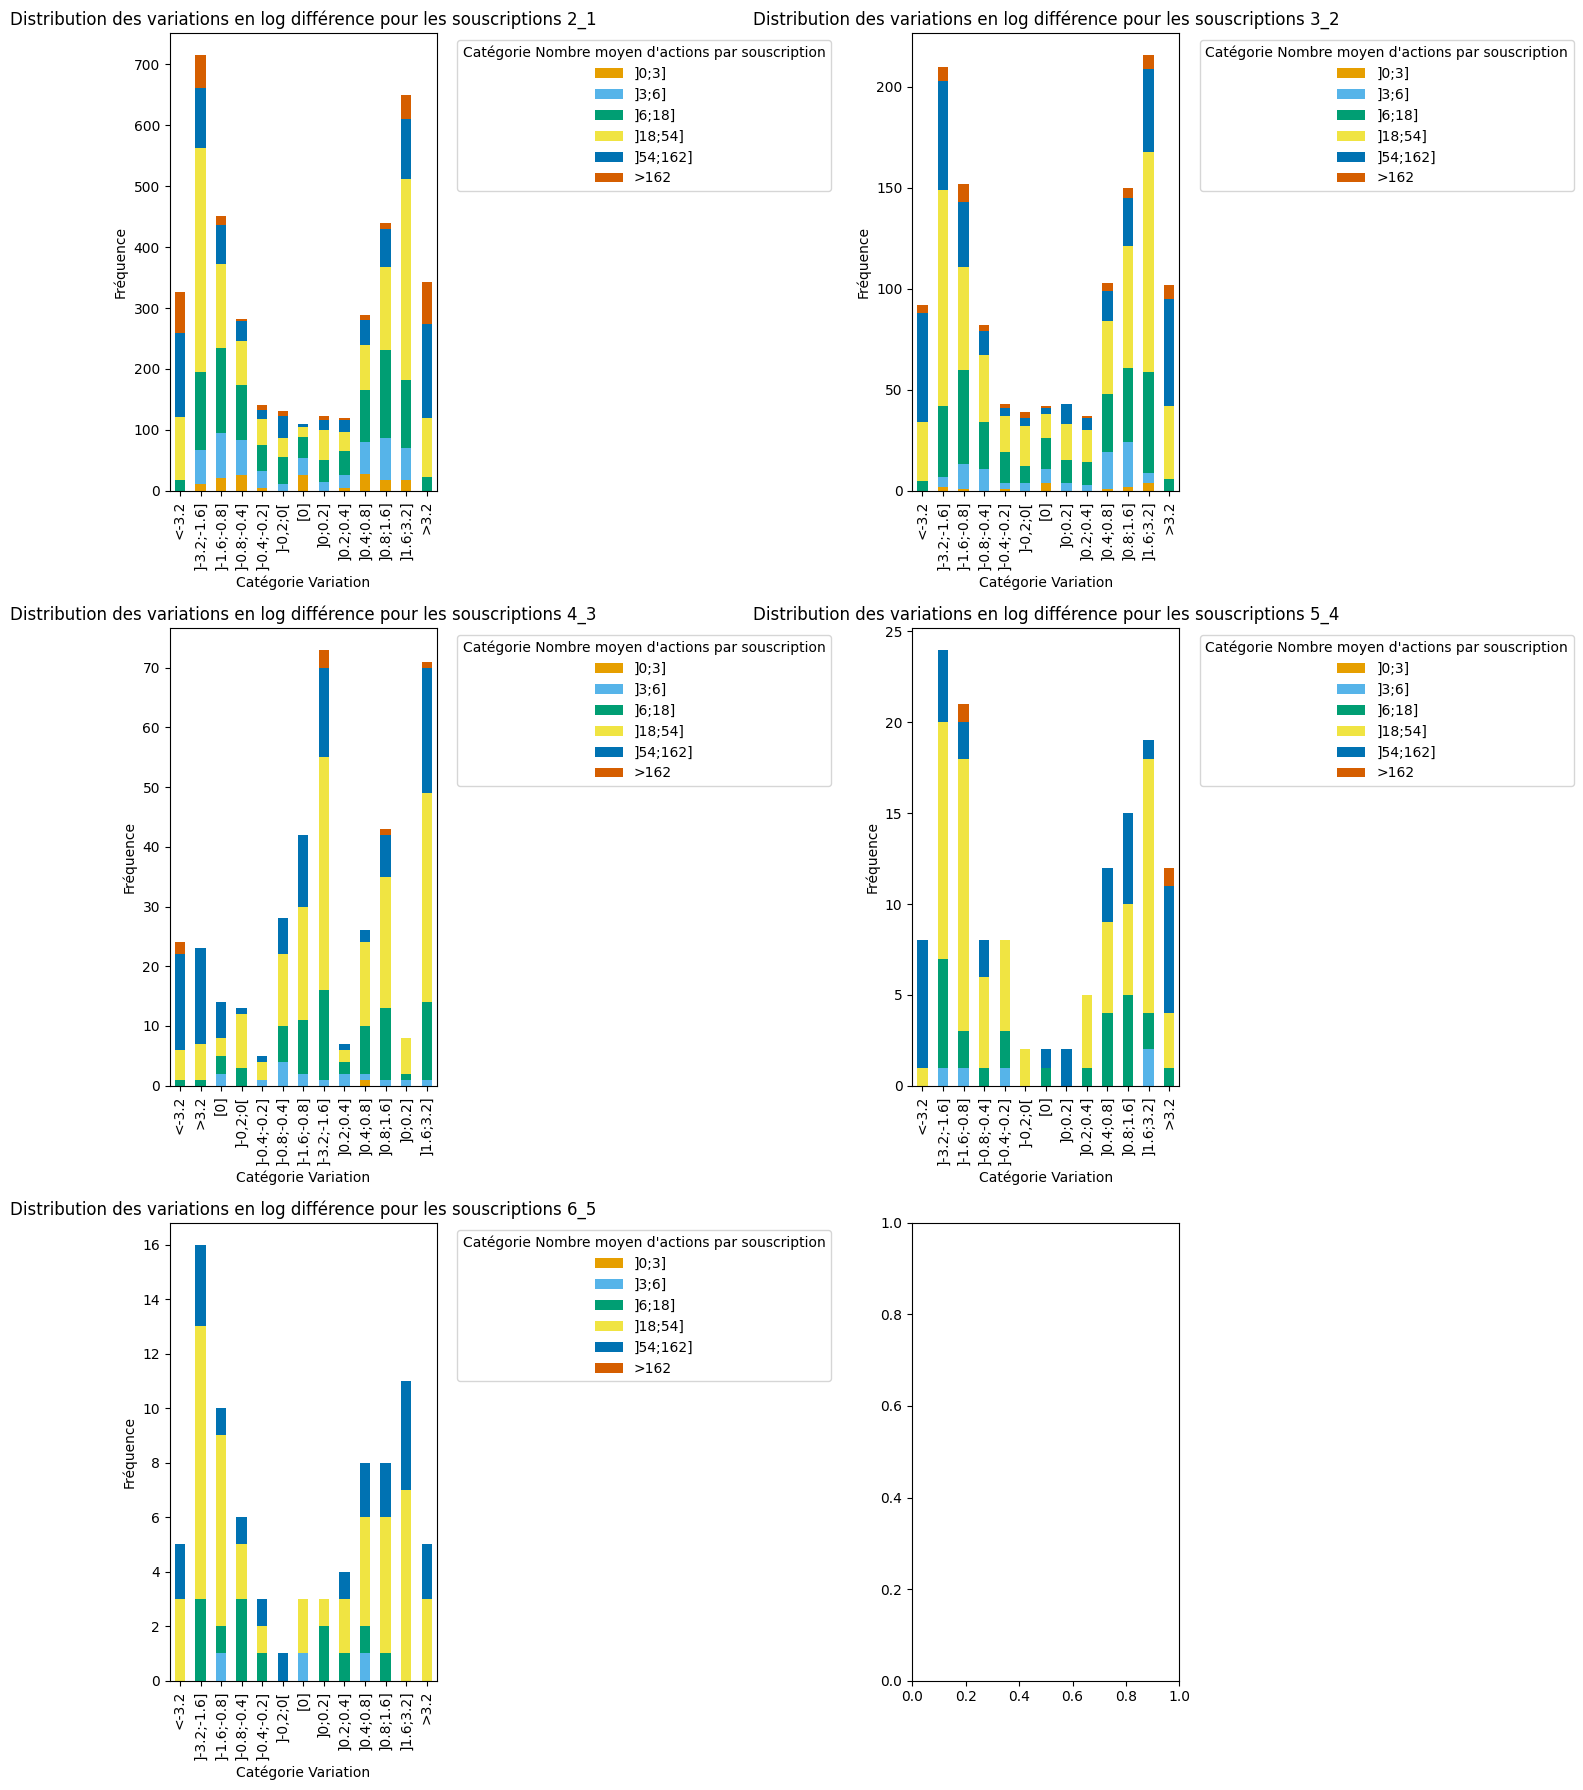

In [ ]:
df_log = df_log.merge(df_parcours, on=['ID du contact'], how='left')
df_log21 = df_log[["Log_diff_actions_souscriptions_2_1", "Nombre moyen d'actions par souscription"]]
df_log32 = df_log[["Log_diff_actions_souscriptions_3_2", "Nombre moyen d'actions par souscription"]]
df_log43 = df_log[["Log_diff_actions_souscriptions_4_3", "Nombre moyen d'actions par souscription"]]
df_log54 = df_log[["Log_diff_actions_souscriptions_5_4", "Nombre moyen d'actions par souscription"]]
df_log65 = df_log[["Log_diff_actions_souscriptions_6_5", "Nombre moyen d'actions par souscription"]]
df_log76 = df_log[["Log_diff_actions_souscriptions_7_6", "Nombre moyen d'actions par souscription"]]
df_log87 = df_log[["Log_diff_actions_souscriptions_8_7", "Nombre moyen d'actions par souscription"]]
df_log98 = df_log[["Log_diff_actions_souscriptions_9_8", "Nombre moyen d'actions par souscription"]]
df_log109 = df_log[["Log_diff_actions_souscriptions_10_9", "Nombre moyen d'actions par souscription"]]
import numpy as np

# Créer une fonction pour attribuer des catégories en fonction de la valeur
def categorize_variation(val):
    if val == 0:
        return '[0]'
    elif -0.2 < val < 0:
        return ']-0,2;0['
    elif -0.4 < val <= -0.2:
        return ']-0.4;-0.2]'
    elif -0.8 < val <= -0.4:
        return ']-0.8;-0.4]'
    elif -1.6 < val <= -0.8:
        return ']-1.6;-0.8]'
    elif -3.2 < val <= -1.6:
        return ']-3.2;-1.6]'
    elif val < -3.2:
        return '<-3.2'
    elif 0 < val <= 0.2:
        return ']0;0.2]'
    elif 0.2 < val <= 0.4:
        return ']0.2;0.4]'
    elif 0.4 < val <= 0.8:
        return ']0.4;0.8]'
    elif 0.8 < val <= 1.6:
        return ']0.8;1.6]'
    elif 1.6 < val <= 3.2:
        return ']1.6;3.2]'
    elif val > 3.2:
        return '>3.2'

df_log21['Catégorie variation'] = df_log21['Log_diff_actions_souscriptions_2_1'].apply(categorize_variation)
df_log32['Catégorie variation'] = df_log32['Log_diff_actions_souscriptions_3_2'].apply(categorize_variation)
df_log43['Catégorie variation'] = df_log43['Log_diff_actions_souscriptions_4_3'].apply(categorize_variation)
df_log54['Catégorie variation'] = df_log54['Log_diff_actions_souscriptions_5_4'].apply(categorize_variation)
df_log65['Catégorie variation'] = df_log65['Log_diff_actions_souscriptions_6_5'].apply(categorize_variation)
df_log76['Catégorie variation'] = df_log76['Log_diff_actions_souscriptions_7_6'].apply(categorize_variation)
df_log87['Catégorie variation'] = df_log87['Log_diff_actions_souscriptions_8_7'].apply(categorize_variation)
df_log98['Catégorie variation'] = df_log98['Log_diff_actions_souscriptions_9_8'].apply(categorize_variation)
df_log109['Catégorie variation'] = df_log109['Log_diff_actions_souscriptions_10_9'].apply(categorize_variation)

def categorize_actions(val):
    if val <= 3:
        return ']0;3]'
    elif val <= 6:
        return ']3;6]'
    elif val <= 18:
        return ']6;18]'
    elif val <= 54:
        return ']18;54]'
    elif val <= 162:
        return ']54;162]'
    else:
        return '>162'


df_log21['Catégorie Nombre moyen d\'actions par souscription'] = df_log21['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
df_log32['Catégorie Nombre moyen d\'actions par souscription'] = df_log32['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
df_log43['Catégorie Nombre moyen d\'actions par souscription'] = df_log43['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
df_log54['Catégorie Nombre moyen d\'actions par souscription'] = df_log54['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
df_log65['Catégorie Nombre moyen d\'actions par souscription'] = df_log65['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
df_log76['Catégorie Nombre moyen d\'actions par souscription'] = df_log76['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
df_log87['Catégorie Nombre moyen d\'actions par souscription'] = df_log87['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
df_log98['Catégorie Nombre moyen d\'actions par souscription'] = df_log98['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
df_log109['Catégorie Nombre moyen d\'actions par souscription'] = df_log109['Nombre moyen d\'actions par souscription'].apply(categorize_actions)
cross_tab21 = pd.crosstab(df_log21['Catégorie variation'], df_log21['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab32 = pd.crosstab(df_log32['Catégorie variation'], df_log32['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab43 = pd.crosstab(df_log43['Catégorie variation'], df_log43['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab54 = pd.crosstab(df_log54['Catégorie variation'], df_log54['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab65 = pd.crosstab(df_log65['Catégorie variation'], df_log65['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab76 = pd.crosstab(df_log76['Catégorie variation'], df_log76['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab87 = pd.crosstab(df_log87['Catégorie variation'], df_log87['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab98 = pd.crosstab(df_log98['Catégorie variation'], df_log98['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab109 = pd.crosstab(df_log109['Catégorie variation'], df_log109['Catégorie Nombre moyen d\'actions par souscription'])
cross_tab21 = cross_tab21.reindex(['<-3.2', ']-3.2;-1.6]', ']-1.6;-0.8]', ']-0.8;-0.4]', ']-0.4;-0.2]',']-0,2;0[', '[0]', ']0;0.2]', ']0.2;0.4]', ']0.4;0.8]', ']0.8;1.6]', ']1.6;3.2]', '>3.2'])
cross_tab32 = cross_tab32.reindex(['<-3.2', ']-3.2;-1.6]', ']-1.6;-0.8]', ']-0.8;-0.4]', ']-0.4;-0.2]',']-0,2;0[', '[0]', ']0;0.2]', ']0.2;0.4]', ']0.4;0.8]', ']0.8;1.6]', ']1.6;3.2]', '>3.2'])
cross_tab54 = cross_tab54.reindex(['<-3.2', ']-3.2;-1.6]', ']-1.6;-0.8]', ']-0.8;-0.4]', ']-0.4;-0.2]',']-0,2;0[', '[0]', ']0;0.2]', ']0.2;0.4]', ']0.4;0.8]', ']0.8;1.6]', ']1.6;3.2]', '>3.2'])
cross_tab65 = cross_tab65.reindex(['<-3.2', ']-3.2;-1.6]', ']-1.6;-0.8]', ']-0.8;-0.4]', ']-0.4;-0.2]',']-0,2;0[', '[0]', ']0;0.2]', ']0.2;0.4]', ']0.4;0.8]', ']0.8;1.6]', ']1.6;3.2]', '>3.2'])
cross_tab76 = cross_tab76.reindex(['<-3.2', ']-3.2;-1.6]', ']-1.6;-0.8]', ']-0.8;-0.4]', ']-0.4;-0.2]',']-0,2;0[', '[0]', ']0;0.2]', ']0.2;0.4]', ']0.4;0.8]', ']0.8;1.6]', ']1.6;3.2]', '>3.2'])
cross_tab87 = cross_tab87.reindex(['<-3.2', ']-3.2;-1.6]', ']-1.6;-0.8]', ']-0.8;-0.4]', ']-0.4;-0.2]',']-0,2;0[', '[0]', ']0;0.2]', ']0.2;0.4]', ']0.4;0.8]', ']0.8;1.6]', ']1.6;3.2]', '>3.2'])
cross_tab98 = cross_tab98.reindex(['<-3.2', ']-3.2;-1.6]', ']-1.6;-0.8]', ']-0.8;-0.4]', ']-0.4;-0.2]',']-0,2;0[', '[0]', ']0;0.2]', ']0.2;0.4]', ']0.4;0.8]', ']0.8;1.6]', ']1.6;3.2]', '>3.2'])
cross_tab109 = cross_tab109.reindex(['<-3.2', ']-3.2;-1.6]', ']-1.6;-0.8]', ']-0.8;-0.4]', ']-0.4;-0.2]',']-0,2;0[', '[0]', ']0;0.2]', ']0.2;0.4]', ']0.4;0.8]', ']0.8;1.6]', ']1.6;3.2]', '>3.2'])
# Les colonnes que vous souhaitez avoir dans vos DataFrames cross_tab
colonnes_desirees = [']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']

# Pour chaque DataFrame cross_tab, assurez-vous que les colonnes désirées existent et remplissez-les de zéros si elles sont manquantes.
def ajouter_colonnes_manquantes(cross_tab):
    for colonne in colonnes_desirees:
        if colonne not in cross_tab.columns:
            cross_tab[colonne] = 0  # Ajoutez la colonne manquante et remplissez-la de zéros

# Appelez cette fonction pour chaque DataFrame cross_tab
ajouter_colonnes_manquantes(cross_tab21)
ajouter_colonnes_manquantes(cross_tab32)
ajouter_colonnes_manquantes(cross_tab43)
ajouter_colonnes_manquantes(cross_tab54)
ajouter_colonnes_manquantes(cross_tab65)
ajouter_colonnes_manquantes(cross_tab76)
ajouter_colonnes_manquantes(cross_tab87)
ajouter_colonnes_manquantes(cross_tab98)
ajouter_colonnes_manquantes(cross_tab109)


cross_tab21 = cross_tab21[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
cross_tab32 = cross_tab32[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
cross_tab43 = cross_tab43[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
cross_tab54 = cross_tab54[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
cross_tab65 = cross_tab65[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
cross_tab76 = cross_tab76[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
cross_tab87 = cross_tab87[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
cross_tab98 = cross_tab98[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
cross_tab109 = cross_tab109[[']0;3]', ']3;6]', ']6;18]', ']18;54]', ']54;162]', '>162']]
import matplotlib.pyplot as plt

# Liste des noms des tableaux croisés
cross_tabs = [cross_tab21, cross_tab32, cross_tab43, cross_tab54, cross_tab65]

# Définissez les couleurs pour chaque catégorie
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00']

# Initialisez la variable pour gérer le nombre de graphiques par ligne
graphs_per_row = 2

# Calcul du nombre total de lignes nécessaires
num_rows = len(cross_tabs) // graphs_per_row + (len(cross_tabs) % graphs_per_row > 0)

# Créez la figure et les sous-graphiques
fig, axes = plt.subplots(nrows=num_rows, ncols=graphs_per_row, figsize=(15, 6 * num_rows))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Parcourez les tableaux croisés et créez les graphiques
for i, cross_tab in enumerate(cross_tabs):
    row, col = i // graphs_per_row, i % graphs_per_row
    ax = cross_tab.plot(kind='bar', stacked=True, color=colors, ax=axes[row, col])
    ax.set_xlabel('Catégorie Variation')
    ax.set_ylabel('Fréquence')
    ax.set_title(f'Distribution des variations en log différence pour les souscriptions {i+2}_{i+1}')
    ax.legend(title='Catégorie Nombre moyen d\'actions par souscription', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez les graphiques
plt.tight_layout()
plt.show()

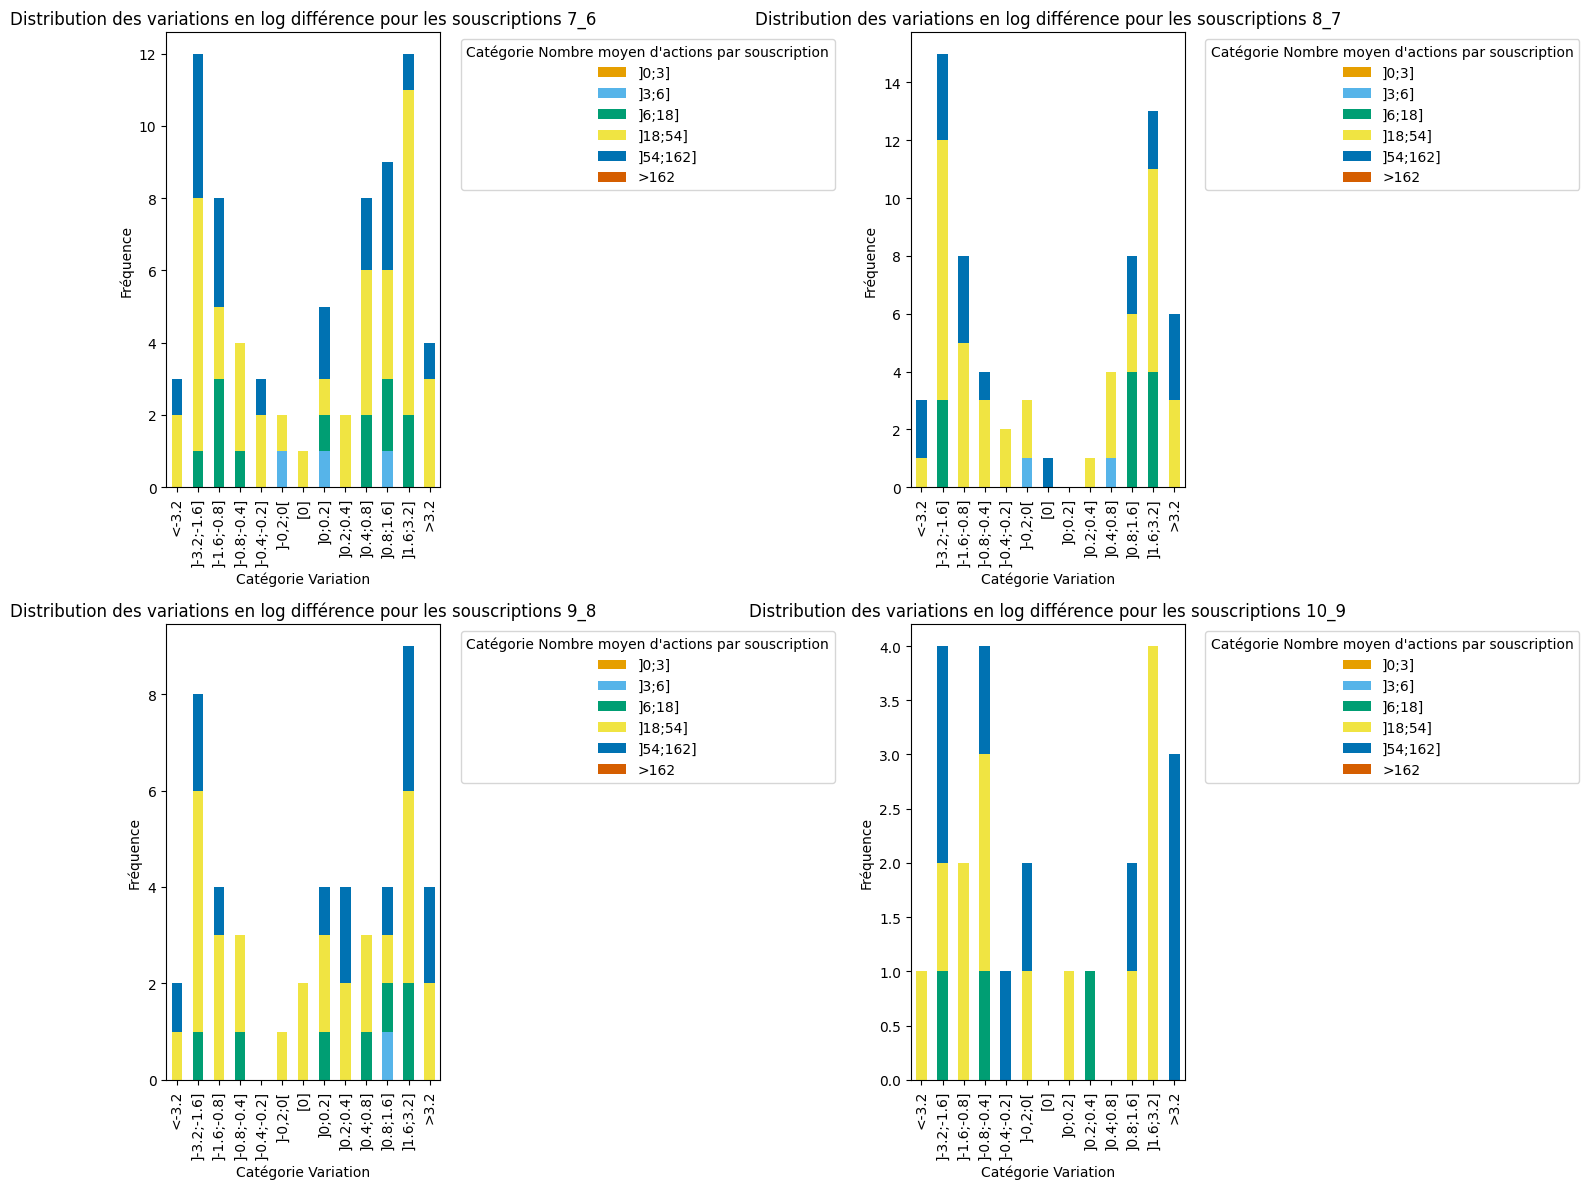

In [ ]:
# Liste des noms des tableaux croisés
cross_tabs = [cross_tab76, cross_tab87, cross_tab98, cross_tab109]

# Définissez les couleurs pour chaque catégorie
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00']

# Initialisez la variable pour gérer le nombre de graphiques par ligne
graphs_per_row = 2

# Calcul du nombre total de lignes nécessaires
num_rows = len(cross_tabs) // graphs_per_row + (len(cross_tabs) % graphs_per_row > 0)

# Créez la figure et les sous-graphiques
fig, axes = plt.subplots(nrows=num_rows, ncols=graphs_per_row, figsize=(15, 6 * num_rows))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Parcourez les tableaux croisés et créez les graphiques
for i, cross_tab in enumerate(cross_tabs):
    row, col = i // graphs_per_row, i % graphs_per_row
    ax = cross_tab.plot(kind='bar', stacked=True, color=colors, ax=axes[row, col])
    ax.set_xlabel('Catégorie Variation')
    ax.set_ylabel('Fréquence')
    ax.set_title(f'Distribution des variations en log différence pour les souscriptions {i+7}_{i+6}')
    ax.legend(title='Catégorie Nombre moyen d\'actions par souscription', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez les graphiques
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import display, HTML


# Insérer un saut de page
#display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Création de reçus fiscaux</u></h2></center>'))

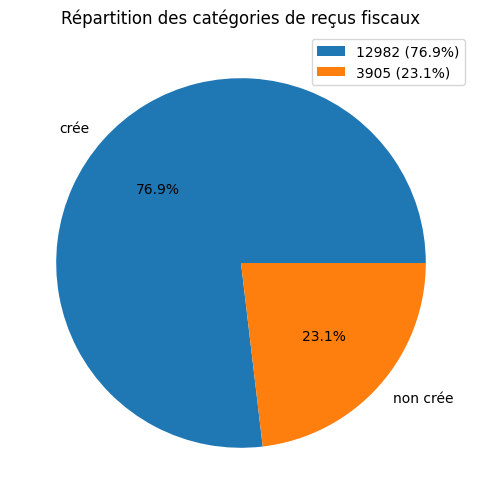

In [ ]:
import pandas as pd

df_RFcrée = df2["A fait l'objet d'un reçu fiscal"].value_counts().reset_index()
df_RFcrée.columns = ['catégories', 'Nombre']

# Convertir la colonne 'catégories' en type chaîne de caractères
df_RFcrée['catégories'] = df_RFcrée['catégories'].astype(str)

# Remplacer les valeurs de la colonne 'catégories'
df_RFcrée['catégories'] = df_RFcrée['catégories'].replace({'1': 'crée', '0': 'non crée'})


import matplotlib.pyplot as plt

# Calculer le total des nombres
total = df_RFcrée['Nombre'].sum()

# Calculer le pourcentage de chaque catégorie
df_RFcrée['Pourcentage'] = df_RFcrée['Nombre'] / total * 100

# Créer le pie chart
plt.figure(figsize=(8, 6))
plt.pie(df_RFcrée['Nombre'], labels=df_RFcrée['catégories'], autopct='%1.1f%%')
plt.title("Répartition des catégories de reçus fiscaux")

# Afficher les étiquettes de données en nombre absolu et en pourcentage
labels = [f"{n} ({p:.1f}%)" for n, p in zip(df_RFcrée['Nombre'], df_RFcrée['Pourcentage'])]
plt.legend(labels, loc='best')

# Afficher le pie chart
plt.show()


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Sur toutes les souscriptions qu'il y a eu, 13,5% n'ont pas fait l'objet d'un reçu fiscal</h4>"))

In [ ]:
df2.loc[:, "multi-casquette ?"] = df2.apply(lambda row: "Actionnaire-donateur" if row["Actionnaire ?"] == 1 and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)  and row["adhérent N"] == 0 and row['adhérent N-1'] == 0
                                            else "Actionnaire-adhérent" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and row["Donateur N"] == 0 and row['RFM-Date Dernier Don'] < twenty4_months_ago
                                            else "Triple-engagement" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)
                                            else "Actionnaire uniquement", axis=1)

df2.loc[:, 'multi-souscripteur ?'] = df2.duplicated(subset='ID du contact', keep=False)


dummies = pd.get_dummies(df2["A fait l'objet d'un reçu fiscal"], prefix="A fait l'objet d'un reçu fiscal")

# Concaténation des dummies avec le DataFrame d'origine
df2 = pd.concat([df2, dummies], axis=1)
colonnes_dummies = ["A fait l'objet d'un reçu fiscal_0", "A fait l'objet d'un reçu fiscal_1"]

# Remplacement des valeurs True par 1 et False par 0 dans les colonnes de dummies
df2[colonnes_dummies] = df2[colonnes_dummies].replace({True: 1, False: 0})
df2['Nombre de souscriptions'] = df2['ID du contact'].map(df2['ID du contact'].value_counts())
conditions = [
     (df2['Nombre de souscriptions'] < 2),
     (df2['Nombre de souscriptions'] <3),
     (df2['Nombre de souscriptions'] <=5),
     (df2['Nombre de souscriptions'] <=10),
]

choices = ['1 souscription', "2 souscriptions" , "3 à 5 souscriptions","6 à 10 souscriptions"]

df2['Catégories souscripteurs'] = np.select(conditions, choices, default='10 souscriptions et plus')

df_RF = df2.sort_values(by='ID du contact')
grouped_counts = df2.groupby('ID du contact')["A fait l'objet d'un reçu fiscal_1"].sum()
df_RF = df_RF.merge(grouped_counts, on='ID du contact', suffixes=('', '_count'))
df_RF["% reçu fiscal demandé"] = df_RF ["A fait l'objet d'un reçu fiscal_1_count"] / df_RF["Nombre de souscriptions"] * 100
df_RF= df_RF.drop(["A fait l'objet d'un reçu fiscal_0", "A fait l'objet d'un reçu fiscal_1","A fait l'objet d'un reçu fiscal_1_count"], axis=1)
df_RF = df_RF.drop_duplicates(subset = "ID du contact")

conditions = [
    (df_RF ["% reçu fiscal demandé"] == 0),
    (df_RF ["% reçu fiscal demandé"] < 20),
    (df_RF ["% reçu fiscal demandé"] < 40),
    (df_RF ['% reçu fiscal demandé'] < 60),
    (df_RF ['% reçu fiscal demandé'] < 80),
    (df_RF ['% reçu fiscal demandé'] < 100)
]

choices =["0 % de RF crées sur l'ensemble des soucriptions", "]0 - 20[ % de RF crées sur l'ensemble des soucriptions", "[20 - 40[ % de RF crées sur l'ensemble des soucriptions", "[40 - 60[ % de RF crées sur l'ensemble des soucriptions", "[60 - 80[ % de RF crées sur l'ensemble des soucriptions", "[80 - 100[ % de RF crées sur l'ensemble des soucriptions"]
df_RF['catégories des demandeurs de RF'] = np.select(conditions, choices, default="100 % de RF crées sur l'ensemble des soucriptions")


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Nombres d'individus par catégories de demandeurs de RF (part des souscriptions qui ont fait l'objet d'un RF sur toutes leurs souscriptions)</h4>"))

In [ ]:
value_counts = df_RF["catégories des demandeurs de RF"].value_counts().reset_index()
value_counts.columns = ["Catégories des demandeurs de RF", "Nombre d'individus"]
categories_order = ["0 % de RF crées sur l'ensemble des soucriptions", "]0 - 20[ % de RF crées sur l'ensemble des soucriptions", "[20 - 40[ % de RF crées sur l'ensemble des soucriptions", "[40 - 60[ % de RF crées sur l'ensemble des soucriptions", "[60 - 80[ % de RF crées sur l'ensemble des soucriptions", "[80 - 100[ % de RF crées sur l'ensemble des soucriptions", "100 % de RF crées sur l'ensemble des soucriptions"]

# Créer un DataFrame contenant toutes les catégories dans l'ordre spécifié
categories_df = pd.DataFrame({"Catégories des demandeurs de RF": categories_order})

# Fusionner les données avec la réindexation
value_counts_sorted = categories_df.merge(value_counts, how="left")

value_counts["Catégories des demandeurs de RF"] = value_counts["Catégories des demandeurs de RF"].astype(str)

# Fusionner les données avec la réindexation
value_counts_sorted = categories_df.merge(value_counts, how="left")


In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Données pour l'histogramme
categories = value_counts_sorted["Catégories des demandeurs de RF"]
counts = value_counts_sorted["Nombre d'individus"]

# Créer le graphique
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts)

# Incliner les noms des catégories et espacer les barres
plt.xticks(rotation=45, ha='right')

# Titre et étiquettes des axes
plt.title("Nombre d'individus appartenant aux différentes catégories de demandeurs de RF ")
plt.xlabel("")
plt.ylabel("Nombre d'individus")

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Afficher l'histogramme
plt.show()



posx and posy should be finite values


posx and posy should be finite values


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : il y a eu 17 519 personnes qui ont demandé un reçu fiscal pour l'ensemble de leurs souscriptions (100 % de RF crées sur l'ensemble des souscriptions)</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Moyennes des parts de RF demandés sur l'ensemble des souscription individuelles par multi-souscripteurs ?</h3>"))

In [ ]:
df_RF_MS = df_RF.groupby("multi-souscripteur ?")["% reçu fiscal demandé"].mean().to_frame()
df_RF_MS = df_RF_MS.round()
df_RF_MS

% reçu fiscal demandé
multi-souscripteur ?                       
False                                  77.0
True                                   77.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Les multis souscripteurs ont demandé en moyenne un reçu fiscal pour 84 % de leurs souscriptions</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Moyennes des parts de RF demandés sur l'ensemble des souscription individuelles par catégories d'âge</h3>"))

In [ ]:
df_RF_age = df_RF.groupby("catégories âge")["% reçu fiscal demandé"].mean().to_frame()
df_RF_age.round()

% reçu fiscal demandé
catégories âge                       
0-25 ans                         77.0
25-40 ans                        77.0
40-60 ans                        77.0
60 ans et plus                   76.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Moyennes des parts de RF demandés sur l'ensemble des souscription individuelles par ancienneté de l'actionnaire</h3>"))

In [ ]:
df_RF_ancienneté = df_RF.groupby("ancienneté actionnaires")["% reçu fiscal demandé"].mean().to_frame()
df_RF_ancienneté = df_RF_ancienneté.reindex(index=ordre_categories_ancienneté)
df_RF_ancienneté.round()

% reçu fiscal demandé
ancienneté actionnaires                                      
Nouvel actionnaire depuis 2017 ou plus                   76.0
Nouvel actionnaire entre 2012 à 2017                     77.0
Nouvel actionnaire en 2012 ou moins                      77.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Moyennes des parts de RF demandés sur l'ensemble des souscription individuelles par catégories de souscripteurs</h3>"))

In [ ]:
df_RF_catsous= df_RF.groupby('Catégories souscripteurs')["% reçu fiscal demandé"].mean().to_frame()
df_RF_catsous = df_RF_catsous.reindex(index=ordre_categories)
df_RF_catsous.round()

% reçu fiscal demandé
Catégories souscripteurs                       
1 souscription                             77.0
2 souscriptions                            77.0
3 à 5 souscriptions                        77.0
6 à 10 souscriptions                       77.0
10 souscriptions et plus                   76.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))


display(HTML('<center><h2><u>Affectation des souscriptions</u></h2></center>'))

In [ ]:
df2['Type affectation'] = df2["Affectation"].apply(lambda x: 'dédié région' if str(x).startswith('Collecte')
                                                 else "non dédié " if str(x).startswith('Ensemble') else 'dédié projet')

In [ ]:


# Supposons que votre DataFrame s'appelle df2
df_affectation= df2['Type affectation'].value_counts().reset_index()

# Renommer les colonnes du tableau
df_affectation.columns = ['Valeur', 'Nombre de correspondances']


df_affectation


Valeur  Nombre de correspondances
0  dédié projet                       5785
1  dédié région                       5600
2    non dédié                        5502

In [ ]:
import matplotlib.pyplot as plt

# Calculer les valeurs et les étiquettes pour le pie chart
counts = df2['Type affectation'].value_counts()
percentages = counts / counts.sum() * 100

# Créer le pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Types d'affectation")



# Afficher le graphique
plt.show()

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Répartition des affectations région</h3>"))

In [ ]:
df_région = df2[df2['Type affectation'] == 'dédié région'].copy()


df_région['Affectation'] = df_région['Affectation'].str.replace('Collecte dédiée ', '')

df_région['Affectation'] = df_région['Affectation'].str.replace('lorraine', 'LORRAINE')

df_région= df_région['Affectation'].value_counts().reset_index()

total_count = df_région['count'].sum()


df_région['Part du total en %'] = df_région['count'] / total_count * 100

# Calculer le total de chaque colonne
total = df_région.sum()

# Créer un nouveau DataFrame avec les totaux
df_total = pd.DataFrame([total.values], columns=df_région.columns)

# Renommer la nouvelle ligne avec le label "Total"
df_total.at[0, 'Affectation'] = "Total"

# Concaténer le DataFrame original avec le DataFrame des totaux
df_région_total = pd.concat([df_région, df_total])

# Afficher le DataFrame avec les totaux
df_région_total

Affectation  count  Part du total en %
0                - Île-de-France    282            5.035714
1             - Poitou-Charentes    273            4.875000
2                     - Limousin    272            4.857143
3         - Languedoc-Roussillon    267            4.767857
4                - Midi-Pyrénées    264            4.714286
5           - Nord-Pas-de-Calais    262            4.678571
6                    - Bourgogne    262            4.678571
7            - Champagne-Ardenne    259            4.625000
8                    - Aquitaine    259            4.625000
9                - Franche-Comté    254            4.535714
10                    - Bretagne    253            4.517857
11                      - Centre    252            4.500000
12                 - Rhône-Alpes    251            4.482143
13             - Haute-Normandie    251            4.482143
14                      - Alsace    251            4.482143
15             - Basse-Normandie    250            4.464286
16                    - Lorraine    249            4.446429
17                    - Picardie    248            4.428571
18  - Provence-Alpes-Côte d'Azur    242            4.321429
19            - Pays de la Loire    239            4.267857
20                       - Corse    234            4.178571
21                    - Auvergne    226            4.035714
0                          Total   5600          100.000000

In [ ]:
dummies = pd.get_dummies(df2['Type affectation'], prefix='Affectation')

# Concaténation des dummies avec le DataFrame d'origine
df2 = pd.concat([df2, dummies], axis=1)
colonnes_dummies = ["Affectation_dédié région", 'Affectation_dédié projet', 'Affectation_non dédié ']

# Remplacement des valeurs True par 1 et False par 0 dans les colonnes de dummies
df2[colonnes_dummies] = df2[colonnes_dummies].replace({True: 1, False: 0})
df2['Nombre de souscriptions'] = df2['ID du contact'].map(df2['ID du contact'].value_counts())
df_affect = df2.sort_values(by='ID du contact')
grouped_counts = df2.groupby('ID du contact')["Affectation_dédié région"].sum()
grouped_countsDP = df2.groupby('ID du contact')["Affectation_dédié projet"].sum()
grouped_countsND = df2.groupby('ID du contact')["Affectation_non dédié "].sum()
df_affect = df_affect.merge(grouped_counts, on='ID du contact', suffixes=('', '_count'))
df_affect = df_affect.merge(grouped_countsDP, on='ID du contact', suffixes=('', '_count'))
df_affect = df_affect.merge(grouped_countsND, on='ID du contact', suffixes=('', '_count'))
df_affect["% affec région"] = df_affect['Affectation_dédié région_count'] / df_affect["Nombre de souscriptions"] * 100
df_affect["% affec projet"] = df_affect['Affectation_dédié projet_count'] / df_affect["Nombre de souscriptions"] * 100
df_affect["% affec non-dédié"] = df_affect['Affectation_non dédié _count'] / df_affect["Nombre de souscriptions"] * 100

df_affect= df_affect.drop(['Affectation_dédié projet', 'Affectation_dédié région', 'Affectation_dédié région_count', 'Affectation_non dédié ', 'Affectation_dédié projet_count','Affectation_non dédié _count'], axis=1)
df_affect = df_affect.drop_duplicates(subset = "ID du contact")
conditions = [
     (df_affect['Nombre de souscriptions'] < 2),
     (df_affect['Nombre de souscriptions'] <3),
     (df_affect['Nombre de souscriptions'] <=5),
     (df_affect['Nombre de souscriptions'] <=10),
]

choices = ['1 souscription', "2 souscriptions" , "3 à 5 souscriptions","6 à 10 souscriptions"]

df_affect['Catégories souscripteurs'] = np.select(conditions, choices, default='10 souscriptions et plus')


In [ ]:
df_affect.rename(columns={'Territoire Terre de Liens': 'Territoire d\'habitation renseigné'}, inplace=True)

In [ ]:
df_affect_nbsous = df_affect.groupby('Catégories souscripteurs')['% affec région'].mean().to_frame()
df_affect_catage = df_affect.groupby('catégories âge')['% affec région'].mean().to_frame()
df_affect_MC = df_affect.groupby('multi-casquette ?')['% affec région'].mean().to_frame()
df_affect_ancienneté = df_affect.groupby('ancienneté actionnaires')['% affec région'].mean().to_frame()
df_affect_MS= df_affect.groupby('multi-souscripteur ?')['% affec région'].mean().to_frame()

# Calculate means for '% affec projet' by different categories
df_affect_nbsous_proj = df_affect.groupby('Catégories souscripteurs')['% affec projet'].mean().to_frame()
df_affect_catage_proj = df_affect.groupby('catégories âge')['% affec projet'].mean().to_frame()
df_affect_MC_proj = df_affect.groupby('multi-casquette ?')['% affec projet'].mean().to_frame()
df_affect_ancienneté_proj = df_affect.groupby('ancienneté actionnaires')['% affec projet'].mean().to_frame()
df_affect_MS_proj= df_affect.groupby('multi-souscripteur ?')['% affec projet'].mean().to_frame()
# Calculate means for '% affec non-dédié' by different categories
df_affect_nbsous_non_dedie = df_affect.groupby('Catégories souscripteurs')['% affec non-dédié'].mean().to_frame()
df_affect_catage_non_dedie = df_affect.groupby('catégories âge')['% affec non-dédié'].mean().to_frame()
df_affect_MC_non_dedie = df_affect.groupby('multi-casquette ?')['% affec non-dédié'].mean().to_frame()
df_affect_ancienneté_non_dedie = df_affect.groupby('ancienneté actionnaires')['% affec non-dédié'].mean().to_frame()
df_affect_MS_non_dedie = df_affect.groupby('multi-souscripteur ?')['% affec non-dédié'].mean().to_frame()


# Merge DataFrames for '% affec région', '% affec projet', and '% affec non-dédié' for each category
merged_df_nbsous = df_affect_nbsous.merge(df_affect_nbsous_proj, on='Catégories souscripteurs')
merged_df_nbsous = merged_df_nbsous.merge(df_affect_nbsous_non_dedie, on='Catégories souscripteurs')

merged_df_catage = df_affect_catage.merge(df_affect_catage_proj, on='catégories âge')
merged_df_catage = merged_df_catage.merge(df_affect_catage_non_dedie, on='catégories âge')

merged_df_MC = df_affect_MC.merge(df_affect_MC_proj, on='multi-casquette ?')
merged_df_MC = merged_df_MC.merge(df_affect_MC_non_dedie, on='multi-casquette ?')

merged_df_ancienneté = df_affect_ancienneté.merge(df_affect_ancienneté_proj, on='ancienneté actionnaires')
merged_df_ancienneté = merged_df_ancienneté.merge(df_affect_ancienneté_non_dedie, on='ancienneté actionnaires')
merged_df_MS = df_affect_MS.merge(df_affect_MS_proj, on='multi-souscripteur ?')
merged_df_MS = merged_df_MS.merge(df_affect_MS_non_dedie, on='multi-souscripteur ?')

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h2>Part moyenne des affectations  sur toutes les souscriptions par personne</h2>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Part moyenne des affectations par multi-souscrippteurs ou pas</h3>"))

In [ ]:
merged_df_MS 


% affec région  % affec projet  % affec non-dédié
multi-souscripteur ?                                                   
False                      33.178468       34.668376          32.153156
True                       33.019107       34.253755          32.727138

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Part moyenne des affectations par catégories de souscripteurs</h3>"))

In [ ]:
merged_df_nbsous["Total"] = merged_df_nbsous["% affec région"]+ merged_df_nbsous["% affec projet"]+ merged_df_nbsous["% affec non-dédié"]
ordre_categories = ['1 souscription', '2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus']
merged_df_nbsous = merged_df_nbsous.reindex(ordre_categories)
merged_df_nbsous = merged_df_nbsous.round()
merged_df_nbsous



% affec région  % affec projet  % affec non-dédié   
Catégories souscripteurs                                                      
1 souscription                      33.0            35.0               32.0  \
2 souscriptions                     33.0            35.0               33.0   
3 à 5 souscriptions                 34.0            34.0               32.0   
6 à 10 souscriptions                32.0            34.0               34.0   
10 souscriptions et plus            34.0            31.0               35.0   

                          Total  
Catégories souscripteurs         
1 souscription            100.0  
2 souscriptions           100.0  
3 à 5 souscriptions       100.0  
6 à 10 souscriptions      100.0  
10 souscriptions et plus  100.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : les personnes ayant eu 3 à 5 soucriptions les ont dédiées en moyenne à 33 % à une région. On remarque que les mono-souscripteurs ont tendance à affecter leurs souscritpions aux fermes</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Part moyenne des affectations par catégories d'âge</h3>"))

In [ ]:
merged_df_catage["Total"] = merged_df_catage["% affec région"]+ merged_df_catage["% affec projet"]+ merged_df_catage["% affec non-dédié"]
merged_df_catage.round() 

% affec région  % affec projet  % affec non-dédié  Total
catégories âge                                                          
0-25 ans                  33.0            34.0               32.0  100.0
25-40 ans                 33.0            35.0               32.0  100.0
40-60 ans                 33.0            36.0               32.0  100.0
60 ans et plus            33.0            34.0               33.0  100.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Part moyenne des affectations  par catégories d'ancienneté</h3>"))

In [ ]:
merged_df_ancienneté["Total"] = merged_df_ancienneté["% affec région"]+ merged_df_ancienneté["% affec projet"]+ merged_df_ancienneté["% affec non-dédié"]
ordre_categories_ancienneté = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']
merged_df_ancienneté.reindex(ordre_categories_ancienneté)
merged_df_ancienneté.round()

% affec région  % affec projet   
ancienneté actionnaires                                                  
Nouvel actionnaire depuis 2017 ou plus            33.0            35.0  \
Nouvel actionnaire en 2012 ou moins               33.0            35.0   
Nouvel actionnaire entre 2012 à 2017              33.0            34.0   

                                        % affec non-dédié  Total  
ancienneté actionnaires                                           
Nouvel actionnaire depuis 2017 ou plus               32.0  100.0  
Nouvel actionnaire en 2012 ou moins                  32.0  100.0  
Nouvel actionnaire entre 2012 à 2017                 33.0  100.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les actionnaires arrivés entre 2012 et 2017 affectaient  d'autant plus leurs souscriptions à des fermes</h4>"))

In [ ]:
merged_df_MC["Total"] = merged_df_MC["% affec région"]+ merged_df_MC["% affec projet"]+ merged_df_MC["% affec non-dédié"]
merged_df_MC.round()


% affec région  % affec projet  % affec non-dédié   
multi-casquette ?                                                           
Actionnaire uniquement            34.0            34.0               32.0  \
Actionnaire-adhérent              33.0            35.0               32.0   
Actionnaire-donateur              33.0            34.0               33.0   
Triple-engagement                 32.0            35.0               33.0   

                        Total  
multi-casquette ?              
Actionnaire uniquement  100.0  
Actionnaire-adhérent    100.0  
Actionnaire-donateur    100.0  
Triple-engagement       100.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les actionnaires-adhérents ont tendance à plus affecter leurs souscriptions à des fermes ou à une région</h4>"))

In [ ]:
from IPython.display import display, HTML
display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Durée moyenne de reprise de souscriptions (on ne parle que de multi-souscripteurs)</u></h2></center>'))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Il s'agit de regarder la durée entre différentes dates de prise de souscriptions par personne. On fait ensuite une moyenne individuelle de ces durées</h3>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne de reprise de souscriptions pour actionnaires et ex actionnaires</h3>"))

In [ ]:
import pandas as pd
import numpy as np

columns_to_drop = ['âge', 'Territoire Terre de Liens', 'adhérent N', 'Donateur N',
                   'RFM-Date Première Souscription', 'Foncière : Capital possédé',
                   'Foncière : Nombre d\'actions détenues', 'Foncière : Part du capital possédée (%)',
                   'Numéro du contrat', 'Type d\'enregistrement des contrats', 'Nombre d\'actions à l\'acquisition',
                   'A fait l\'objet d\'un reçu fiscal', 'Affectation', 'Mouvement de titre Name', 'Nature du mouvement',
                   "Date d'activation", 'Actions - Date de fin', 'Nombre d\'actions échangées', 'Difference début fin',
                   'retrait complet ou partiel', 'année rachat', 'durée conservation', 'répartition année',
                   'catégories âge', 'ancienneté actionnaires', 'répartition année nouveau actionnaire',
                   'catégorie souscription', 'Type affectation', 'Nombre de souscriptions',"Affectation_dédié projet", "Affectation_dédié région","Affectation_non dédié "]

df2_copy = df2.drop(columns=columns_to_drop).copy()

df2_copy["Date d'activation"] = pd.to_datetime(df2_copy['Date du Mouvement'], format="%Y-%d-%m", dayfirst=True)

# Trier le dataframe par nom et date
df_sorted = df2_copy.sort_values(by=['ID du contact', 'Date du Mouvement'])

# Calculer la différence de dates
df_sorted['Différence'] = df_sorted.groupby('ID du contact')['Date du Mouvement'].diff()

# Calculer la différence moyenne par nom, en excluant les valeurs manquantes
df_diff_mean = df_sorted.groupby('ID du contact')['Différence'].mean().dropna().reset_index()


# Convertir la colonne Différence en timedelta
df_diff_mean['Différence'] = pd.to_timedelta(df_diff_mean['Différence'])

df_diff_mean['Différence'] = df_diff_mean['Différence'].dt.floor('D')

# Calculer la moyenne en durée d'année en ignorant les jours, heures, minutes et secondes
mean_difference = np.mean(df_diff_mean['Différence'] / np.timedelta64(1, 'W'))
mean_difference = mean_difference/ 52
# Arrondir le résultat au dixième
mean_difference_rounded = round(mean_difference, 1)

# Afficher la moyenne en durée d'année arrondie
print("Durée moyenne pour reprise d'actions pour actionnaires et ex actionnaires:", mean_difference_rounded)


Durée moyenne pour reprise d'actions pour actionnaires et ex actionnaires: 2.8


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : les souscripteurs qui ont au minimum 2 souscriptions en ont repris une en moyenne au bout de 2,4 ans</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne de reprise de souscriptions pour actionnaires</h3>"))

In [ ]:
df_actionnaire= df2_copy[df2_copy['Actionnaire ?'] == 1 ].copy()

In [ ]:
df_actionnaire["Date d'activation"] = pd.to_datetime(df_actionnaire['Date du Mouvement'], dayfirst=True)

# Trier le dataframe par nom et date
df_sorted2 = df_actionnaire.sort_values(by=['ID du contact', 'Date du Mouvement'])

# Calculer la différence de dates
df_sorted2['Différence'] = df_sorted2.groupby('ID du contact')['Date du Mouvement'].diff()

# Calculer la différence moyenne par nom, en excluant les valeurs manquantes
df_diff_mean2 = df_sorted2.groupby('ID du contact')['Différence'].mean().dropna().reset_index()


# Convertir la colonne Différence en timedelta
df_diff_mean2['Différence'] = pd.to_timedelta(df_diff_mean2['Différence'])

df_diff_mean2['Différence'] = df_diff_mean2['Différence'].dt.floor('D')

# Calculer la moyenne en durée d'année en ignorant les jours, heures, minutes et secondes
mean_difference2 = np.mean(df_diff_mean2['Différence'] / np.timedelta64(1, 'W'))
mean_difference2 = mean_difference2/ 52 

# Arrondir le résultat au dixième
mean_difference_rounded2 = round(mean_difference2, 1)

# Afficher la moyenne en durée d'année arrondie
print("Durée moyenne pour reprise d'action pour actionnaires:", mean_difference_rounded2)


Durée moyenne pour reprise d'action pour actionnaires: 2.8


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne de reprise de souscriptions pour multi-casquettes ? </h3>"))

In [ ]:
df2.loc[:, "multi-casquette ?"] = df2.apply(lambda row: "Actionnaire-donateur" if row["Actionnaire ?"] == 1 and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)  and row["adhérent N"] == 0 and row['adhérent N-1'] == 0
                                            else "Actionnaire-adhérent" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and row["Donateur N"] == 0 and row['RFM-Date Dernier Don'] < twenty4_months_ago
                                            else "Triple-engagement" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)
                                            else "Actionnaire uniquement", axis=1)

df_diff_mean3 = df_diff_mean2.merge(df2[['ID du contact', 'multi-casquette ?']], on='ID du contact', how='left')

df_diff_mean3 = df_diff_mean3.drop_duplicates(subset="ID du contact")
# Convertir la colonne Différence en timedelta
df_diff_mean3['Différence'] = pd.to_timedelta(df_diff_mean3['Différence'])
# Grouper le DataFrame d'origine par 'multi-casquette ?' et compter les occurrences
count_per_category = df_diff_mean3.groupby('multi-casquette ?').size().reset_index(name='Nombre de personnes')
df_diff_mean3['Différence'] = df_diff_mean3['Différence'].dt.floor('D')
df_mean_diff = df_diff_mean3.groupby('multi-casquette ?')['Différence'].mean().reset_index()
df_mean_diff['Différence en années'] = df_mean_diff['Différence'] / pd.Timedelta(days=365)
df_mean_diff['Différence en années'] = df_mean_diff['Différence en années'].round(1)
df_mean_diff = df_mean_diff.drop('Différence', axis=1)
df_mean_diff = df_mean_diff.merge(count_per_category, on='multi-casquette ?', how='left')
df_mean_diff

multi-casquette ?  Différence en années  Nombre de personnes
0  Actionnaire uniquement                   2.8                  377
1    Actionnaire-adhérent                   2.9                 1245
2    Actionnaire-donateur                   2.9                  523
3       Triple-engagement                   2.7                 1369

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne de reprise de souscriptions par catégories d'âge?  </h3>"))

In [ ]:
df_diff_mean4 = df_diff_mean2.merge(df2[['ID du contact', 'catégories âge']], on='ID du contact', how='left')

df_diff_mean4 = df_diff_mean4.drop_duplicates(subset="ID du contact")
# Convertir la colonne Différence en timedelta
df_diff_mean4['Différence'] = pd.to_timedelta(df_diff_mean4['Différence'])
df_diff_mean4['Différence'] = df_diff_mean4['Différence'].dt.floor('D')
count_per_category = df_diff_mean4.groupby('catégories âge').size().reset_index(name='Nombre de personnes')
df_mean_diff2 = df_diff_mean4.groupby('catégories âge')['Différence'].mean().reset_index()
df_mean_diff2['Différence en années'] = df_mean_diff2['Différence'] / pd.Timedelta(days=365)
df_mean_diff2['Différence en années'] = df_mean_diff2['Différence en années'].round(1)
df_mean_diff2 = df_mean_diff2.drop('Différence', axis=1)
df_mean_diff2 = df_mean_diff2.merge(count_per_category, on='catégories âge', how='left')
df_mean_diff2

catégories âge  Différence en années  Nombre de personnes
0        0-25 ans                   2.8                  957
1       25-40 ans                   2.7                  590
2       40-60 ans                   2.9                  761
3  60 ans et plus                   2.8                 1206

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne de reprise de souscriptions par catégories d'ancienneté </h3>"))

In [ ]:
df_diff_mean5 = df_diff_mean2.merge(df2[['ID du contact', 'ancienneté actionnaires']], on='ID du contact', how='left')

df_diff_mean5 = df_diff_mean5.drop_duplicates(subset="ID du contact")
# Convertir la colonne Différence en timedelta
df_diff_mean5['Différence'] = pd.to_timedelta(df_diff_mean5['Différence'])
df_diff_mean5['Différence'] = df_diff_mean5['Différence'].dt.floor('D')
count_per_category = df_diff_mean5.groupby('ancienneté actionnaires').size().reset_index(name='Nombre de personnes')
df_mean_diff3 = df_diff_mean5.groupby('ancienneté actionnaires')['Différence'].mean().reset_index()
df_mean_diff3['Différence en années'] = df_mean_diff3['Différence'] / pd.Timedelta(days=365)
df_mean_diff3['Différence en années'] = df_mean_diff3['Différence en années'].round(1)
df_mean_diff3 = df_mean_diff3.drop('Différence', axis=1)
# Ajouter une colonne pour définir l'ordre souhaité
df_mean_diff3['ordre'] = df_mean_diff3['ancienneté actionnaires'].apply(lambda x: ordre_categories_ancienneté.index(x))
df_mean_diff3 = df_mean_diff3.sort_values('ordre')
# Supprimer la colonne "ordre"
df_mean_diff3 = df_mean_diff3.drop('ordre', axis=1)
df_mean_diff3 = df_mean_diff3.merge(count_per_category, on='ancienneté actionnaires', how='left')
df_mean_diff3

ancienneté actionnaires  Différence en années   
0  Nouvel actionnaire depuis 2017 ou plus                   1.1  \
1    Nouvel actionnaire entre 2012 à 2017                   2.7   
2     Nouvel actionnaire en 2012 ou moins                   4.5   

   Nombre de personnes  
0                 1191  
1                 1102  
2                 1221

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les actionnaires arrivés depuis 2017 reprennent plus régulièrement des souscriptions</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne de reprise de souscriptions par catégories de souscripteurs </h3>"))

In [ ]:
df_diff_mean6 = df_diff_mean2.merge(df_MS[['ID du contact', 'Catégories souscripteurs']], on='ID du contact', how='left')

df_diff_mean6 = df_diff_mean6.drop_duplicates(subset="ID du contact")
# Convertir la colonne Différence en timedelta
df_diff_mean6['Différence'] = pd.to_timedelta(df_diff_mean6['Différence'])
df_diff_mean6['Différence'] = df_diff_mean6['Différence'].dt.floor('D')

count_per_category = df_diff_mean6.groupby('Catégories souscripteurs').size().reset_index(name='Nombre de personnes')

df_mean_diff4 = df_diff_mean6.groupby('Catégories souscripteurs')['Différence'].mean().reset_index()
df_mean_diff4['Différence en années'] = df_mean_diff4['Différence'] / pd.Timedelta(days=365)
df_mean_diff4['Différence en années'] = df_mean_diff4['Différence en années'].round(1)
df_mean_diff4 = df_mean_diff4.drop('Différence', axis=1)
# Ordre des catégories souhaitées
ordre_categories_souscripteurs2 = ['2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus']

# Ajouter une colonne pour définir l'ordre souhaité
df_mean_diff4['ordre'] = df_mean_diff4['Catégories souscripteurs'].apply(lambda x: ordre_categories_souscripteurs2.index(x))

# Trier le DataFrame en fonction de la colonne "ordre"
df_mean_diff4 = df_mean_diff4.sort_values('ordre')

# Supprimer la colonne "ordre"
df_mean_diff4 = df_mean_diff4.drop('ordre', axis=1)

# Réinitialiser les index
df_mean_diff4.reset_index(drop=True, inplace=True)
df_mean_diff4 = df_mean_diff4.merge(count_per_category, on='Catégories souscripteurs', how='left')


df_mean_diff4

Catégories souscripteurs  Différence en années  Nombre de personnes
0           2 souscriptions                   3.1                 2370
1       3 à 5 souscriptions                   2.2                 1050
2      6 à 10 souscriptions                   1.0                   73
3  10 souscriptions et plus                   0.8                   21

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les gros souscripteurs reprennent plus régulièrement des souscriptions</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h2>Notions : pour lecture des boites à moustaches ou box plots </h2>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Médiane = sépare la série de valeur en 2 parties. 50 % des valeurs sont au-dessous de la médiane et 50 % sont au dessus </h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Premier quartile (Q1) = 25 % des plus petites valeurs de la série sont compris avant cette valeur</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Troisième quartile (Q3)= 25 % des plus grandes valeurs de la série sont compris apres cette valeur soit 75 % des valeurs sont plus petite que cette valeur</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les whiskers ou les bornes extremes des boites à moustaches correspondent au Q1 - 1,5*(Q3-Q1) pour la borne inférieure et  au Q3 + 1,5*(Q3-Q1) pour la borne supérieure. Si le max et le min sont inclus dans ces bornes alors se sont leurs valeurs qui seront représentées par les extrémités de la boite. S'ils existent des valeurs hors de ces bornes de whiskers alors les bornes des boites à moustache représenteront les valeurs de ces whiskers.</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les valeurs hors des whiskers sont des valeurs aberrantes ou dites outliers. Ce sont les valeurs qui sont considérées comme extrèmes comparé au périmètre détermnié par la majorité des valeurs de la série</h4>"))

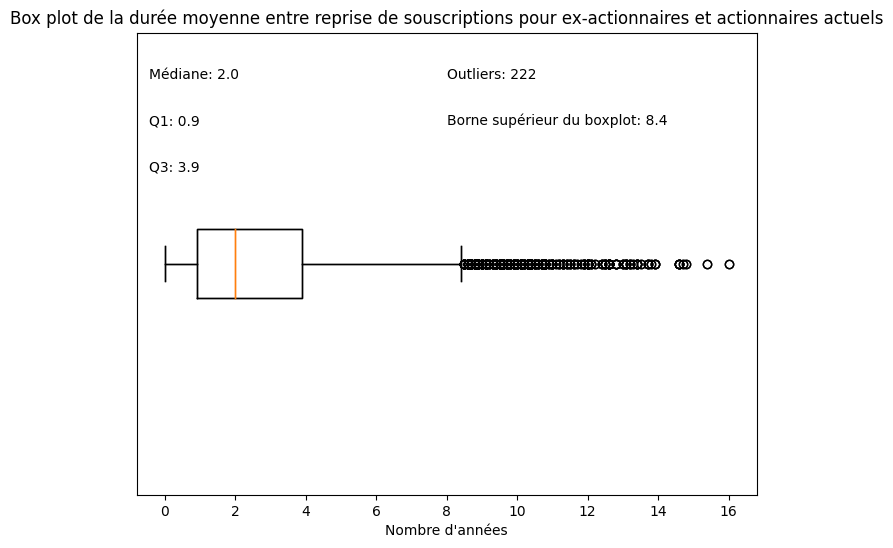

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df_diff_mean['Différence'] = df_diff_mean['Différence'].dt.total_seconds() / (365.25 * 24 * 60 * 60)
df_diff_mean["Différence"] = df_diff_mean["Différence"].round(1)

# Calculer la médiane, Q1 et Q3
median = np.median(df_diff_mean['Différence'])
q1 = np.percentile(df_diff_mean['Différence'], 25)
q3 = np.percentile(df_diff_mean['Différence'], 75)

# Calculer les limites inférieures et supérieures des whiskers
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
upper_whisker = upper_whisker.round(1)
# Créer le box plot horizontalement
plt.figure(figsize=(8, 6))
plt.boxplot(df_diff_mean['Différence'], vert=False)

# Calculer le nombre d'outliers
whiskers = plt.boxplot(df_diff_mean['Différence'], vert=False)['fliers']
num_outliers = len(whiskers[0].get_data()[0])

# Ajouter les valeurs de la médiane, Q1, Q3, limites des whiskers au graphique
plt.text(0.02, 0.9, f"Médiane: {median}", transform=plt.gca().transAxes)
plt.text(0.02, 0.8, f"Q1: {q1}", transform=plt.gca().transAxes)
plt.text(0.02, 0.7, f"Q3: {q3}", transform=plt.gca().transAxes)
plt.text(0.5, 0.8, f"Borne supérieur du boxplot: {upper_whisker}", transform=plt.gca().transAxes)
plt.text(0.5, 0.9, f"Outliers: {num_outliers}", transform=plt.gca().transAxes)

# Titre et étiquette de l'axe y
plt.title("Box plot de la durée moyenne entre reprise de souscriptions pour ex-actionnaires et actionnaires actuels")
plt.xlabel("Nombre d'années")
plt.ylabel("")
plt.yticks([])
# Afficher le box plot
plt.show()

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clés de lecture : Il y a 50 % de tous les multi-souscripteurs qui ont repris une souscription au bout de 1,6 an ou moins. Il y a 25 % d'entre eux qui en ont repris une au bout d'un 1 an ou moins(Q1), 25 % en ont repris une au bout de 3 ans ou plus (Q3) soit 75 % qui en ont repris au bout de 3 ans ou moins.</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Il y a 472 personnes qui sont considérées comme ayant une durée de reprise de souscriptions jugée statistiquement ''hors normes'' car cette durée est 1,5 fois plus grande que celle de 75 % de souscripteurs</h4>"))

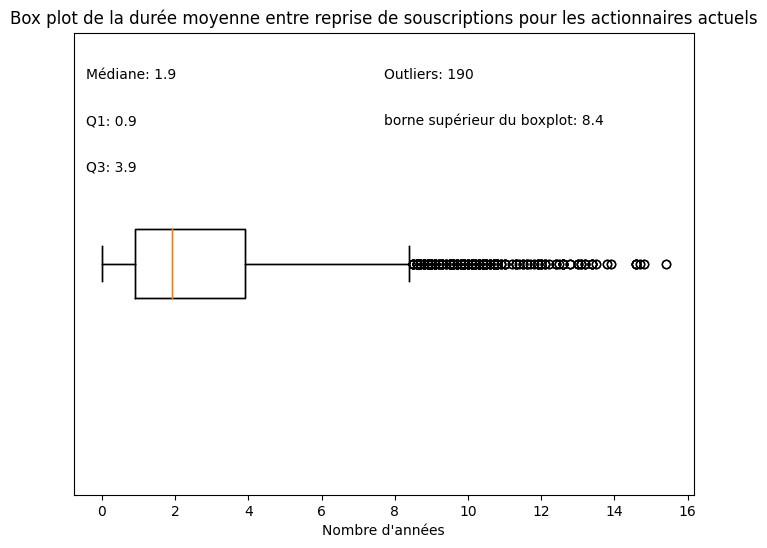

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df_diff_mean2['Différence'] = df_diff_mean2['Différence'].dt.total_seconds() / (365.25 * 24 * 60 * 60)
df_diff_mean2["Différence"] = df_diff_mean2["Différence"].round(1)

# Calculer la médiane, Q1 et Q3
median = np.median(df_diff_mean2['Différence'])
q1 = np.percentile(df_diff_mean2['Différence'], 25)
q3 = np.percentile(df_diff_mean2['Différence'], 75)

# Calculer les limites inférieures et supérieures des whiskers
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
upper_whisker = upper_whisker.round(1)
# Créer le box plot horizontalement
plt.figure(figsize=(8, 6))
plt.boxplot(df_diff_mean2['Différence'], vert=False)

# Calculer le nombre d'outliers
whiskers = plt.boxplot(df_diff_mean2['Différence'], vert=False)['fliers']
num_outliers = len(whiskers[0].get_data()[0])

# Ajouter les valeurs de la médiane, Q1, Q3, limites des whiskers au graphique
plt.text(0.02, 0.9, f"Médiane: {median}", transform=plt.gca().transAxes)
plt.text(0.02, 0.8, f"Q1: {q1}", transform=plt.gca().transAxes)
plt.text(0.02, 0.7, f"Q3: {q3}", transform=plt.gca().transAxes)
plt.text(0.5, 0.8, f"borne supérieur du boxplot: {upper_whisker}", transform=plt.gca().transAxes)
plt.text(0.5, 0.9, f"Outliers: {num_outliers}", transform=plt.gca().transAxes)

# Titre et étiquette de l'axe y
plt.title("Box plot de la durée moyenne entre reprise de souscriptions pour les actionnaires actuels")
plt.xlabel("Nombre d'années")
plt.ylabel("")
plt.yticks([])

# Afficher le box plot
plt.show()

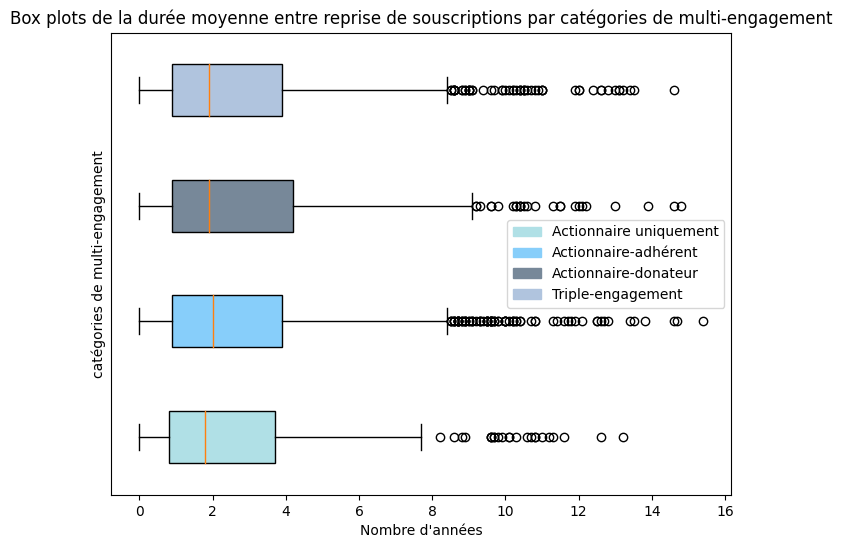

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir la colonne 'Différence' en années
df_diff_mean3['Différence'] = df_diff_mean3['Différence'] / np.timedelta64(1, 'W')
df_diff_mean3 = df_diff_mean3/ 52
df_diff_mean3['Différence'] = df_diff_mean3['Différence'].round(1)
# Créer les groupes pour le boxplot
grouped_data = df_diff_mean3.groupby('multi-casquette ?')['Différence'].apply(list)

# Créer le boxplot en inversant l'ordre des positions
# Créer le boxplot
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)

# Récupérer les étiquettes de catégories dans l'ordre personnalisé
categories = grouped_data.index

# Couleurs personnalisées pour chaque boîte
custom_colors =  ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes et création de la légende
for box, color, category in zip(boxes['boxes'], custom_colors, categories):
    box.set_facecolor(color)
    
# Titre et étiquette des axes
plt.title("Box plots de la durée moyenne entre reprise de souscriptions par catégories de multi-engagement")
plt.xlabel("Nombre d'années")
plt.ylabel("catégories de multi-engagement")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)

# Afficher le boxplot
plt.show()



In [ ]:
#Créer les groupes pour le boxplot
grouped_data = df_diff_mean3.groupby('multi-casquette ?')['Différence'].apply(list)

# Créer le tableau
df_retrait_multicasquette = grouped_data.apply(lambda x: pd.Series({
    'Médiane Durée conservation': np.median(x),
    'Q1': np.percentile(x, 25),
    'Q3': np.percentile(x, 75),
    'Upper Whiskers': np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25)),
    "Nombre d'outliers": np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))
})).reset_index()
df_retrait_multicasquette.rename(columns={'multi-casquette ?': 'catégories de multi-engagement'}, inplace=True)
# Inverser l'ordre des indices dans le DataFrame
df_retrait_multicasquette = df_retrait_multicasquette.iloc[::-1].reset_index(drop=True)
df_retrait_multicasquette


catégories de multi-engagement  Médiane Durée conservation   Q1   Q3   
0              Triple-engagement                         1.9  0.9  3.9  \
1           Actionnaire-donateur                         1.9  0.9  4.2   
2           Actionnaire-adhérent                         2.0  0.9  3.9   
3         Actionnaire uniquement                         1.8  0.8  3.7   

   Upper Whiskers  Nombre d'outliers  
0            8.40               54.0  
1            9.15               26.0  
2            8.40               80.0  
3            8.05               24.0

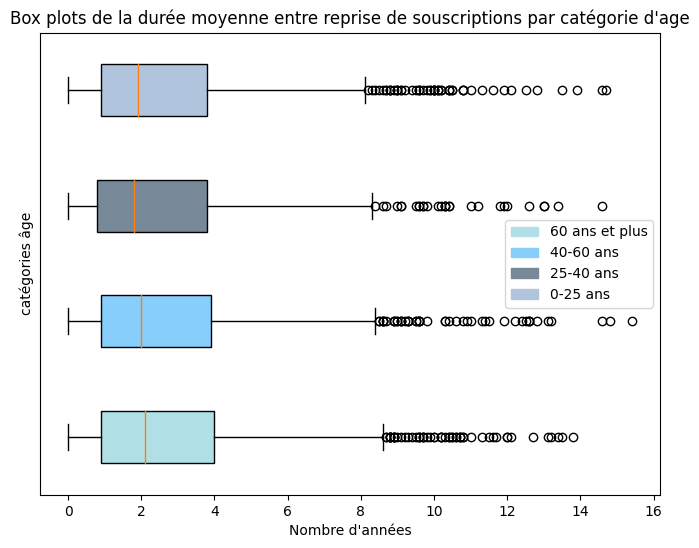

In [ ]:
# Convertir la colonne 'Différence' en années
df_diff_mean4['Différence'] = df_diff_mean4['Différence'] / np.timedelta64(1, 'W')
df_diff_mean4 = df_diff_mean4/ 52 
df_diff_mean4['Différence'] = df_diff_mean4['Différence'].round(1)
# Créer les groupes pour le boxplot
grouped_data = df_diff_mean4.groupby('catégories âge')['Différence'].apply(list)
custom_order = ['60 ans et plus', '40-60 ans', '25-40 ans', '0-25 ans']

# Réorganiser les indices du groupe grouped_data
grouped_data = grouped_data.reindex(custom_order)

# Créer le boxplot
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)

# Récupérer les étiquettes de catégories dans l'ordre personnalisé
categories = grouped_data.index

# Couleurs personnalisées pour chaque boîte
custom_colors =  ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes et création de la légende
for box, color, category in zip(boxes['boxes'], custom_colors, categories):
    box.set_facecolor(color)
    
# Titre et étiquette des axes
plt.title("Box plots de la durée moyenne entre reprise de souscriptions par catégorie d'age")
plt.xlabel("Nombre d'années")
plt.ylabel("catégories âge")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)

# Afficher le boxplot
plt.show()

In [ ]:
custom_order = ['0-25 ans', '25-40 ans', '40-60 ans', '60 ans et plus']

# Créer les groupes pour le boxplot
grouped_data = df_diff_mean4.groupby('catégories âge')['Différence'].apply(list)
grouped_data = grouped_data.reindex(custom_order)

def calculate_outliers(x):
    return np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))

df_retraitageage = grouped_data.apply(lambda x: pd.Series({
    'Médiane Durée conservation': np.median(x),
    'Q1': np.percentile(x, 25),
    'Q3': np.percentile(x, 75),
    'Upper Whiskers': np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25)),
    'Nombre d\'outliers': calculate_outliers(x)
})).reset_index()
df_retraitageage.rename(columns={'catégories âge': 'catégories d\'âge'}, inplace=True)

df_retraitageage

catégories d'âge  Médiane Durée conservation   Q1   Q3  Upper Whiskers   
0         0-25 ans                         1.9  0.9  3.8            8.15  \
1        25-40 ans                         1.8  0.8  3.8            8.30   
2        40-60 ans                         2.0  0.9  3.9            8.40   
3   60 ans et plus                         2.1  0.9  4.0            8.65   

   Nombre d'outliers  
0               54.0  
1               29.0  
2               49.0  
3               56.0

In [ ]:
# Convertir la colonne 'Différence' en années
df_diff_mean5['Différence'] = df_diff_mean5['Différence'] / np.timedelta64(1, 'W')
df_diff_mean5 = df_diff_mean5/ 52
df_diff_mean5['Différence'] = df_diff_mean5['Différence'].round(1)
ordre_categories_ancienneté = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']

# Créer les groupes pour le boxplot
grouped_data = df_diff_mean5.groupby('ancienneté actionnaires')['Différence'].apply(list)
grouped_data= grouped_data.reindex(ordre_categories_ancienneté)
# Créer le boxplot en inversant l'ordre des positions
# Créer le boxplot
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)

# Récupérer les étiquettes de catégories dans l'ordre personnalisé
categories = grouped_data.index
# Couleurs personnalisées pour chaque boîte
custom_colors =  ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes et création de la légende
for box, color, category in zip(boxes['boxes'], custom_colors, categories):
    box.set_facecolor(color)
    
# Titre et étiquette des axes
plt.title("Box plots de la durée moyenne entre reprise de souscriptions par catégories d'ancienneté des actionnaires")
plt.xlabel("Nombre d'années")
plt.ylabel("Catégories d'ancienneté")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)

# Afficher le boxplot
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Calculer le nombre de personnes par catégorie d'ancienneté
df_retraitanciennetéactio = df_diff_mean5['ancienneté actionnaires'].value_counts().to_frame().reset_index()
df_retraitanciennetéactio.columns = ['ancienneté actionnaires', "Nombre d'individus"]

# Calculer la médiane, Q1, Q3 et les whiskers de la variable "Durée actionnariat" pour chaque catégorie
ordre_categories_ancienneté = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']
df_stats = df_diff_mean5.groupby('ancienneté actionnaires')['Différence'].agg(['median', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))]).reindex(ordre_categories_ancienneté).reset_index()
df_stats.columns = ['ancienneté actionnaires', 'Médiane Durée conservation', 'Q1', 'Q3', 'Upper Whiskers']

# Calculer le nombre d'outliers pour chaque catégorie
df_outliers = df_diff_mean5.groupby('ancienneté actionnaires')['Différence'].apply(lambda x: np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))).reindex(ordre_categories_ancienneté).reset_index()
df_outliers.columns = ['ancienneté actionnaires', "Nombre d'outliers"]

# Fusionner les DataFrames pour ajouter les statistiques et le nombre d'outliers
df_retraitanciennetéactio = pd.merge(df_retraitanciennetéactio, df_stats, on='ancienneté actionnaires')
df_retraitanciennetéactio= pd.merge(df_retraitanciennetéactio, df_outliers, on='ancienneté actionnaires')
df_retraitanciennetéactio.rename(columns={'Médiane Durée conservation': 'Médiane'}, inplace=True)
df_retraitanciennetéactio = df_retraitanciennetéactio.set_index('ancienneté actionnaires').reindex(ordre_categories_ancienneté).reset_index()
df_retraitanciennetéactio

ancienneté actionnaires  Nombre d'individus  Médiane   Q1   
0  Nouvel actionnaire depuis 2017 ou plus                1191      0.9  0.4  \
1    Nouvel actionnaire entre 2012 à 2017                1102      2.3  1.2   
2     Nouvel actionnaire en 2012 ou moins                1221      3.9  2.0   

     Q3  Upper Whiskers  Nombre d'outliers  
0  1.55           3.275                 54  
1  3.70           7.450                 31  
2  6.30          12.750                 20

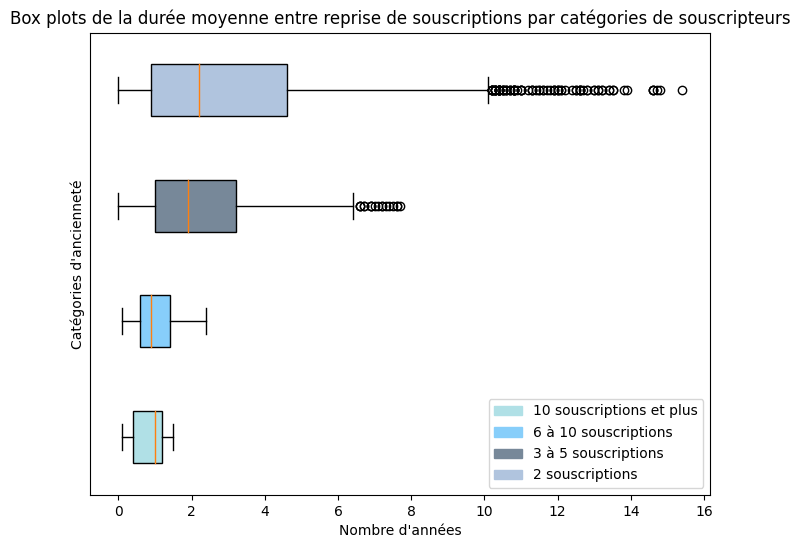

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir la colonne 'Différence' en années
df_diff_mean6['Différence'] = df_diff_mean6['Différence'] / np.timedelta64(1, 'W')
df_diff_mean6 = df_diff_mean6/ 52
df_diff_mean6['Différence'] = df_diff_mean6['Différence'].round(1)

# Créer les groupes pour le boxplot et définir l'ordre souhaité
custom_order = [ '2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus']
grouped_data = df_diff_mean6.groupby('Catégories souscripteurs')['Différence'].apply(list)
grouped_data = grouped_data.reindex(custom_order)

# Inverser l'ordre des données groupées
grouped_data = grouped_data[::-1]

# Créer le boxplot
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)

# Récupérer les étiquettes de catégories dans l'ordre personnalisé
categories = grouped_data.index

# Couleurs personnalisées pour chaque boîte
custom_colors =  ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes et création de la légende
for box, color, category in zip(boxes['boxes'], custom_colors, categories):
    box.set_facecolor(color)

# Titre et étiquette des axes
plt.title("Box plots de la durée moyenne entre reprise de souscriptions par catégories de souscripteurs")
plt.xlabel("Nombre d'années")
plt.ylabel("Catégories d'ancienneté")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)

# Afficher le boxplot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Compter le nombre de personnes par catégorie de souscripteur
df_retraitMS = df_diff_mean6['Catégories souscripteurs'].value_counts().to_frame().reset_index()

# Renommer les colonnes
df_retraitMS.columns = ['Catégories souscripteurs', "Nombre d'individus"]

# Calculer la moyenne, Q1, Q3 et les whiskers de la variable "Durée actionnariat" pour chaque catégorie
df_stats = df_diff_mean6.groupby('Catégories souscripteurs')['Différence'].agg(['median', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))]).reset_index()

# Renommer les colonnes de statistiques
df_stats.columns = ['Catégories souscripteurs', 'Médiane Durée conservation', 'Q1', 'Q3', 'Upper Whiskers']

# Calculer le nombre d'outliers pour chaque catégorie
df_outliers = df_diff_mean6.groupby('Catégories souscripteurs')['Différence'].apply(lambda x: np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))).reset_index()
df_outliers.columns = ['Catégories souscripteurs', 'Nombre d\'outliers']

# Fusionner les DataFrames pour ajouter les statistiques et le nombre d'outliers
df_retraitMS = pd.merge(df_retraitMS, df_stats, on='Catégories souscripteurs')
df_retraitMS = pd.merge(df_retraitMS, df_outliers, on='Catégories souscripteurs')
df_retraitMS.rename(columns={'Médiane Durée conservation': 'Médiane'}, inplace=True)

# Afficher le résultat
df_retraitMS

Catégories souscripteurs  Nombre d'individus  Médiane   Q1   Q3   
0           2 souscriptions                2370      2.2  0.9  4.6  \
1       3 à 5 souscriptions                1050      1.9  1.0  3.2   
2      6 à 10 souscriptions                  73      0.9  0.6  1.4   
3  10 souscriptions et plus                  21      1.0  0.4  1.2   

   Upper Whiskers  Nombre d'outliers  
0           10.15                 89  
1            6.50                 18  
2            2.60                  0  
3            2.40                  0

In [ ]:
from IPython.display import display, Markdown, HTML

display(HTML('<center><h2><u>Evolution des intervalles de durée entre les différents rangs de reprises de souscriptions (en année)</u></h2></center>'))

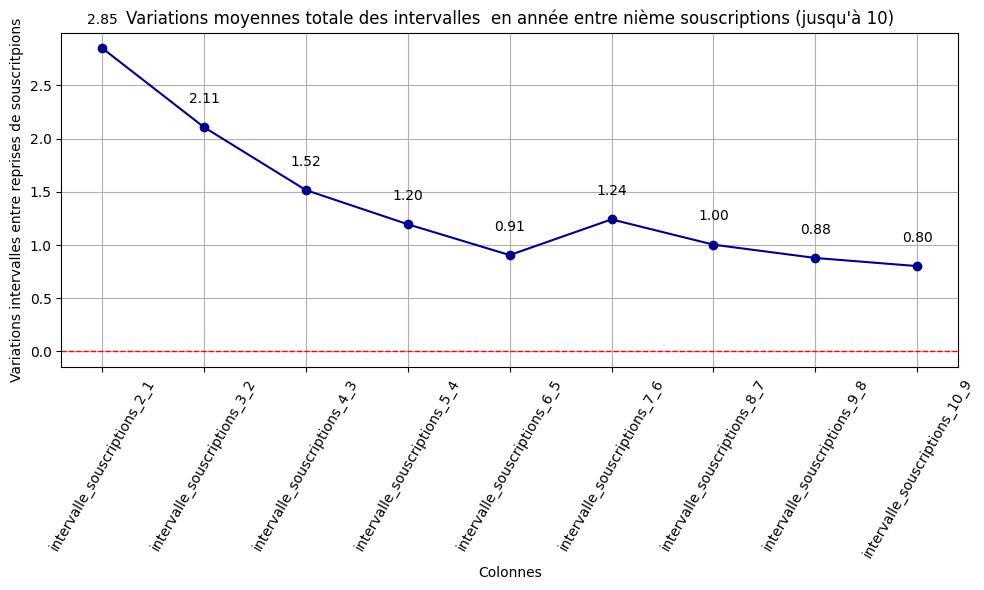

In [ ]:
df_var_tps_reprise = df_var_tps_reprise[df_var_tps_reprise["Nature du mouvement"] == "Souscription"]
df_var_tps_reprise['Date du Mouvement'] = pd.to_datetime(df_var_tps_reprise['Date du Mouvement'])
df_var_tps_reprise = df_var_tps_reprise[['ID du contact', 'Date du Mouvement']]
df_var_tps_reprise['nb souscriptions'] = df_var_tps_reprise['ID du contact'].map(df_var_tps_reprise ['ID du contact'].value_counts())
df_var_tps_reprise = df_var_tps_reprise.sort_values(by=['ID du contact', 'Date du Mouvement'])
df_var_tps_reprise = df_var_tps_reprise[(df_var_tps_reprise["nb souscriptions"] <= 10) & (df_var_tps_reprise["nb souscriptions"] > 1)]
df_var_tps_reprise = pd.pivot_table(df_var_tps_reprise, index='ID du contact', columns=df_var_tps_reprise.groupby('ID du contact').cumcount() + 1,
values=["Date du Mouvement"],
aggfunc='first')
df_var_tps_reprise.columns = [f'{col[0]}_{col[1]}' for col in df_var_tps_reprise.columns]
df_var_tps_reprise.reset_index(inplace=True)
# Créer les colonnes de différences de nombres d'actions
for i in range(2, 11):
    df_var_tps_reprise[f'intervalle_souscriptions_{i}_{i-1}'] = df_var_tps_reprise[f'Date du Mouvement_{i}'] - df_var_tps_reprise[f'Date du Mouvement_{i-1}']

# Liste des colonnes d'intervalle à convertir
colonnes_intervalle = [f'intervalle_souscriptions_{i}_{i-1}' for i in range(2, 11)]

# Convertir les intervalles en années
for colonne in colonnes_intervalle:
    df_var_tps_reprise[colonne] = df_var_tps_reprise[colonne].apply(lambda x: np.nan if pd.isnull(x) else x.total_seconds() / 31536000)  # 31,536,000 secondes dans une année
# Supprimer les colonnes du tableau

colonnes_a_supprimer = [
    f"Date du Mouvement_{i}" for i in range(1, 11)
]

# calculer les variations moyenne par colonnes 
df_var_tps_reprise.drop(colonnes_a_supprimer, axis=1, inplace=True)
intervalles = df_var_tps_reprise.drop(columns='ID du contact').mean(skipna=True).to_frame()
import matplotlib.pyplot as plt

# Données pour l'axe x (colonnes)
colonnes = intervalles.index

# Données pour l'axe y (moyennes)
moyennes_values = intervalles.values

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(colonnes, moyennes_values, marker='o', linestyle='-', color='darkblue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Ligne du 0 en rouge
plt.xlabel('Colonnes')
plt.ylabel('Variations intervalles entre reprises de souscritpions')
plt.title('Variations moyennes totale des intervalles  en année entre nième souscriptions (jusqu\'à 10)')
plt.xticks(rotation=60)
plt.grid(True)

# Annoter chaque point avec sa valeur
for i, txt in enumerate(moyennes_values):
    plt.text(colonnes[i], txt[0] + 0.2, f'{txt[0]:.2f}', ha='center', va='bottom', color='black', fontweight='normal')


# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import display, Markdown, HTML
display(HTML("<div style='page-break-before: always;'></div>"))

display(HTML('<center><h2><u>Part des rachats parmi les catégories de souscripteurs (mono ou multi-souscripteurs)</u></h2></center>'))

In [ ]:
from IPython.display import display, Markdown, HTML

display(HTML('<h3>Effectifs croisés des personnes ayant fait un rachat parmi les mono et multi-souscripteurs</h3>'))

In [ ]:
twenty4_months_ago = datetime.now() - timedelta(days=730)
df_partrachat['RFM-Date Dernier Don'] = pd.to_datetime(df_partrachat['RFM-Date Dernier Don'], format='%d/%m/%Y')
df_partrachat.loc[:, "multi-casquette ?"] = df_partrachat.apply(lambda row: "Actionnaire-donateur" if row["Actionnaire ?"] == 1 and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)  and row["adhérent N"] == 0 and row['adhérent N-1'] == 0
                                            else "Actionnaire-adhérent" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and row["Donateur N"] == 0 and row['RFM-Date Dernier Don'] < twenty4_months_ago
                                            else "Triple-engagement" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)
                                            else "Actionnaire uniquement", axis=1)

conditions = [
    (df_partrachat['âge'] < 25),
    (df_partrachat['âge'] < 40),
    (df_partrachat['âge'] < 60)
]

choices = ['0-25 ans', '25-40 ans', '40-60 ans']

df_partrachat['catégories âge'] = np.select(conditions, choices, default='60 ans et plus')


df_partrachat['RFM-Date Première Souscription'] = pd.to_datetime(df_partrachat['RFM-Date Première Souscription'], dayfirst=True)

conditions = [
    (df_partrachat['RFM-Date Première Souscription'] <= pd.to_datetime('2012')),
    (df_partrachat['RFM-Date Première Souscription'] <= pd.to_datetime('2017'))
]

choices = ['Nouvel actionnaire en 2012 ou moins', 'Nouvel actionnaire entre 2012 à 2017']

df_partrachat['ancienneté actionnaires'] = np.select(conditions, choices, default='Nouvel actionnaire depuis 2017 ou plus')
df_partrachat['RFM-Date Première Souscription'] = df_partrachat['RFM-Date Première Souscription'].astype(str)
df_partrachatrep = df_partrachat.groupby(['ID du contact', 'Nature du mouvement']).size().reset_index(name='Nombre d\'interactions')
df_partrachatrep['multi-souscripteurs ?'] = df_partrachatrep.groupby('ID du contact')['Nature du mouvement'].transform(lambda x: (x == 'Souscription').any()) & (df_partrachatrep.groupby('ID du contact')['Nombre d\'interactions'].transform(lambda x: (x > 1).any()))
df_partrachatrep['Rachat ?'] = df_partrachatrep.groupby('ID du contact')['Nature du mouvement'].transform(lambda x: (x == 'Rachat').any()) 
df_partrachatrep = df_partrachatrep.drop_duplicates(subset = "ID du contact")
df_partrachatrep["multi-souscripteurs ?"] = df_partrachatrep["multi-souscripteurs ?"].replace({True: "Multi-souscripteurs", False: "Mono-souscripteurs"})
df_partrachatrep["Rachat ?"] = df_partrachatrep["Rachat ?"].replace({True: "Ont fait un rachat", False: "Pas de rachat"})
df_partrachatrep = pd.crosstab(index=df_partrachatrep['multi-souscripteurs ?'], columns=df_partrachatrep['Rachat ?'], margins=True, margins_name='Total')
df_partrachatrep 

Rachat ?               Ont fait un rachat  Pas de rachat  Total
multi-souscripteurs ?                                          
Mono-souscripteurs                   1717           5831   7548
Multi-souscripteurs                   780           3462   4242
Total                                2497           9293  11790

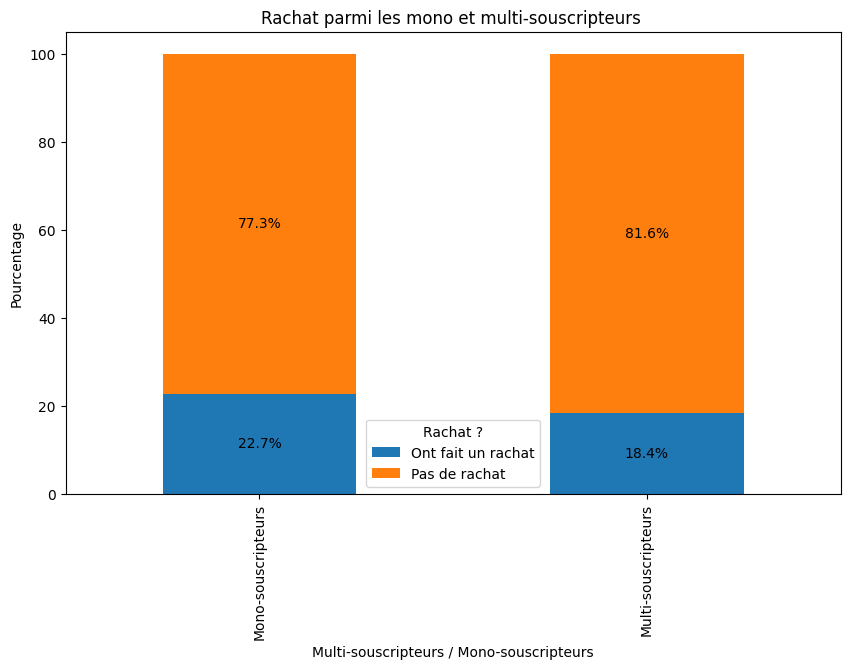

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous avez déjà créé votre table croisée df_partrachatrep

# Calculez les pourcentages pour chaque catégorie de "Rachat ?"
df_percentage = df_partrachatrep.div(df_partrachatrep['Total'], axis=0) * 100

# Créez un graphique en barres empilées à 100 %
ax = df_percentage.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajoutez des étiquettes et un titre
plt.xlabel('Multi-souscripteurs / Mono-souscripteurs')
plt.ylabel('Pourcentage')
plt.title('Rachat parmi les mono et multi-souscripteurs ')

# Affichez les étiquettes de pourcentage pour chaque segment empilé
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

# Affichez la légende
plt.legend(title='Rachat ?')

# Affichez le graphique
plt.show()



In [ ]:
from IPython.display import display, Markdown, HTML
display(HTML("<div style='page-break-before: always;'></div>"))

display(HTML('<center><h2><u>Durées moyennes entre interactions sur un contrat (concerne les personnes ayant fait des rachats d\'actions)</u></h2></center>'))


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>On calcule l'écart entre la date de début du contrat et la date de rachat d'actions. On fait ensuite une moyenne individuelle de ces écarts</h3>"))

In [ ]:
df.loc[:, "multi-casquette ?"] = df.apply(lambda row: "Actionnaire-donateur" if row["Actionnaire ?"] == 1 and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)  and row["adhérent N"] == 0 and row['adhérent N-1'] == 0
                                            else "Actionnaire-adhérent" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and row["Donateur N"] == 0 and row['RFM-Date Dernier Don'] < twenty4_months_ago
                                            else "Triple-engagement" if row["Actionnaire ?"] == 1 and (row["adhérent N"] == 1 or row['adhérent N-1'] == 1) and (row["Donateur N"] == 1 or row['RFM-Date Dernier Don'] >= twenty4_months_ago)
                                            else "Actionnaire uniquement", axis=1)
df_durée_conserv = df[df["Nature du mouvement"] == "Rachat"]
df_durée_conservtest = df[(df["Nature du mouvement"] == "Rachat") & (df["multi-casquette ?"] == "Actionnaire-adhérent")]

In [ ]:
from datetime import datetime, timedelta
df_durée_conserv = df_durée_conserv.groupby("ID du contact")["durée conservation"].mean().to_frame().reset_index()
df_durée_conserv = df_durée_conserv.merge(df2[["ID du contact",'Catégories souscripteurs','multi-souscripteur ?','ancienneté actionnaires','catégories âge',"multi-casquette ?"]], on='ID du contact', how='left')
df_durée_conserv = df_durée_conserv.drop_duplicates(subset = "ID du contact")
df_durée_conserv['multi-souscripteur ?'] = df_durée_conserv['multi-souscripteur ?'].replace({True: "multi-souscripteurs", False: "souscripteurs uniques"})
df_durée_conserv = df_durée_conserv.drop(df_durée_conserv[df_durée_conserv["durée conservation"] < timedelta(days=0)].index)

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne totale entre interactions sur un contrats </h3>"))

In [ ]:
moyenne_jours = df_durée_conserv['durée conservation'].mean().days
moyenne_annees = moyenne_jours / 365.25
print(f"Moyenne des intervalles entre interractions : {moyenne_annees:.2f} années")

Moyenne des intervalles entre interractions : 6.92 années


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Depuis la date d'activation d'un de leurs contrats de souscription, les souscripteurs ont en moyenne attendu 6, 52 années avant de racheter des actions sur ces mêmes contrats</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne entre interactions sur un contrats  par catégories du souscripteurs</h3>"))

In [ ]:

count_per_category = df_durée_conserv.groupby('Catégories souscripteurs').size().reset_index(name='Nombre de personnes')
df_durée_conserv_mean_catsous= df_durée_conserv.groupby('Catégories souscripteurs')["durée conservation"].mean().dt.total_seconds() / (365.25 * 24 * 60 * 60)
df_durée_conserv_mean_catsous = df_durée_conserv_mean_catsous.round(1).to_frame(name="Moyenne des intervalles entre interraction  (années)")
df_durée_conserv_mean_catsous = df_durée_conserv_mean_catsous.merge(count_per_category, on='Catégories souscripteurs', how='left')
ordre_categories_souscripteurs = ['1 souscription', '2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus']
df_durée_conserv_mean_catsous = df_durée_conserv_mean_catsous.set_index('Catégories souscripteurs').loc[ordre_categories_souscripteurs].reset_index()
df_durée_conserv_mean_catsous

Catégories souscripteurs   
0            1 souscription  \
1           2 souscriptions   
2       3 à 5 souscriptions   
3      6 à 10 souscriptions   
4  10 souscriptions et plus   

   Moyenne des intervalles entre interraction  (années)  Nombre de personnes  
0                                                7.1                     656  
1                                                6.5                     331  
2                                                6.5                     141  
3                                                6.9                      49  
4                                                5.5                       7

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne entre interactions sur un contrats  par ancienneté de l'actionnaire</h3>"))

In [ ]:
ordre_categories_ancienneté = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']


count_per_category = df_durée_conserv.groupby('ancienneté actionnaires').size().reset_index(name='Nombre de personnes')
df_durée_conserv_mean_ancienneté = df_durée_conserv.groupby("ancienneté actionnaires")["durée conservation"].mean().dt.total_seconds() / (365.25 * 24 * 60 * 60)
df_durée_conserv_mean_ancienneté = df_durée_conserv_mean_ancienneté.round(1).to_frame(name="Moyenne des intervalles entre interractions  (années)")
df_durée_conserv_mean_ancienneté = df_durée_conserv_mean_ancienneté.merge(count_per_category, on='ancienneté actionnaires', how='left')
df_durée_conserv_mean_ancienneté= df_durée_conserv_mean_ancienneté.reindex(ordre_categories_ancienneté)



In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne entre interactions sur un contrat par catégories d'âge </h3>"))

In [ ]:
count_per_category = df_durée_conserv.groupby('catégories âge').size().reset_index(name='Nombre de personnes')
df_durée_conserv_mean_age= df_durée_conserv.groupby('catégories âge')["durée conservation"].mean().dt.total_seconds() / (365.25 * 24 * 60 * 60)
df_durée_conserv_mean_age = df_durée_conserv_mean_age.round(1).to_frame(name="Moyenne des intervalles entre interactions  (années)")
df_durée_conserv_mean_age = df_durée_conserv_mean_age.merge(count_per_category, on='catégories âge', how='left')
df_durée_conserv_mean_age

catégories âge  Moyenne des intervalles entre interactions  (années)   
0        0-25 ans                                                6.9     \
1       25-40 ans                                                6.7      
2       40-60 ans                                                7.0      
3  60 ans et plus                                                6.8      

   Nombre de personnes  
0                  314  
1                  199  
2                  264  
3                  407

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne entre interactions sur un contrat par multi-casquettes ? </h3>"))

In [ ]:
count_per_category = df_durée_conserv.groupby('multi-casquette ?').size().reset_index(name='Nombre de personnes')
df_durée_conserv_mean_MC= df_durée_conserv.groupby('multi-casquette ?')["durée conservation"].mean().dt.total_seconds() / (365.25 * 24 * 60 * 60)
df_durée_conserv_mean_MC = df_durée_conserv_mean_MC.round(1).to_frame(name="Moyenne des intervalles entre interactions  (années)")
df_durée_conserv_mean_MC = df_durée_conserv_mean_MC.merge(count_per_category, on='multi-casquette ?', how='left')
df_durée_conserv_mean_MC

multi-casquette ?   
0  Actionnaire uniquement  \
1    Actionnaire-adhérent   
2    Actionnaire-donateur   
3       Triple-engagement   

   Moyenne des intervalles entre interactions  (années)  Nombre de personnes  
0                                                7.1                     264  
1                                                6.7                     349  
2                                                6.7                     156  
3                                                6.9                     415

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Durée moyenne entre interactions sur un contrat par multi-souscripteurs ? </h3>"))

In [ ]:
count_per_category = df_durée_conserv.groupby('multi-souscripteur ?').size().reset_index(name='Nombre de personnes')
df_durée_conserv_mean_MS= df_durée_conserv.groupby('multi-souscripteur ?')["durée conservation"].mean().dt.total_seconds() / (365.25 * 24 * 60 * 60)
df_durée_conserv_mean_MS = df_durée_conserv_mean_MS.round(1).to_frame(name="Moyenne des intervalles entre interactions  (années)")
df_durée_conserv_mean_MS = df_durée_conserv_mean_MS.merge(count_per_category, on='multi-souscripteur ?', how='left')
df_durée_conserv_mean_MS

multi-souscripteur ?   
0    multi-souscripteurs  \
1  souscripteurs uniques   

   Moyenne des intervalles entre interactions  (années)  Nombre de personnes  
0                                                6.6                     528  
1                                                7.1                     656

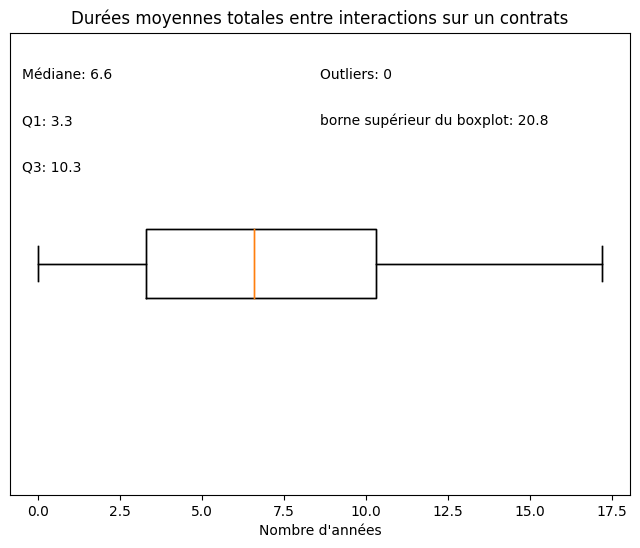

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df_durée_conserv['durée conservation'] = df_durée_conserv['durée conservation'] / np.timedelta64(1, 'W')
df_durée_conserv = df_durée_conserv/ 52
df_durée_conserv['durée conservation'] = df_durée_conserv['durée conservation'].round(1)
# Calculer la médiane, Q1 et Q3
median = np.median(df_durée_conserv['durée conservation'])
q1 = np.percentile(df_durée_conserv['durée conservation'], 25)
q3 = np.percentile(df_durée_conserv['durée conservation'], 75)

# Calculer les limites inférieures et supérieures des whiskers
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
upper_whisker = upper_whisker.round(1)
# Créer le box plot horizontalement
plt.figure(figsize=(8, 6))
plt.boxplot(df_durée_conserv['durée conservation'], vert=False)

# Calculer le nombre d'outliers
whiskers = plt.boxplot(df_durée_conserv['durée conservation'], vert=False)['fliers']
num_outliers = len(whiskers[0].get_data()[0])

# Ajouter les valeurs de la médiane, Q1, Q3, limites des whiskers au graphique
plt.text(0.02, 0.9, f"Médiane: {median}", transform=plt.gca().transAxes)
plt.text(0.02, 0.8, f"Q1: {q1}", transform=plt.gca().transAxes)
plt.text(0.02, 0.7, f"Q3: {q3}", transform=plt.gca().transAxes)
plt.text(0.5, 0.8, f"borne supérieur du boxplot: {upper_whisker}", transform=plt.gca().transAxes)
plt.text(0.5, 0.9, f"Outliers: {num_outliers}", transform=plt.gca().transAxes)

# Titre et étiquette de l'axe y
plt.title("Durées moyennes totales entre interactions sur un contrats")
plt.xlabel("Nombre d'années")
plt.ylabel("")
plt.yticks([])
# Afficher le box plot
plt.show()

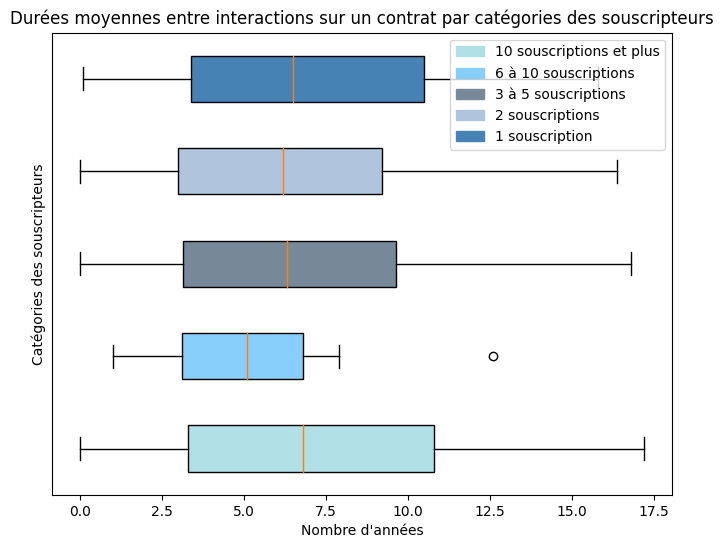

In [ ]:

# Créer les groupes pour le boxplot et inverser l'ordre des données
grouped_data = df_durée_conserv.groupby('Catégories souscripteurs')['durée conservation'].apply(list)

# Créer le boxplot en inversant l'ordre des positions
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)
custom_order = ['10 souscriptions et plus', '6 à 10 souscriptions', '3 à 5 souscriptions', '2 souscriptions', '1 souscription']
grouped_data = grouped_data.reindex(custom_order)
# Récupérer les étiquettes de catégories
categories = grouped_data.index
# Couleurs personnalisées pour chaque boîte
custom_colors = ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']



# Attribution des couleurs aux boîtes
for box, color in zip(boxes['boxes'], custom_colors):
    box.set_facecolor(color)

# Titre et étiquette des axes
plt.title("Durées moyennes entre interactions sur un contrat par catégories des souscripteurs")
plt.xlabel("Nombre d'années")
plt.ylabel("Catégories des souscripteurs")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)

# Afficher le boxplot
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Compter le nombre de personnes par catégorie de souscripteur
df_retraitMS = df_durée_conserv['Catégories souscripteurs'].value_counts().to_frame().reset_index()

# Renommer les colonnes
df_retraitMS.columns = ['Catégories souscripteurs', "Nombre d'individus"]

# Calculer la moyenne, Q1, Q3 et les whiskers de la variable "Durée actionnariat" pour chaque catégorie
df_stats = df_durée_conserv.groupby('Catégories souscripteurs')['durée conservation'].agg(['median', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))]).reset_index()

# Renommer les colonnes de statistiques
df_stats.columns = ['Catégories souscripteurs', 'Médiane Durée conservation', 'Q1', 'Q3', 'Upper Whiskers']

# Calculer le nombre d'outliers pour chaque catégorie
df_outliers = df_durée_conserv.groupby('Catégories souscripteurs')['durée conservation'].apply(lambda x: np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))).reset_index()
df_outliers.columns = ['Catégories souscripteurs', 'Nombre d\'outliers']

# Fusionner les DataFrames pour ajouter les statistiques et le nombre d'outliers
df_retraitMS = pd.merge(df_retraitMS, df_stats, on='Catégories souscripteurs')
df_retraitMS = pd.merge(df_retraitMS, df_outliers, on='Catégories souscripteurs')

# Afficher le résultat
df_retraitMS


Catégories souscripteurs  Nombre d'individus  Médiane Durée conservation   
0            1 souscription                 656                         6.8  \
1           2 souscriptions                 331                         6.3   
2       3 à 5 souscriptions                 141                         6.2   
3      6 à 10 souscriptions                  49                         6.5   
4  10 souscriptions et plus                   7                         5.1   

     Q1     Q3  Upper Whiskers  Nombre d'outliers  
0  3.30  10.80           22.05                  0  
1  3.15   9.65           19.40                  0  
2  3.00   9.20           18.50                  0  
3  3.40  10.50           21.15                  0  
4  3.10   6.80           12.35                  1

In [ ]:
# Créer les groupes pour le boxplot et inverser l'ordre des données
grouped_data = df_durée_conserv.groupby('catégories âge')['durée conservation'].apply(list)
custom_order = ['60 ans et plus', '40-60 ans', '25-40 ans', '0-25 ans']
grouped_data = grouped_data.reindex(custom_order)
# Créer le boxplot en inversant l'ordre des positions
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)


# Récupérer les étiquettes de catégories
categories = grouped_data.index

# Couleurs personnalisées pour chaque boîte
custom_colors = ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes
for box, color in zip(boxes['boxes'], custom_colors):
    box.set_facecolor(color)

# Titre et étiquette des axes
plt.title("Durées moyennes entre interactions sur un contrat par catégories d'âges")
plt.xlabel("Nombre d'années")
plt.ylabel("Catégories d'âges")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)

# Afficher le boxplot
plt.show()

In [ ]:
# Créer les groupes pour le boxplot et inverser l'ordre des données

custom_order = ['0-25 ans', '25-40 ans', '40-60 ans', '60 ans et plus']

grouped_data = grouped_data.reindex(custom_order)
grouped_data = df_durée_conserv.groupby('catégories âge')['durée conservation'].apply(list)
grouped_data = grouped_data.reindex(custom_order)
# Créer le tableau
df_interactions_age = grouped_data.apply(lambda x: pd.Series({
    'Médiane Durée conservation': np.median(x),
    'Q1': np.percentile(x, 25),
    'Q3': np.percentile(x, 75),
    'Upper Whiskers': np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25)),
    "Nombre d'outliers": np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))
})).reset_index()
df_interactions_age.rename(columns={'catégories âge': 'Catégories d\'âges'}, inplace=True)

df_interactions_age

Catégories d'âges  Médiane Durée conservation    Q1     Q3  Upper Whiskers   
0          0-25 ans                         6.3  3.40  10.40          20.900  \
1         25-40 ans                         6.7  3.15   9.95          20.150   
2         40-60 ans                         6.8  3.40  10.40          20.900   
3    60 ans et plus                         6.5  3.00   9.95          20.375   

   Nombre d'outliers  
0                0.0  
1                0.0  
2                0.0  
3                0.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>La tranche des 25-40 ans rachète plus rapidement leurs actions</h4>"))

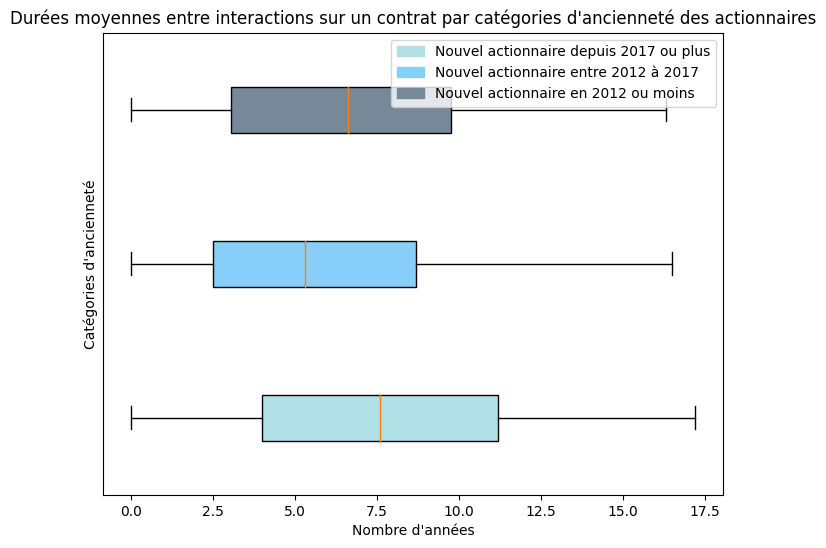

In [ ]:
# Créer les groupes pour le boxplot et inverser l'ordre des données
grouped_data = df_durée_conserv.groupby('ancienneté actionnaires')['durée conservation'].apply(list)

# Créer le boxplot en inversant l'ordre des positions
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)
ordre_categories_ancienneté = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']
grouped_data = grouped_data.reindex(ordre_categories_ancienneté)

# Récupérer les étiquettes de catégories
categories = grouped_data.index

# Calculer les statistiques pour chaque groupe en inversant l'ordre
medians = [np.median(data) for data in grouped_data]
q1s = [np.percentile(data, 25) for data in grouped_data]
q3s = [np.percentile(data, 75) for data in grouped_data]
upper_whiskers = [q3 + 1.5 * (q3 - q1) for q3, q1 in zip(q3s, q1s)]
upper_whiskers = np.round(upper_whiskers, 1)  # Arrondir les valeurs à 2 décimales
num_outliers = [len(box.get_ydata()) for box in boxes['fliers']]

# Couleurs personnalisées pour chaque boîte
custom_colors = ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes
for box, color in zip(boxes['boxes'], custom_colors):
    box.set_facecolor(color)

# Titre et étiquette des axes
plt.title("Durées moyennes entre interactions sur un contrat par catégories d'ancienneté des actionnaires")
plt.xlabel("Nombre d'années")
plt.ylabel("Catégories d'ancienneté")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)


# Afficher le boxplot
plt.show()

In [ ]:
custom_order = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']

# Réorganiser les indices du groupe grouped_data
grouped_data = grouped_data.reindex(custom_order)

# Créer le tableau
df_interaction_ancienneté = grouped_data.apply(lambda x: pd.Series({
    'Médiane Durée conservation': np.median(x),
    'Q1': np.percentile(x, 25),
    'Q3': np.percentile(x, 75),
    'Upper Whiskers': np.percentile(x, 75) + 1.5 * (np.percentile(x, 75) - np.percentile(x, 25)),
    "Nombre d'outliers": np.sum((x < np.percentile(x, 25) - 1.5 * (np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5 * (np.percentile(x, 75) - np.percentile(x, 25))))
})).reset_index()
df_interaction_ancienneté.rename(columns={'ancienneté actionnaires': 'Catégories d\'ancienneté'}, inplace=True)

df_interaction_ancienneté

Catégories d'ancienneté  Médiane Durée conservation    Q1   
0  Nouvel actionnaire depuis 2017 ou plus                         7.6  4.00  \
1    Nouvel actionnaire entre 2012 à 2017                         6.6  3.05   
2     Nouvel actionnaire en 2012 ou moins                         5.3  2.50   

      Q3  Upper Whiskers  Nombre d'outliers  
0  11.20            22.0                0.0  
1   9.75            19.8                0.0  
2   8.70            18.0                0.0

In [ ]:
# Créer les groupes pour le boxplot et inverser l'ordre des données
grouped_data = df_durée_conserv.groupby('multi-casquette ?')['durée conservation'].apply(list)

# Créer le boxplot en inversant l'ordre des positions
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)

# Récupérer les étiquettes de catégories
categories = grouped_data.index

# Couleurs personnalisées pour chaque boîte
custom_colors = ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes
for box, color in zip(boxes['boxes'], custom_colors):
    box.set_facecolor(color)


# Titre et étiquette des axes
plt.title("Durées moyennes entre interactions sur un contrat par catégories de multi-engagment")
plt.xlabel("Nombre d'années")
plt.ylabel("Catégories de multi-engagement")
plt.yticks([])


# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)


# Afficher le boxplot
plt.show()

In [ ]:
# Créer le tableau de statistiques
df_interaction_multicasquette = grouped_data.apply(lambda x: pd.Series({
    'Médiane Durée conservation': np.median(x),
    'Q1': np.percentile(x, 25),
    'Q3': np.percentile(x, 75),
    'Upper Whiskers': np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25)),
    "Nombre d'outliers": np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))
})).reset_index()
df_interaction_multicasquette.rename(columns={'multi-casquette ?': 'Catégories de multi-engagement'}, inplace=True)
df_interaction_multicasquette = df_interaction_multicasquette.iloc[::-1].reset_index(drop=True)
df_interaction_multicasquette

Catégories de multi-engagement  Médiane Durée conservation    Q1      Q3   
0              Triple-engagement                         6.7  3.35  10.100  \
1           Actionnaire-donateur                         6.4  3.40   9.800   
2           Actionnaire-adhérent                         6.3  2.70  10.200   
3         Actionnaire uniquement                         6.6  3.70  10.825   

   Upper Whiskers  Nombre d'outliers  
0         20.2250                0.0  
1         19.4000                0.0  
2         21.4500                0.0  
3         21.5125                0.0

In [ ]:
from IPython.display import display, HTML
display(HTML("<div style='page-break-before: always;'></div>"))


# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Retrait partiel ou total des actions sur un contrat ?</u></h2></center>'))


In [ ]:
df.loc[:, 'multi-souscripteur ?'] = df.duplicated(subset='ID du contact', keep=False)
df_durée_conserv = df[df["Nature du mouvement"]== "Rachat"]

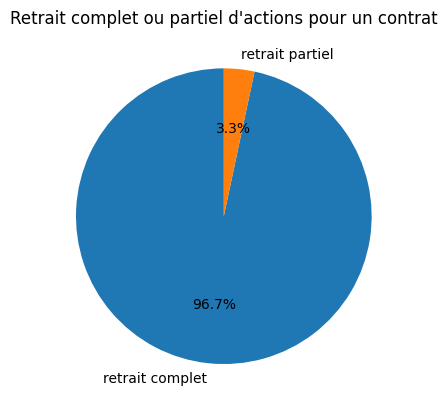

In [ ]:
import matplotlib.pyplot as plt

# Calculer les valeurs et les étiquettes pour le pie chart
counts = df['retrait complet ou partiel'].value_counts()
percentages = counts / counts.sum() * 100

# Créer le pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Retrait complet ou partiel d'actions pour un contrat")



# Afficher le graphique
plt.show()

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Retrait total ou partiels des actions sur les contrats par multi-souscripteur ?</h3>"))

In [ ]:
df_retrait_MS = pd.crosstab(index=df_durée_conserv['retrait complet ou partiel'], columns=df_durée_conserv["multi-souscripteur ?"], margins=True, margins_name='Total')
df_col_percent = df_retrait_MS.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum()  # Ajouter la somme des pourcentages dans la dernière ligne
df_col_percent = df_col_percent.drop(columns=True)
df_col_percent

multi-souscripteur ?        False  Total
retrait complet ou partiel              
retrait complet              82.2   83.5
retrait partiel              17.8   16.5
Total                       100.0  100.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Lorsqu'ils ont interagi avec un de leurs contrats pour y racheter des actions, les multi-souscripteurs dans 92,7% des cas ont racheté toutes les actions du contrat (retrait complet) et des les 7,3% dans cas restants n'ont pas racheté toutes les actions du contrats (retrait partiel)</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

display(HTML("<div style='page-break-before: always;'></div>"))
display(HTML("<h2>Part des personnes qui ont re-souscrit la même année après s'être fait remboursé leurs actions rachetées</h2>"))


In [ ]:
dfretraitrepise = dfretraitrepise[["ID du contact", "Nature du mouvement","Date du Mouvement"]]
dfretraitrepise = dfretraitrepise[(dfretraitrepise["Nature du mouvement"] == "Souscription") | (dfretraitrepise["Nature du mouvement"] == "Rachat")]
dfretraitrepise["Date du Mouvement"] = pd.to_datetime(dfretraitrepise["Date du Mouvement"], format='%d/%m/%Y')
dfretraitrepise["Date du Mouvement"] = dfretraitrepise["Date du Mouvement"].dt.year.astype(int)
# Créez une liste des années uniques dans la colonne "Date du Mouvement"
annees_uniques = dfretraitrepise["Date du Mouvement"].unique()

# Créez une liste des natures de mouvement uniques dans la colonne "Nature du mouvement"
natures_uniques = dfretraitrepise["Nature du mouvement"].unique()

# Créez des colonnes de variables binaires pour chaque année et nature de mouvement
for annee in annees_uniques:
    for nature in natures_uniques:
        # Créez une nouvelle colonne avec un nom basé sur l'année et la nature du mouvement
        nom_colonne = f"{nature} {annee}"
        
        # Utilisez np.where pour définir la valeur en fonction de la condition
        dfretraitrepise[nom_colonne] = np.where((dfretraitrepise["Date du Mouvement"] == annee) & (dfretraitrepise["Nature du mouvement"] == nature), True, False)

# Réorganisez les colonnes pour placer "ID du contact", "Nature du mouvement" et "Date du Mouvement" au début
colonnes = ["ID du contact", "Nature du mouvement", "Date du Mouvement"]
colonnes += sorted([colonne for colonne in dfretraitrepise.columns if colonne not in colonnes])

# Sélectionnez et réorganisez les colonnes dans le DataFrame
dfretraitrepise = dfretraitrepise[colonnes]
dfretraitrepise = dfretraitrepise.groupby('ID du contact').max().reset_index()
dfretraitrepise = dfretraitrepise.drop(columns= ["Nature du mouvement", "Date du Mouvement"])
dfretraitrepiseretrait = dfretraitrepise.copy()
# Initialiser une liste vide pour stocker le nombre de reprises après rachat
nombre_de_reprises = []

# Parcourir les lignes du DataFrame
for i in range(len(dfretraitrepise)):
    # Initialisez un compteur pour cette ligne
    compteur = 0
    
    # Parcourir les années de 2006 à 2022
    for annee in range(2006, 2023):
        # Vérifier si "Rachat N" = True et "Souscription N+1" = True
        rachat_colonne = f"Rachat {annee}"
        souscription_colonne = f"Souscription {annee + 1}"
        
        if dfretraitrepise[rachat_colonne][i] == True and dfretraitrepise[souscription_colonne][i] == True:
            compteur += 1
    
    # Ajouter le compteur à la liste des nombres de reprises après rachat
    nombre_de_reprises.append(compteur)

# Ajouter la liste des nombres de reprises après rachat comme colonne au DataFrame
dfretraitrepise["nombre de reprises après rachat"] = nombre_de_reprises


# Créer la colonne "a_resouscrit_juste_apres_avoir_racheté" en utilisant la condition
dfretraitrepise["A resouscrit juste apres avoir racheté"] = dfretraitrepise["nombre de reprises après rachat"] > 0
dfretraitrepise["A resouscrit juste apres avoir racheté"]  = dfretraitrepise["A resouscrit juste apres avoir racheté"].replace({True: "A re-souscrit la même année apres s'être fait rembourser les actions rachetées", False: "N'a pas re-souscrit la même année apres s'être fait rembourser les actions rachetées"})
import matplotlib.pyplot as plt

# Compter les occurrences de chaque valeur unique
value_counts = dfretraitrepise["A resouscrit juste apres avoir racheté"].value_counts()

# Créer un pie chart avec les pourcentages et les valeurs absolues
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)

# Ajouter les valeurs absolues aux étiquettes
for i, (label, count) in enumerate(zip(texts, value_counts)):
    label.set_text(f"{label.get_text()} ({count})")

plt.title("")
plt.axis('equal')  # Assure que le pie chart est un cercle

plt.show()

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Ici, il s'agit de vérifier, lorsque un actionnaire fait un rachat qui est effectif au 31/12/N s'il a re-souscrit l'année N+1 car se sera fait rembourser ses action le 01/01/N+1</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Parmi les personnes ayant effectué un rachat ce sont uniquement 4 % qui ont repris une souscription l'année qui suivait le rachat</h3>"))



In [ ]:
# Sélectionner les lignes où il y a au moins un "True" dans les colonnes "Rachat {année}"
colonnes_rachat = [f"Rachat {annee}" for annee in range(2006, 2024)]
dfretraitrepiseretrait_selection = dfretraitrepiseretrait[dfretraitrepiseretrait[colonnes_rachat].any(axis=1)]
## Initialiser une liste vide pour stocker le nombre de reprises après rachat
nombre_de_reprises = []

# Parcourir les lignes du DataFrame avec iterrows()
for index, row in dfretraitrepiseretrait_selection.iterrows():
    # Initialisez un compteur pour cette ligne
    compteur = 0
    
    # Parcourir les années de 2006 à 2022
    for annee in range(2006, 2023):
        # Vérifier si "Rachat N" = True et "Souscription N+1" = True
        rachat_colonne = f"Rachat {annee}"
        souscription_colonne = f"Souscription {annee + 1}"
        
        if row[rachat_colonne] == True and row[souscription_colonne] == True:
            compteur += 1
    
    # Ajouter le compteur à la liste des nombres de reprises après rachat
    nombre_de_reprises.append(compteur)

# Ajouter la liste des nombres de reprises après rachat comme colonne au DataFrame
dfretraitrepiseretrait_selection["nombre de reprises après rachat"] = nombre_de_reprises


# Créer la colonne "a_resouscrit_juste_apres_avoir_racheté" en utilisant la condition
dfretraitrepiseretrait_selection["A resouscrit juste apres avoir racheté"] = dfretraitrepiseretrait_selection["nombre de reprises après rachat"] > 0
dfretraitrepiseretrait_selection["A resouscrit juste apres avoir racheté"]  = dfretraitrepiseretrait_selection["A resouscrit juste apres avoir racheté"].replace({True: "A re-souscrit la même année apres s'être fait rembourser les actions rachetées", False: "N'a pas re-souscrit la même année apres s'être fait rembourser les actions rachetées"})
import matplotlib.pyplot as plt

# Compter les occurrences de chaque valeur unique
value_counts = dfretraitrepiseretrait_selection["A resouscrit juste apres avoir racheté"].value_counts()

# Créer un pie chart avec les pourcentages et les valeurs absolues
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)

# Ajouter les valeurs absolues aux étiquettes
for i, (label, count) in enumerate(zip(texts, value_counts)):
    label.set_text(f"{label.get_text()} ({count})")

plt.title("")
plt.axis('equal')  # Assure que le pie chart est un cercle

plt.show()

In [ ]:
from IPython.display import display, Markdown, HTML


display(HTML("<h3>Parmi les peronnes qui ont re-souscrit la même année après s'être fait rembourser leurs actions rachetées, combien de fois l'ont ils fait au cours de leur parcours d'actionnaires</h3>"))


In [ ]:
dfretraitrepisetrue = dfretraitrepise[dfretraitrepise["nombre de reprises après rachat"] > 0]
import matplotlib.pyplot as plt

# Compter les occurrences de chaque valeur unique
value_counts = dfretraitrepisetrue["nombre de reprises après rachat"].value_counts()

# Créer un pie chart avec les pourcentages et les valeurs absolues
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)

# Ajouter les valeurs absolues aux étiquettes
for i, (label, count) in enumerate(zip(texts, value_counts)):
    label.set_text(f"{label.get_text()} ({count})")

plt.title("")
plt.axis('equal')  # Assure que le pie chart est un cercle

plt.show()

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Parmi les 0,3% des actionnaires qui ont re-souscrit l'année d'après leur rachat effectif d'ation, il y en a qui l'ont fait plusieurs fois, la majorité la fait qu'une fois</h4>"))

In [ ]:
from IPython.display import display, HTML
display(HTML("<div style='page-break-before: always;'></div>"))


# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Retrait définitif ou retrait partiel</u></h2></center>'))


In [ ]:
df['Nombre de souscriptions'] = df['ID du contact'].map(df2['ID du contact'].value_counts())
conditions = [
     (df['Nombre de souscriptions'] < 2),
     (df['Nombre de souscriptions'] <3),
     (df['Nombre de souscriptions'] <=5),
     (df['Nombre de souscriptions'] <=10)
]

choices = ['1 souscription', "2 souscriptions" , "3 à 5 souscriptions","6 à 10 souscriptions"]

df['Catégories souscripteurs'] = np.select(conditions, choices, default='10 souscriptions et plus')


In [ ]:
import pandas as pd

# Créer une fonction pour vérifier les conditions
def is_retrait_definitif(row):
    same_contact_rows = df[df['ID du contact'] == row['ID du contact']]
    later_rows = same_contact_rows[pd.to_datetime(same_contact_rows['Actions - Date de fin'], format="%d/%m/%Y") > pd.to_datetime(row['Date du Mouvement'])]
    return (row['Nature du mouvement'] == 'Rachat' and
            row['retrait complet ou partiel'] == 'retrait complet' and
            later_rows.empty)

# Appliquer la fonction pour créer la variable conditionnelle
df['nature du retrait'] = df.apply(is_retrait_definitif, axis=1).map({True: 'retrait définitif', False: 'retrait partiel'})


In [ ]:
df_retrait = df[df['Nature du mouvement'] == "Rachat"]
df_retraitcount = df_retrait['nature du retrait'].value_counts().sort_index().to_frame()
df_retraitcount.columns = ['Nombre d\'individus']
df_retraitcount['Pourcentage'] = df_retraitcount['Nombre d\'individus'].div(df_retraitcount['Nombre d\'individus'].sum()) * 100
df_retraitcount



Nombre d'individus  Pourcentage
nature du retrait                                 
retrait définitif                 818    29.562703
retrait partiel                  1949    70.437297

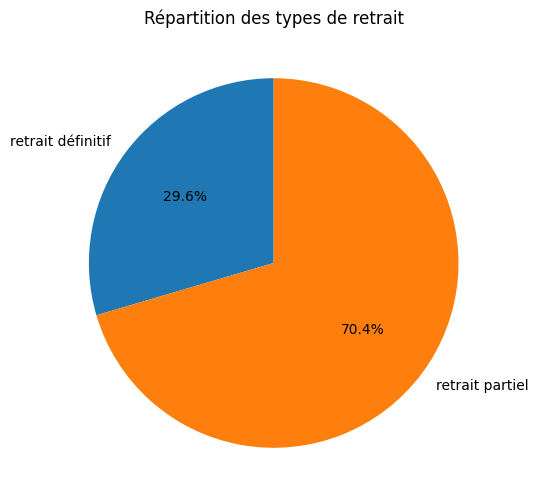

In [ ]:
import matplotlib.pyplot as plt

# Extraire les données du DataFrame
labels = df_retraitcount.index
sizes = df_retraitcount['Pourcentage']

# Créer le pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Ajouter un titre
plt.title("Répartition des types de retrait")

# Afficher le pie chart
plt.show()


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Lorsque les souscripteurs ont interagi avec un de leurs contrats pour y racheter TOUTES SES ACTIONS, dans 66,3 % des cas il s'agissait de leur dernier contrat actif. Ainsi lorsque des contrats sont totalement vidés de leurs actions, dans 66% des cas cela met fin à l'activité d'actionnaire d'une personne (ce sont des ex-actionnaires)</h4>"))

In [ ]:
df_retraitdef = df[df["nature du retrait"] == "retrait définitif"]
df_retraitdef['RFM-Date Première Souscription'] = pd.to_datetime(df_retraitdef['RFM-Date Première Souscription'], format="%Y-%m-%d")
df_retraitdef["Durée actionnariat"] = df_retraitdef['Date du Mouvement'] - df_retraitdef["RFM-Date Première Souscription"]

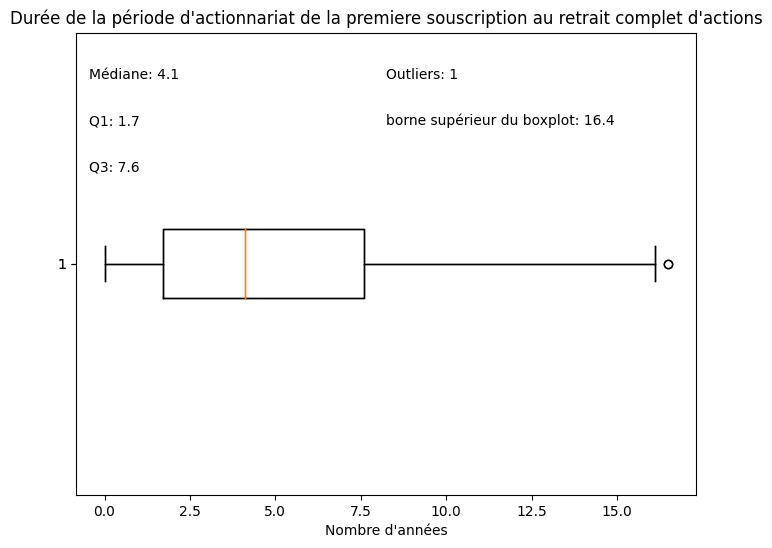

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Supprimer les lignes contenant des NaN dans la colonne "Durée actionnariat"
df_retraitdef = df_retraitdef.dropna(subset=["Durée actionnariat"])

# Réinitialiser l'index après la suppression des lignes
df_retraitdef = df_retraitdef.reset_index(drop=True)


# Diviser par un an en utilisant timedelta
df_retraitdef["Durée actionnariat"] = df_retraitdef["Durée actionnariat"] / pd.to_timedelta(365, unit='D')
df_retraitdef["Durée actionnariat"] = df_retraitdef["Durée actionnariat"].round(1)

# Calculer la médiane, Q1 et Q3
median = np.median(df_retraitdef["Durée actionnariat"])
q1 = np.percentile(df_retraitdef["Durée actionnariat"], 25)
q3 = np.percentile(df_retraitdef["Durée actionnariat"], 75)

# Calculer les limites inférieures et supérieures des whiskers
iqr = q3 - q1
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
upper_whisker = upper_whisker.round(1)

# Créer le box plot horizontalement
plt.figure(figsize=(8, 6))
plt.boxplot(df_retraitdef["Durée actionnariat"], vert=False)

# Calculer le nombre d'outliers
whiskers = plt.boxplot(df_retraitdef["Durée actionnariat"], vert=False)['fliers']
num_outliers = len(whiskers[0].get_data()[0])

# Ajouter les valeurs de la médiane, Q1, Q3, limites des whiskers au graphique
plt.text(0.02, 0.9, f"Médiane: {median}", transform=plt.gca().transAxes)
plt.text(0.02, 0.8, f"Q1: {q1}", transform=plt.gca().transAxes)
plt.text(0.02, 0.7, f"Q3: {q3}", transform=plt.gca().transAxes)
plt.text(0.5, 0.8, f"borne supérieur du boxplot: {upper_whisker}", transform=plt.gca().transAxes)
plt.text(0.5, 0.9, f"Outliers: {num_outliers}", transform=plt.gca().transAxes)

# Titre et étiquette de l'axe y
plt.title("Durée de la période d'actionnariat de la premiere souscription au retrait complet d'actions")
plt.xlabel("Nombre d'années")
plt.ylabel("")

# Afficher le box plot
plt.show()


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Depuis la date de leur entrée dans l'actionnariat, 50 % des souscripteurs attendent 7,7 ans ou moins avant de ne plus être actionnaire. 25 % attendent 5,8 ans ou moins et 25 % attendent 10 ans ou plus soit 75 % qui ont une durée de vie d'actionnaire de moins de 10 ans, (parmi ceux qui ont quitté l'actionnariat). IL y a 0 personnes qui ont un comportement statistiquement ''hors normes''</h4>"))

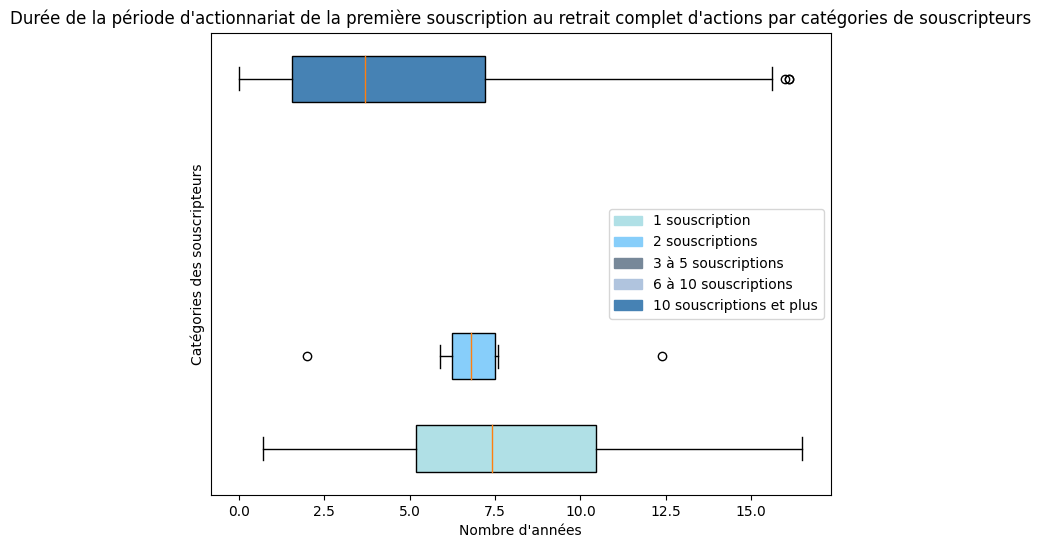

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Créer les groupes pour le boxplot et inverser l'ordre des données
grouped_data = df_retraitdef.groupby('Catégories souscripteurs')['Durée actionnariat'].apply(list)
custom_order = [ '1 souscription','2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus']
grouped_data = grouped_data.reindex(custom_order)



# Créer le boxplot en inversant l'ordre des positions
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)

custom_order = grouped_data.index

# Récupérer les étiquettes de catégories
categories = custom_order
# Couleurs personnalisées pour chaque boîte
custom_colors = ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes
for box, color in zip(boxes['boxes'], custom_colors):
    box.set_facecolor(color)

# Titre et étiquette des axes
plt.title("Durée de la période d'actionnariat de la première souscription au retrait complet d'actions par catégories de souscripteurs")
plt.xlabel("Nombre d'années")
plt.ylabel("Catégories des souscripteurs")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)

# Afficher le boxplot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Compter le nombre de personnes par catégorie de souscripteur
df_retraitMS = df_retraitdef['Catégories souscripteurs'].value_counts().to_frame().reset_index()

# Renommer les colonnes
df_retraitMS.columns = ['Catégories souscripteurs', "Nombre d'individus"]

# Calculer la moyenne, Q1, Q3 et les whiskers de la variable "Durée actionnariat" pour chaque catégorie
df_stats = df_retraitdef.groupby('Catégories souscripteurs')['Durée actionnariat'].agg(['median', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75), lambda x: np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))]).reset_index()

# Renommer les colonnes de statistiques
df_stats.columns = ['Catégories souscripteurs', 'Médiane Durée actionnariat', 'Q1', 'Q3', 'Upper Whiskers']

# Calculer le nombre d'outliers pour chaque catégorie
df_outliers = df_retraitdef.groupby('Catégories souscripteurs')['Durée actionnariat'].apply(lambda x: np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))).reset_index()
df_outliers.columns = ['Catégories souscripteurs', 'Nombre d\'outliers']

# Fusionner les DataFrames pour ajouter les statistiques et le nombre d'outliers
df_retraitMS = pd.merge(df_retraitMS, df_stats, on='Catégories souscripteurs')
df_retraitMS = pd.merge(df_retraitMS, df_outliers, on='Catégories souscripteurs')

# Classer le tableau par ordre croissant des médianes
df_retraitMS = df_retraitMS.sort_values(by='Médiane Durée actionnariat')
ordre_categories_souscripteurs = ['1 souscription', '2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus']

# Ajouter une colonne pour définir l'ordre souhaité
df_retraitMS['ordre'] = df_retraitMS['Catégories souscripteurs'].apply(lambda x: ordre_categories_souscripteurs.index(x))

# Trier le DataFrame en fonction de la colonne "ordre"
df_retraitMS = df_retraitMS.sort_values('ordre')

# Supprimer la colonne "ordre"
df_retraitMS = df_retraitMS.drop('ordre', axis=1)

# Réinitialiser les index
df_retraitMS.reset_index(drop=True, inplace=True)

df_retraitMS

Catégories souscripteurs  Nombre d'individus  Médiane Durée actionnariat   
0            1 souscription                  84                         7.4  \
1           2 souscriptions                   7                         6.8   
2  10 souscriptions et plus                 727                         3.7   

      Q1     Q3  Upper Whiskers  Nombre d'outliers  
0  5.175  10.45         18.3625                  0  
1  6.250   7.50          9.3750                  2  
2  1.550   7.20         15.6750                  3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Créer les groupes pour le boxplot et inverser l'ordre des données
grouped_data = df_retraitdef.groupby('ancienneté actionnaires')['Durée actionnariat'].apply(list)
ordre_categories_ancienneté = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']
grouped_data = grouped_data.reindex(ordre_categories_ancienneté)

# Créer le boxplot en inversant l'ordre des positions
plt.figure(figsize=(8, 6))
boxes = plt.boxplot(grouped_data, vert=False, patch_artist=True)

custom_order = grouped_data.index

# Récupérer les étiquettes de catégories
categories = custom_order
# Couleurs personnalisées pour chaque boîte
custom_colors = ['powderblue', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'steelblue']

# Attribution des couleurs aux boîtes
for box, color in zip(boxes['boxes'], custom_colors):
    box.set_facecolor(color)

# Titre et étiquette des axes
plt.title("Durée de la période d'actionnariat de la premiere souscription au retrait complet d'actions par catégories d'ancienneté des actionnaires")
plt.xlabel("Nombre d'années")
plt.ylabel("Catégories d'ancienneté")
plt.yticks([])

# Création de la légende en utilisant des proxies (éléments de la légende sans affichage réel)
legend_proxies = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_colors]
plt.legend(legend_proxies, categories)

# Afficher le boxplot
plt.show()


In [ ]:

# Créer le tableau de statistiques
df_stats = grouped_data.apply(lambda x: pd.Series({
    'Médiane Durée actionnariat': np.median(x),
    'Q1': np.percentile(x, 25),
    'Q3': np.percentile(x, 75),
    'Upper Whiskers': np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25)),
    "Nombre d'outliers": np.sum((x < np.percentile(x, 25) - 1.5*(np.percentile(x, 75) - np.percentile(x, 25))) | (x > np.percentile(x, 75) + 1.5*(np.percentile(x, 75) - np.percentile(x, 25))))
})).reset_index()
df_stats.rename(columns={'ancienneté actionnaires': 'Catégories d\'ancienneté'}, inplace=True)
df_stats = df_stats.iloc[::-1].reset_index(drop=True)
df_stats

Catégories d'ancienneté  Médiane Durée actionnariat     Q1   
0     Nouvel actionnaire en 2012 ou moins                        7.75  3.900  \
1    Nouvel actionnaire entre 2012 à 2017                        4.90  2.575   
2  Nouvel actionnaire depuis 2017 ou plus                        1.85  0.900   

     Q3  Upper Whiskers  Nombre d'outliers  
0  11.2         22.1500                0.0  
1   7.3         14.3875                0.0  
2   3.2          6.6500                0.0

In [ ]:
from IPython.display import display, HTML
display(HTML("<div style='page-break-before: always;'></div>"))


# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Analyse par déciles d\'actionnaires</u></h2></center>'))


In [ ]:
import pandas as pd
import numpy as np

# Calculer les déciles de la variable "Foncière : Nombre d'actions détenues"
df_actionnaire = df[df["Actionnaire ?"] == True]
df_actionnaire = df_actionnaire.drop_duplicates(subset="ID du contact")
#df_actionnaire['Foncière : Part du capital possédée (%)'] = df_actionnaire['Foncière : Part du capital possédée (%)'].str.replace(',', '.').astype(float)

# Calculer les déciles avec des intervalles égaux
deciles = pd.qcut(df_actionnaire["Foncière : Nombre d'actions détenues"], q=10, duplicates='drop')
# En utilisant duplicates='drop'  la fonction supprimera les bornes en double. Cela signifie que si deux valeurs identiques tombent exactement sur une limite d'intervalle, l'une des bornes sera supprimée, de sorte que chaque limite d'intervalle est unique. Cela peut entraîner un nombre réduit d'intervalles si vos données ont beaucoup de valeurs identiques.Il faut donc prévoir des intervalles en plus pour en spécifier 10  soit utiliser q = 11 au lieu de 10 
# Utilisez ces intervalles pour découper les déciles
df_actionnaire['déciles actionnaire'] = deciles
df_actionnaire['déciles actionnaire'] = df_actionnaire['déciles actionnaire'].cat.codes + 1

# Créer une nouvelle colonne avec la catégorie d1 à d10
df_actionnaire['déciles actionnaires'] = 'décile ' + df_actionnaire['déciles actionnaire'].astype(str)


In [ ]:
df_actionnaire['multi-souscripteur ?'] = df_actionnaire['multi-souscripteur ?'].replace({True: "Multi-souscripteurs", False: "Mono-souscripteurs"})
df_actionnaire_MS = df_actionnaire.groupby('déciles actionnaires')['multi-souscripteur ?'].value_counts().unstack().fillna(0)


In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Bornes des déciles en fonction du nombre d'actions détenues par actionnaire</h3>"))

In [ ]:
# Calculer les déciles avec des intervalles égaux
deciles = pd.qcut(df_actionnaire["Foncière : Nombre d'actions détenues"], q=10, duplicates='drop')

# Obtenir les bornes des déciles
decile_bounds = np.unique(deciles)
decile_bounds

array([Interval(0.999, 12.0, closed='right'),
       Interval(12.0, 24.0, closed='right'),
       Interval(24.0, 37.0, closed='right'),
       Interval(37.0, 49.0, closed='right'),
       Interval(49.0, 61.0, closed='right'),
       Interval(61.0, 74.0, closed='right'),
       Interval(74.0, 85.0, closed='right'),
       Interval(85.0, 97.0, closed='right'),
       Interval(97.0, 3373.6, closed='right'),
       Interval(3373.6, 7979.0, closed='right')], dtype=object)

In [ ]:
from IPython.display import display, HTML

# Première phrase
display(HTML("<h4>Explications concernant la détermination des bornes des déciles : </h4>"))
# Deuxième phrase
display(HTML("<h4>Les bornes des déciles sont calculées en divisant un ensemble de données triées en dix parties égales, de sorte que chaque décile représente 10 % des observations. Il s'agit d'ordonner les données en ordre croissant (ici le nombre d'actions possédées au total), puis divisez le nombre total d'observations par 10 pour déterminer combien d'observations devraient se trouver dans chaque décile. Cependant, il peut arriver que les bornes des déciles ne séparent pas parfaitement les données en parties égales lorsque les valeurs sont fortement regroupées autour de certaines valeurs (1 action ou 2, par exemple). Dans de tels cas, plusieurs observations peuvent avoir la même valeur, ce qui peut entraîner des déciles qui ne contiennent pas exactement 10 % des données chacun.</h4>"))

display(HTML("<h4>Pour le deuxième décile par exemple, celui-ci comporte toutes les personnes qui sont inclues dans l'interval 3.0, 5.0, closed='right') autrement écrit ]3-5]. Il contient alors les personnes possédant au total un nombre d'actions strictement supérieur à 3 à inférieur ou égale à 5</h4>"))



In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Répartitions des catégories de souscripteurs au sein des déciles (par multi-souscripteurs ou pas)</h3>"))

In [ ]:
import matplotlib.pyplot as plt

# Supprimez cette ligne si vous n'utilisez pas Jupyter Notebook
%matplotlib inline
df_actionnaire_MS = df_actionnaire_MS.reindex(['décile 1', 'décile 2', 'décile 3', 'décile 4', 'décile 5', 'décile 6', 'décile 7', 'décile 8', 'décile 9', 'décile 10'])
# Définir les données
deciles = df_actionnaire_MS.index
mono_souscripteurs = df_actionnaire_MS['Mono-souscripteurs']
multi_souscripteurs = df_actionnaire_MS['Multi-souscripteurs']

# Créer le graphique en barres empilées
fig, ax = plt.subplots()
bar1 = ax.bar(deciles, mono_souscripteurs, label='Mono-souscripteurs')
bar2 = ax.bar(deciles, multi_souscripteurs, bottom=mono_souscripteurs, label='Multi-souscripteurs')

# Pivoter les étiquettes en x de 45 degrés
plt.xticks(rotation=45)

# Ajouter des valeurs numériques au centre de chaque partie des barres
for decile, bar_m, bar_multi in zip(deciles, bar1, bar2):
    height_m = bar_m.get_height()
    height_multi = bar_multi.get_height()
    total = height_m + height_multi
    ax.annotate(f'{height_m}', (decile, height_m/2), ha='center', va='bottom', color='black')
    ax.annotate(f'{height_multi}', (decile, height_m + height_multi/2), ha='center', va='bottom', color='black')

# Ajouter des labels, un titre et une légende
plt.xlabel('Déciles ')
plt.ylabel('Nombre d\'actionnaires')
plt.title('Répartition des Multi-souscripteurs par déciles')
plt.legend()

# Afficher le graphique
plt.show()


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre moyen d'actions par souscriptions entre déciles d'actionnaires</h3>"))

In [ ]:
decile_order = ['décile 1','décile 2','décile 3','décile 4','décile 5','décile 6','décile 7','décile 8','décile 9','décile 10']

In [ ]:
df_decactionsmean = df_actionnaire.groupby("déciles actionnaires")["Foncière : Nombre d'actions détenues"].mean().to_frame()
df_decactionsmean = df_decactionsmean.reindex(index=decile_order)
df_decactionsmean

Foncière : Nombre d'actions détenues
déciles actionnaires                                      
décile 1                                          6.448804
décile 2                                         18.575442
décile 3                                         31.300562
décile 4                                         43.514781
décile 5                                         55.203441
décile 6                                         67.965649
décile 7                                         79.898947
décile 8                                         91.342209
décile 9                                       1273.020790
décile 10                                      5710.822355

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre total d'actions entre déciles d'actionnaires</h3>"))

In [ ]:
df_decactionsum = df_actionnaire.groupby("déciles actionnaires")["Foncière : Nombre d'actions détenues"].sum().to_frame()
df_decactionsum = df_decactionsum.reindex(['décile 1', 'décile 2', 'décile 3', 'décile 4', 'décile 5', 'décile 6', 'décile 7', 'décile 8', 'décile 9', 'décile 10'])
df_decactionsum

Foncière : Nombre d'actions détenues
déciles actionnaires                                      
décile 1                                              6739
décile 2                                             17851
décile 3                                             33429
décile 4                                             42688
décile 5                                             54541
décile 6                                             71228
décile 7                                             75904
décile 8                                             92621
décile 9                                           1224646
décile 10                                          5722244

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre moyen de souscriptions entre déciles d'actionnaires</h3>"))

In [ ]:
df_decsouscriptionmean = df_actionnaire.groupby("déciles actionnaires")["Nombre de souscriptions"].mean().to_frame()
df_decsouscriptionmean = df_decsouscriptionmean.reindex(['décile 1', 'décile 2', 'décile 3', 'décile 4', 'décile 5', 'décile 6', 'décile 7', 'décile 8', 'décile 9', 'décile 10'])
df_decsouscriptionmean

Nombre de souscriptions
déciles actionnaires                         
décile 1                             1.656182
décile 2                             1.656361
décile 3                             1.624599
décile 4                             1.658933
décile 5                             1.668192
décile 6                             1.560638
décile 7                             1.603345
décile 8                             1.597520
décile 9                             1.627521
décile 10                            1.646048

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nombre total de souscriptions entre déciles d'actionnaires</h3>"))

In [ ]:
df_decsouscriptionsum = df_actionnaire.groupby("déciles actionnaires")["Nombre de souscriptions"].sum().to_frame()
df_decsouscriptionsum = df_decsouscriptionsum.reindex(['décile 1', 'décile 2', 'décile 3', 'décile 4', 'décile 5', 'décile 6', 'décile 7', 'décile 8', 'décile 9', 'décile 10'])
df_decsouscriptionsum

Nombre de souscriptions
déciles actionnaires                         
décile 1                               1527.0
décile 2                               1393.0
décile 3                               1519.0
décile 4                               1430.0
décile 5                               1458.0
décile 6                               1467.0
décile 7                               1342.0
décile 8                               1417.0
décile 9                               1372.0
décile 10                              1437.0

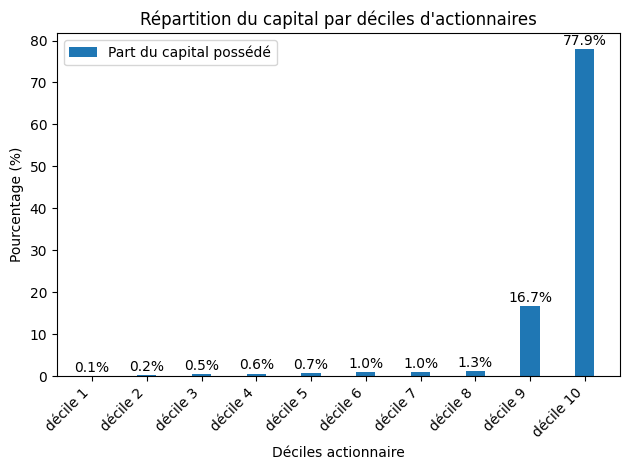

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Remplacer les virgules par des points dans la colonne 'Foncière : Capital possédé'
#df_actionnaire['Foncière : Capital possédé'] = df_actionnaire['Foncière : Capital possédé'].str.replace(',', '.')
#df_actionnaire['Foncière : Part du capital possédée (%)'] = df_actionnaire['Foncière : Part du capital possédée (%)'].str.replace(',', '.')

# Convertir la colonne 'Foncière : Capital possédé' en valeurs numériques
df_actionnaire['Foncière : Capital possédé'] = pd.to_numeric(df_actionnaire['Foncière : Capital possédé'], errors='coerce')
df_actionnaire['Foncière : Part du capital possédée (%)'] = pd.to_numeric(df_actionnaire['Foncière : Part du capital possédée (%)'], errors='coerce')

# Calcul de la part de chaque décile d'actionnaires dans le total
df_grouped = df_actionnaire.groupby('déciles actionnaires').agg({
    'Foncière : Capital possédé': 'sum',
    'Foncière : Part du capital possédée (%)': 'sum'
})
total_capital = df_grouped['Foncière : Capital possédé'].sum() #Avec cette ligne et la ligne de dessous on voit qu'on calcul le total avec le capital possédé et non la part du capital possédé qui inclut les PM

df_grouped['Part du capital possédé (%)'] = df_grouped['Foncière : Capital possédé'] / total_capital * 100

# Affichage du tableau
df_grouped = df_grouped[['Foncière : Part du capital possédée (%)']]
df_grouped.index.name = 'Déciles actionnaire'

# Position des barres
x = np.arange(len(df_grouped))
width = 0.35

df_grouped = df_grouped.reindex(index=decile_order)

# Création du graphique à barres
fig, ax = plt.subplots()

# Barres pour la part du capital possédé
bar1 = ax.bar(x, df_grouped['Foncière : Part du capital possédée (%)'], width, label='Part du capital possédé')

# Étiquettes des axes et du titre
ax.set_xlabel('Déciles actionnaire')
ax.set_ylabel('Pourcentage (%)')
ax.set_title("Répartition du capital par déciles d'actionnaires")

# Positions des étiquettes sur l'axe x
ax.set_xticks(x)
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')  # Inclinaison de 45 degrés avec alignement à droite

# Légende
ax.legend()

# Affichage des valeurs au-dessus des barres
for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, f'{height:.1f}%', ha='center')

# Affichage du graphique
plt.tight_layout()  # Ajustement automatique des marges
plt.show()



In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>La structure des données fait qu'il n'y pas le même nombre de personnes dans chaque déciles ce qui peut déséquilibré les parts (ex : le 2ème décile possède moins que le premier)</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Ici lorsqu\'on parle de part du capital possédé, il s\'agit de la part possédé sur l\'ensemble du capital des personnes physiques et morales</h4>"))

In [ ]:
from IPython.display import display, HTML

display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Focus sur le 9ème décile</u></h2></center>'))


In [ ]:
df_actionnaire10 = df_actionnaire[df_actionnaire["déciles actionnaires"] == "décile 10"]

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Nous avons divisé le 10 ème décile de tous les actionnaires en 10 déciles supplémentaires. il s'agit donc de s'intéresser aux 10 derniers centiles</h3>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Détermination des bornes des déciles parmi le 10eme décile de tous les actionnaires, nombre de personnes par décile et nombre d'actions détenues en fonction des déciles </h3>"))

In [ ]:
# Calculer les déciles avec des intervalles égaux
deciles = pd.qcut(df_actionnaire10["Foncière : Nombre d'actions détenues"], q=10, duplicates='drop')
# Obtenir les bornes des déciles
decile_bounds = np.unique(deciles)
decile_bounds

array([Interval(3383.999, 3842.8, closed='right'),
       Interval(3842.8, 4303.2, closed='right'),
       Interval(4303.2, 4816.9, closed='right'),
       Interval(4816.9, 5301.6, closed='right'),
       Interval(5301.6, 5715.5, closed='right'),
       Interval(5715.5, 6159.6, closed='right'),
       Interval(6159.6, 6678.5, closed='right'),
       Interval(6678.5, 7084.0, closed='right'),
       Interval(7084.0, 7529.7, closed='right'),
       Interval(7529.7, 7979.0, closed='right')], dtype=object)

In [ ]:
df_actionnaire10 = df_actionnaire10.sort_values(by="Foncière : Nombre d'actions détenues")

# Calculer les déciles avec des intervalles égaux
deciles = pd.qcut(df_actionnaire10["Foncière : Nombre d'actions détenues"], q=10, duplicates='drop')

# Utilisez ces intervalles pour découper les déciles
df_actionnaire10['catégories centiles actionnaires'] = deciles
df_actionnaire10['catégories centiles actionnaires'] = df_actionnaire10['catégories centiles actionnaires'].cat.codes + 1

# Créer une nouvelle colonne avec la catégorie d1 à d9
df_actionnaire10['catégories centiles actionnaires'] = 'C' + df_actionnaire10['catégories centiles actionnaires'].astype(str)

In [ ]:
 nouveaux_noms = {
    'C1': 'C90',
    'C2': 'C91',
    'C3': 'C92',
    'C4': 'C93',
    'C5': 'C94',
    'C6': 'C95',
    'C7': 'C96',
    'C8': 'C97',
    'C9': 'C98',
    'C10': 'C99'
}

df_actionnaire10['catégories centiles actionnaires'] = df_actionnaire10['catégories centiles actionnaires'].replace(nouveaux_noms)


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Répartition des catégories de souscripteurs au sein des 10 derniers centiles (par multi-souscripteurs ou pas)</h3>"))

In [ ]:
df_actionnaire10['multi-souscripteur ?'] = df_actionnaire10['multi-souscripteur ?'].replace({True: "Multi-souscripteurs", False: "Mono-souscripteurs"})
df_actionnaire_MS10 = df_actionnaire10.groupby('catégories centiles actionnaires')['multi-souscripteur ?'].value_counts().unstack().fillna(0)
df_actionnaire_MS10 = df_actionnaire_MS10.reindex(['C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99'])
df_actionnaire_MS10

multi-souscripteur ?              Mono-souscripteurs  Multi-souscripteurs
catégories centiles actionnaires                                         
C90                                               53                   48
C91                                               46                   54
C92                                               55                   45
C93                                               48                   52
C94                                               55                   45
C95                                               61                   39
C96                                               54                   46
C97                                               52                   49
C98                                               52                   47
C99                                               56                   45

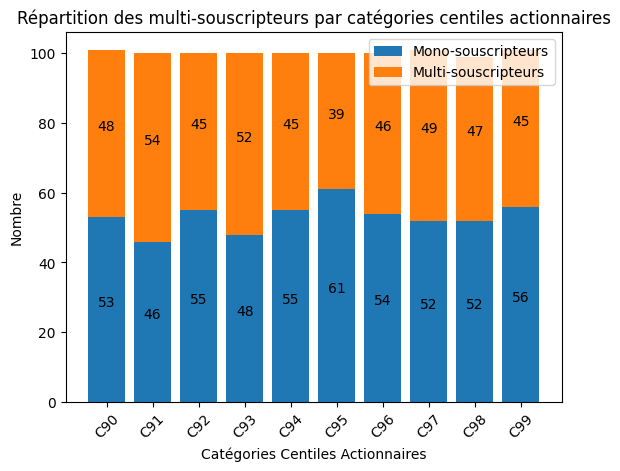

In [ ]:
import matplotlib.pyplot as plt

# Supprimez cette ligne si vous n'utilisez pas Jupyter Notebook
%matplotlib inline

# Définir les données
deciles = df_actionnaire_MS10.index
mono_souscripteurs = df_actionnaire_MS10['Mono-souscripteurs']
multi_souscripteurs = df_actionnaire_MS10['Multi-souscripteurs']

# Créer le graphique en barres empilées
fig, ax = plt.subplots()
bar1 = ax.bar(deciles, mono_souscripteurs, label='Mono-souscripteurs')
bar2 = ax.bar(deciles, multi_souscripteurs, bottom=mono_souscripteurs, label='Multi-souscripteurs')

# Pivoter les étiquettes en x de 45 degrés
plt.xticks(rotation=45)

# Ajouter des valeurs numériques au centre de chaque partie des barres
for decile, bar_m, bar_multi in zip(deciles, bar1, bar2):
    height_m = bar_m.get_height()
    height_multi = bar_multi.get_height()
    total = height_m + height_multi
    ax.annotate(f'{height_m}', (decile, height_m/2), ha='center', va='bottom', color='black')
    ax.annotate(f'{height_multi}', (decile, height_m + height_multi/2), ha='center', va='bottom', color='black')

# Ajouter des labels, un titre et une légende
plt.xlabel('Catégories Centiles Actionnaires')
plt.ylabel('Nombre')
plt.title('Répartition des multi-souscripteurs par catégories centiles actionnaires')
plt.legend()

# Afficher le graphique
plt.show()


In [ ]:
df_actiondécile = df_actionnaire10.groupby('catégories centiles actionnaires')["Foncière : Capital possédé"].sum().to_frame()
df_actiondécile = df_actiondécile.reindex(['C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99'])
df_actiondécile

Foncière : Capital possédé
catégories centiles actionnaires                            
C90                                                 38319960
C91                                                 42962010
C92                                                 47706855
C93                                                 53470935
C94                                                 57795780
C95                                                 62259750
C96                                                 67156215
C97                                                 73106460
C98                                                 75981990
C99                                                 82075665

In [ ]:
df_actiondécile = df_actionnaire10.groupby('catégories centiles actionnaires')["Foncière : Nombre d'actions détenues"].sum().to_frame()
df_actiondécile = df_actiondécile.reindex(['C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99'])
df_actiondécile


Foncière : Nombre d'actions détenues
catégories centiles actionnaires                                      
C90                                                             364952
C91                                                             409162
C92                                                             454351
C93                                                             509247
C94                                                             550436
C95                                                             592950
C96                                                             639583
C97                                                             696252
C98                                                             723638
C99                                                             781673

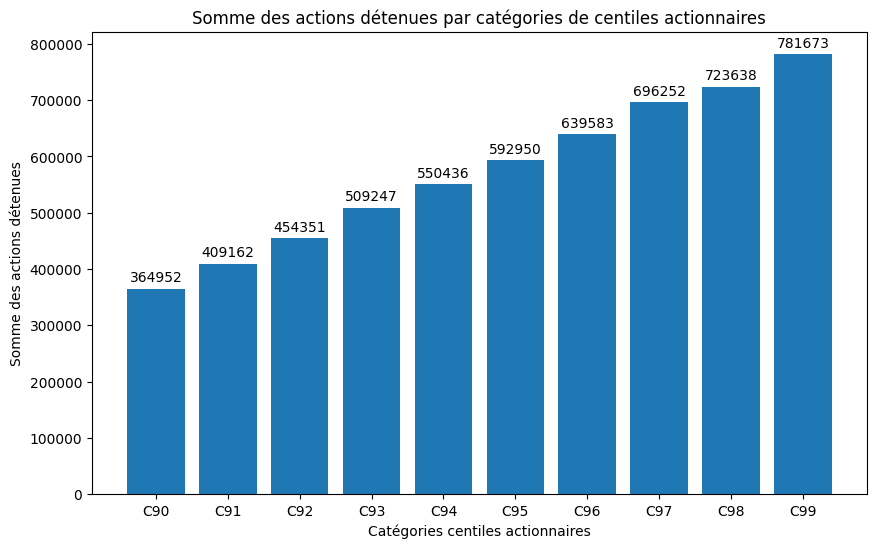

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supposons que vous avez déjà créé la DataFrame df_actiondécile

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(df_actiondécile.index, df_actiondécile["Foncière : Nombre d'actions détenues"])

# Ajouter des étiquettes de valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:.0f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Ajouter des titres et des labels
plt.title("Somme des actions détenues par catégories de centiles actionnaires")
plt.xlabel("Catégories centiles actionnaires")
plt.ylabel("Somme des actions détenues")

# Afficher le diagramme
plt.show()


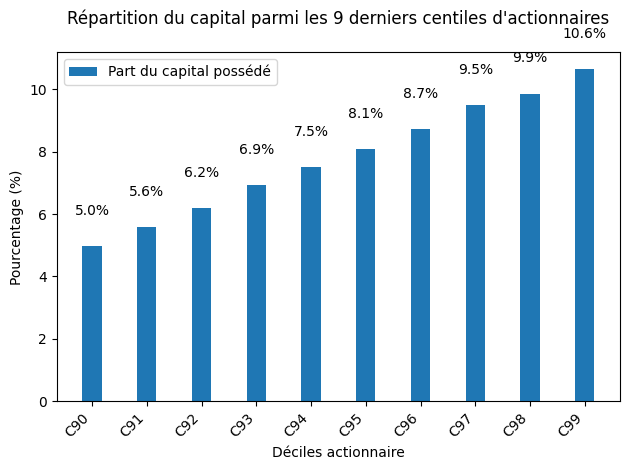

In [ ]:

# Calcul de la part de chaque décile d'actionnaires dans le total
df_grouped = df_actionnaire10.groupby('catégories centiles actionnaires').agg({
    'Foncière : Part du capital possédée (%)': 'sum'
})
df_grouped = df_grouped.reindex(['C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99'])
# Affichage du tableau
df_grouped = df_grouped[['Foncière : Part du capital possédée (%)']]
df_grouped.index.name = 'Déciles actionnaire'

# Position des barres
x = np.arange(len(df_grouped))
width = 0.35

# Création du graphique à barres
fig, ax = plt.subplots()

# Barres pour la part du capital possédé
bar1 = ax.bar(x, df_grouped['Foncière : Part du capital possédée (%)'], width, label='Part du capital possédé')

# Étiquettes des axes et du titre
ax.set_xlabel('Déciles actionnaire')
ax.set_ylabel('Pourcentage (%)')
ax.set_title("Répartition du capital parmi les 9 derniers centiles d'actionnaires", pad=20)  # Augmenter la distance du titre au cadre

# Positions des étiquettes sur l'axe x
ax.set_xticks(x)
ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')  # Inclinaison de 45 degrés avec alignement à droite

# Légende
ax.legend()

# Affichage des valeurs au-dessus des barres
for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, f'{height:.1f}%', ha='center')

# Affichage du graphique
plt.tight_layout()  # Ajustement automatique des marges
plt.show()


In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : 1 % des actionnaires (C99) possèdent 238 848 actions soit presque 16,4 % du capital total</h4>"))

In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Répartition des âges parmi les 10 derniers centiles </h3>"))

In [ ]:
df_Dage = pd.crosstab(index=df_actionnaire10['catégories âge'], columns=df_actionnaire10['catégories centiles actionnaires'], margins=True, margins_name='Total')
df_Dage

catégories centiles actionnaires  C90  C91  C92  C93  C94  C95  C96  C97  C98   
catégories âge                                                                  
0-25 ans                           32   28   26   27   26   32   23   38   31  \
25-40 ans                          14   12   19   12   15   15   19   12   13   
40-60 ans                          23   30   20   28   24   20   19   19   24   
60 ans et plus                     32   30   35   33   35   33   39   32   31   
Total                             101  100  100  100  100  100  100  101   99   

catégories centiles actionnaires  C99  Total  
catégories âge                                
0-25 ans                           28    291  
25-40 ans                          14    145  
40-60 ans                          20    227  
60 ans et plus                     39    339  
Total                             101   1002

In [ ]:
df_col_percent = df_Dage.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum() 
df_col_percent


catégories centiles actionnaires    C90    C91    C92    C93    C94    C95   
catégories âge                                                               
0-25 ans                           31.7   28.0   26.0   27.0   26.0   32.0  \
25-40 ans                          13.9   12.0   19.0   12.0   15.0   15.0   
40-60 ans                          22.8   30.0   20.0   28.0   24.0   20.0   
60 ans et plus                     31.7   30.0   35.0   33.0   35.0   33.0   
Total                             100.1  100.0  100.0  100.0  100.0  100.0   

catégories centiles actionnaires    C96    C97   C98    C99  Total  
catégories âge                                                      
0-25 ans                           23.0   37.6  31.3   27.7   29.0  
25-40 ans                          19.0   11.9  13.1   13.9   14.5  
40-60 ans                          19.0   18.8  24.2   19.8   22.7  
60 ans et plus                     39.0   31.7  31.3   38.6   33.8  
Total                             100.0  100.0  99.9  100.0  100.0

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Presque 2/3 des actionnaires du dernier centile ont plus de 60 ans</h4>"))

In [ ]:
df_row_percent = df_Dage.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1) 
df_row_percent

catégories centiles actionnaires   C90   C91   C92   C93   C94   C95   C96   
catégories âge                                                               
0-25 ans                          11.0   9.6   8.9   9.3   8.9  11.0   7.9  \
25-40 ans                          9.7   8.3  13.1   8.3  10.3  10.3  13.1   
40-60 ans                         10.1  13.2   8.8  12.3  10.6   8.8   8.4   
60 ans et plus                     9.4   8.8  10.3   9.7  10.3   9.7  11.5   
Total                             10.1  10.0  10.0  10.0  10.0  10.0  10.0   

catégories centiles actionnaires   C97   C98   C99  Total  
catégories âge                                             
0-25 ans                          13.1  10.7   9.6  100.0  
25-40 ans                          8.3   9.0   9.7  100.1  
40-60 ans                          8.4  10.6   8.8  100.0  
60 ans et plus                     9.4   9.1  11.5   99.7  
Total                             10.1   9.9  10.1  100.2

In [ ]:
df_DMS = pd.crosstab(index=df_actionnaire10['Catégories souscripteurs'], columns=df_actionnaire10['catégories centiles actionnaires'], margins=True, margins_name='Total')
df_DMC = pd.crosstab(index=df_actionnaire10['multi-casquette ?'], columns=df_actionnaire10['catégories centiles actionnaires'], margins=True, margins_name='Total')
df_Dancienneté = pd.crosstab(index=df_actionnaire10['ancienneté actionnaires'], columns=df_actionnaire10['catégories centiles actionnaires'], margins=True, margins_name='Total')

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Répartition des nombres de souscriptions au sein du 10eme décile </h3>"))

In [ ]:
ordre_categories = ['1 souscription', '2 souscriptions', '3 à 5 souscriptions', '6 à 10 souscriptions', '10 souscriptions et plus', "Total"]
df_DMS = df_DMS.reindex(ordre_categories)
df_DMS

catégories centiles actionnaires  C90  C91  C92  C93  C94  C95  C96  C97  C98   
Catégories souscripteurs                                                        
1 souscription                     50   50   52   44   58   57   48   52   53  \
2 souscriptions                    26   24   25   31   19   20   25   26   23   
3 à 5 souscriptions                11   12   12    9   12    8   12   10   10   
6 à 10 souscriptions                1    0    0    1    1    1    0    0    1   
10 souscriptions et plus           13   14   11   15   10   14   15   13   12   
Total                             101  100  100  100  100  100  100  101   99   

catégories centiles actionnaires  C99  Total  
Catégories souscripteurs                      
1 souscription                     54    518  
2 souscriptions                    18    237  
3 à 5 souscriptions                13    109  
6 à 10 souscriptions                1      6  
10 souscriptions et plus           15    132  
Total                             101   1002

In [ ]:
df_col_percent = df_DMS.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum() 
df_col_percent

catégories centiles actionnaires    C90    C91    C92    C93    C94    C95   
Catégories souscripteurs                                                     
1 souscription                     49.5   50.0   52.0   44.0   58.0   57.0  \
2 souscriptions                    25.7   24.0   25.0   31.0   19.0   20.0   
3 à 5 souscriptions                10.9   12.0   12.0    9.0   12.0    8.0   
6 à 10 souscriptions                1.0    0.0    0.0    1.0    1.0    1.0   
10 souscriptions et plus           12.9   14.0   11.0   15.0   10.0   14.0   
Total                             100.0  100.0  100.0  100.0  100.0  100.0   

catégories centiles actionnaires    C96    C97   C98    C99  Total  
Catégories souscripteurs                                            
1 souscription                     48.0   51.5  53.5   53.5   51.7  
2 souscriptions                    25.0   25.7  23.2   17.8   23.7  
3 à 5 souscriptions                12.0    9.9  10.1   12.9   10.9  
6 à 10 souscriptions                0.0    0.0   1.0    1.0    0.6  
10 souscriptions et plus           15.0   12.9  12.1   14.9   13.2  
Total                             100.0  100.0  99.9  100.1  100.1

In [ ]:
df_row_percent = df_DMS.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1) 
df_row_percent

catégories centiles actionnaires   C90   C91   C92   C93   C94   C95   C96   
Catégories souscripteurs                                                     
1 souscription                     9.7   9.7  10.0   8.5  11.2  11.0   9.3  \
2 souscriptions                   11.0  10.1  10.5  13.1   8.0   8.4  10.5   
3 à 5 souscriptions               10.1  11.0  11.0   8.3  11.0   7.3  11.0   
6 à 10 souscriptions              16.7   0.0   0.0  16.7  16.7  16.7   0.0   
10 souscriptions et plus           9.8  10.6   8.3  11.4   7.6  10.6  11.4   
Total                             10.1  10.0  10.0  10.0  10.0  10.0  10.0   

catégories centiles actionnaires   C97   C98   C99  Total  
Catégories souscripteurs                                   
1 souscription                    10.0  10.2  10.4  100.0  
2 souscriptions                   11.0   9.7   7.6   99.9  
3 à 5 souscriptions                9.2   9.2  11.9  100.0  
6 à 10 souscriptions               0.0  16.7  16.7  100.2  
10 souscriptions et plus           9.8   9.1  11.4  100.0  
Total                             10.1   9.9  10.1  100.2

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Répartition des types de multi-engagement parmi les 10 derniers centiles </h3>"))

In [ ]:
df_DMC

catégories centiles actionnaires  C90  C91  C92  C93  C94  C95  C96  C97  C98   
multi-casquette ?                                                               
Actionnaire uniquement             17   10   11   11   15   16   15   10   15  \
Actionnaire-adhérent               30   43   34   31   29   32   30   42   34   
Actionnaire-donateur               17   14   18    9   16   14   10    6   15   
Triple-engagement                  37   33   37   49   40   38   45   43   35   
Total                             101  100  100  100  100  100  100  101   99   

catégories centiles actionnaires  C99  Total  
multi-casquette ?                             
Actionnaire uniquement             11    131  
Actionnaire-adhérent               29    334  
Actionnaire-donateur               21    140  
Triple-engagement                  40    397  
Total                             101   1002

In [ ]:
df_col_percent = df_DMC.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(1)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum() 
df_col_percent

catégories centiles actionnaires   C90    C91    C92    C93    C94    C95   
multi-casquette ?                                                           
Actionnaire uniquement            16.8   10.0   11.0   11.0   15.0   16.0  \
Actionnaire-adhérent              29.7   43.0   34.0   31.0   29.0   32.0   
Actionnaire-donateur              16.8   14.0   18.0    9.0   16.0   14.0   
Triple-engagement                 36.6   33.0   37.0   49.0   40.0   38.0   
Total                             99.9  100.0  100.0  100.0  100.0  100.0   

catégories centiles actionnaires    C96    C97    C98    C99  Total  
multi-casquette ?                                                    
Actionnaire uniquement             15.0    9.9   15.2   10.9   13.1  
Actionnaire-adhérent               30.0   41.6   34.3   28.7   33.3  
Actionnaire-donateur               10.0    5.9   15.2   20.8   14.0  
Triple-engagement                  45.0   42.6   35.4   39.6   39.6  
Total                             100.0  100.0  100.1  100.0  100.0

In [ ]:
df_row_percent = df_DMC.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1) 
df_row_percent

catégories centiles actionnaires   C90   C91   C92   C93   C94   C95   C96   
multi-casquette ?                                                            
Actionnaire uniquement            13.0   7.6   8.4   8.4  11.5  12.2  11.5  \
Actionnaire-adhérent               9.0  12.9  10.2   9.3   8.7   9.6   9.0   
Actionnaire-donateur              12.1  10.0  12.9   6.4  11.4  10.0   7.1   
Triple-engagement                  9.3   8.3   9.3  12.3  10.1   9.6  11.3   
Total                             10.1  10.0  10.0  10.0  10.0  10.0  10.0   

catégories centiles actionnaires   C97   C98   C99  Total  
multi-casquette ?                                          
Actionnaire uniquement             7.6  11.5   8.4  100.1  
Actionnaire-adhérent              12.6  10.2   8.7  100.2  
Actionnaire-donateur               4.3  10.7  15.0   99.9  
Triple-engagement                 10.8   8.8  10.1   99.9  
Total                             10.1   9.9  10.1  100.2

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Répartition des aciennetés au sein du 10eme décile </h3>"))

In [ ]:
custom_order = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins', "Total"]
df_Dancienneté = df_Dancienneté.reindex(custom_order)
df_Dancienneté

catégories centiles actionnaires        C90  C91  C92  C93  C94  C95  C96   
ancienneté actionnaires                                                     
Nouvel actionnaire depuis 2017 ou plus   36   31   33   40   31   35   29  \
Nouvel actionnaire entre 2012 à 2017     31   31   33   26   29   36   38   
Nouvel actionnaire en 2012 ou moins      34   38   34   34   40   29   33   
Total                                   101  100  100  100  100  100  100   

catégories centiles actionnaires        C97  C98  C99  Total  
ancienneté actionnaires                                       
Nouvel actionnaire depuis 2017 ou plus   32   47   33    347  
Nouvel actionnaire entre 2012 à 2017     31   22   28    305  
Nouvel actionnaire en 2012 ou moins      38   30   40    350  
Total                                   101   99  101   1002

In [ ]:
df_Dancienneté

catégories centiles actionnaires        C90  C91  C92  C93  C94  C95  C96   
ancienneté actionnaires                                                     
Nouvel actionnaire depuis 2017 ou plus   36   31   33   40   31   35   29  \
Nouvel actionnaire entre 2012 à 2017     31   31   33   26   29   36   38   
Nouvel actionnaire en 2012 ou moins      34   38   34   34   40   29   33   
Total                                   101  100  100  100  100  100  100   

catégories centiles actionnaires        C97  C98  C99  Total  
ancienneté actionnaires                                       
Nouvel actionnaire depuis 2017 ou plus   32   47   33    347  
Nouvel actionnaire entre 2012 à 2017     31   22   28    305  
Nouvel actionnaire en 2012 ou moins      38   30   40    350  
Total                                   101   99  101   1002

In [ ]:
df_col_percent = df_Dancienneté.copy()
df_col_percent = df_col_percent.div(df_col_percent.loc['Total']) * 100
df_col_percent = df_col_percent.round(0)
df_col_percent.iloc[-1] = df_col_percent.iloc[:-1].sum() 
df_col_percent

catégories centiles actionnaires          C90    C91    C92    C93    C94   
ancienneté actionnaires                                                     
Nouvel actionnaire depuis 2017 ou plus   36.0   31.0   33.0   40.0   31.0  \
Nouvel actionnaire entre 2012 à 2017     31.0   31.0   33.0   26.0   29.0   
Nouvel actionnaire en 2012 ou moins      34.0   38.0   34.0   34.0   40.0   
Total                                   101.0  100.0  100.0  100.0  100.0   

catégories centiles actionnaires          C95    C96    C97   C98    C99   
ancienneté actionnaires                                                    
Nouvel actionnaire depuis 2017 ou plus   35.0   29.0   32.0  47.0   33.0  \
Nouvel actionnaire entre 2012 à 2017     36.0   38.0   31.0  22.0   28.0   
Nouvel actionnaire en 2012 ou moins      29.0   33.0   38.0  30.0   40.0   
Total                                   100.0  100.0  101.0  99.0  101.0   

catégories centiles actionnaires        Total  
ancienneté actionnaires                        
Nouvel actionnaire depuis 2017 ou plus   35.0  
Nouvel actionnaire entre 2012 à 2017     30.0  
Nouvel actionnaire en 2012 ou moins      35.0  
Total                                   100.0

In [ ]:
custom_order = ['Nouvel actionnaire depuis 2017 ou plus', 'Nouvel actionnaire entre 2012 à 2017', 'Nouvel actionnaire en 2012 ou moins']
df_row_percent = df_Dancienneté.copy()
df_row_percent.iloc[:, :-1] = df_row_percent.iloc[:, :-1].div(df_row_percent['Total'], axis=0) * 100
df_row_percent = df_row_percent.round(1)
df_row_percent['Total'] = df_row_percent.iloc[:, :-1].sum(axis=1) 
df_row_percent 

catégories centiles actionnaires         C90   C91   C92   C93   C94   C95   
ancienneté actionnaires                                                      
Nouvel actionnaire depuis 2017 ou plus  10.4   8.9   9.5  11.5   8.9  10.1  \
Nouvel actionnaire entre 2012 à 2017    10.2  10.2  10.8   8.5   9.5  11.8   
Nouvel actionnaire en 2012 ou moins      9.7  10.9   9.7   9.7  11.4   8.3   
Total                                   10.1  10.0  10.0  10.0  10.0  10.0   

catégories centiles actionnaires         C96   C97   C98   C99  Total  
ancienneté actionnaires                                                
Nouvel actionnaire depuis 2017 ou plus   8.4   9.2  13.5   9.5   99.9  
Nouvel actionnaire entre 2012 à 2017    12.5  10.2   7.2   9.2  100.1  
Nouvel actionnaire en 2012 ou moins      9.4  10.9   8.6  11.4  100.0  
Total                                   10.0  10.1   9.9  10.1  100.2

In [ ]:
from IPython.display import display, HTML

display(HTML("<div style='page-break-before: always;'></div>"))


# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2><u>Analyse sur les dons d\'actions</u></h2></center>'))


In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Ne concerne que les personnes ayant fait des dons</h3>"))

In [ ]:
df_nbaction = df2.groupby("ID du contact")["Nombre d'actions à l'acquisition"].sum().to_frame().reset_index()
df_don = df[df["Nature du mouvement"] =="Don TDL"]
df_don = df_don.groupby("ID du contact")["Nombre d'actions échangées"].sum().to_frame().reset_index()
df_don = pd.merge(df_don, df_nbaction[['ID du contact', 'Nombre d\'actions à l\'acquisition']], on='ID du contact')
df_don["pourcentage donné"] = df_don["Nombre d'actions échangées"]/df_don["Nombre d'actions à l'acquisition"] * 100

In [ ]:
conditions = [
    (df_don["pourcentage donné"] < 20),
    (df_don["pourcentage donné"] < 40),
    (df_don["pourcentage donné"] < 60),
    (df_don['pourcentage donné'] < 80),
    (df_don['pourcentage donné'] < 100)
]

choices = [
    "]0-20[ % d'actions données sur le total d'actions possédées",
    "[20 - 40[ % d'actions données sur le total d'actions possédées",
    "[40 - 60[ % d'actions données sur le total d'actions possédées",
    "[60 - 80[ % d'actions données sur le total d'actions possédées",
    "[80 - 100[ % d'actions données sur le total d'actions possédées"
]

df_don["catégories des doneurs d'actions"] = np.select(conditions, choices, default="100 % d'actions données sur le total d'actions possédées")

In [ ]:
value_counts = df_don["catégories des doneurs d'actions"].value_counts().reset_index()
value_counts.columns = ["catégories des doneurs d'actions", "Nombre d'individus"]
categories_order = [ 
     "]0-20[ % d'actions données sur le total d'actions possédées",
    "[20 - 40[ % d'actions données sur le total d'actions possédées",
    "[40 - 60[ % d'actions données sur le total d'actions possédées",
    "[60 - 80[ % d'actions données sur le total d'actions possédées",
    "[80 - 100[ % d'actions données sur le total d'actions possédées",
    "100 % d'actions données sur le total d'actions possédées"]
# Créer un DataFrame contenant toutes les catégories dans l'ordre spécifié
categories_df = pd.DataFrame({"catégories des doneurs d'actions": categories_order})

# Fusionner les données avec la réindexation
value_counts_sorted = categories_df.merge(value_counts, how="left")

value_counts["catégories des doneurs d'actions"] = value_counts["catégories des doneurs d'actions"].astype(str)

# Fusionner les données avec la réindexation
value_counts_sorted = categories_df.merge(value_counts, how="left")


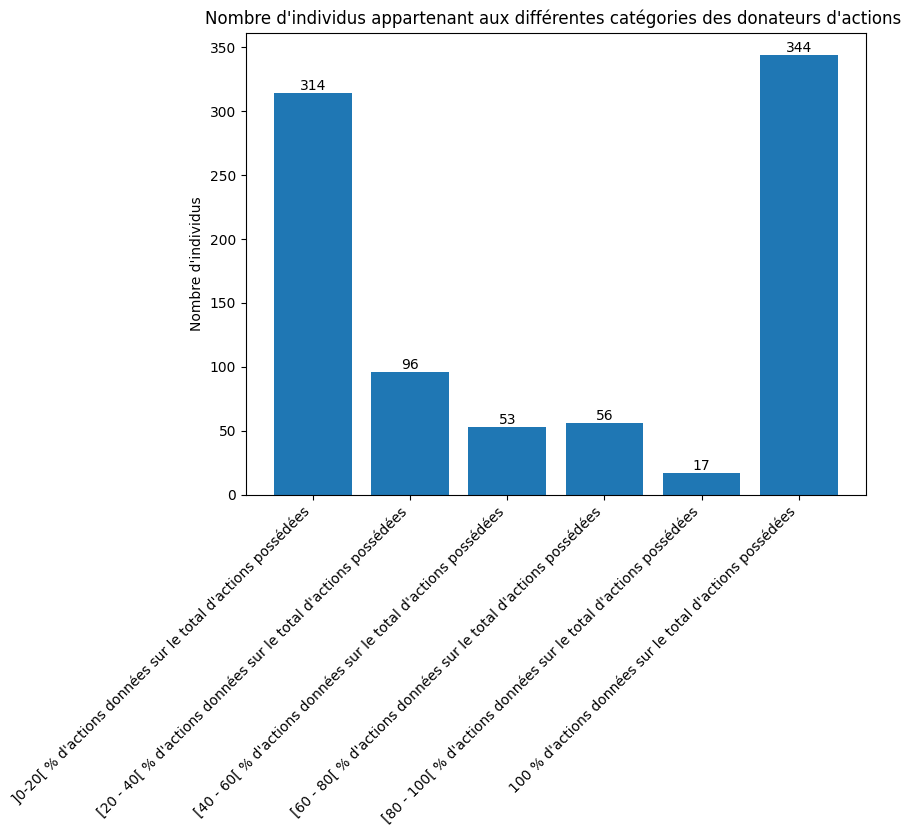

In [ ]:
import matplotlib.pyplot as plt

# Données pour l'histogramme
categories = value_counts_sorted["catégories des doneurs d'actions"]
counts = value_counts_sorted["Nombre d'individus"]

# Créer le graphique
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts)

# Incliner les noms des catégories et espacer les barres
plt.xticks(rotation=45, ha='right')

# Titre et étiquettes des axes
plt.title("Nombre d'individus appartenant aux différentes catégories des donateurs d'actions ")
plt.xlabel("")
plt.ylabel("Nombre d'individus")

# Ajouter les valeurs au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

# Afficher l'histogramme
plt.show()


In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Parmi les souscripteurs qui ont fait des dons d'actions, il y en avait 309 qui ont donné toutes les actions qu'ils avaient achetées et 13 personnes ont donné 80 à 99 % de toutes les actions qu'ils possédaient ([80 - 100[ % d'actions données)</h4>"))

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les données pour le diagramme
categories = value_counts_sorted["catégories des doneurs d'actions"]
counts = value_counts_sorted["Nombre d'individus"]

# Créer une figure et des axes
fig, ax = plt.subplots()

# Définir l'angle de départ du premier secteur (en degrés)
startangle = 260

# Générer le diagramme en secteurs avec angle de départ spécifié
pie = ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=startangle)

# Tourner le cercle
ax.set_aspect('equal')

# Ajouter un titre
ax.set_title("Répartition des donateurs d'actions par catégorie")

# Afficher le diagramme
plt.show()


In [ ]:
df_don = df_don.merge(df[["Catégories souscripteurs","multi-casquette ?","ancienneté actionnaires","catégories âge", "ID du contact"]], on='ID du contact', how='left')
df_don= df_don.drop_duplicates(subset="ID du contact")
# Définir les conditions pour les catégories d'actions possédées
conditions = [
    (df_don["Nombre d'actions à l'acquisition"] <= 10),
    (df_don["Nombre d'actions à l'acquisition"] <= 50),
    (df_don["Nombre d'actions à l'acquisition"] <= 200)
]

# Définir les valeurs correspondantes pour chaque condition
values = ['1 à 10 actions possédées', '11 à 50 actions possédées', '51 à 200 actions possédées']

# Appliquer les conditions et attribuer les valeurs correspondantes à la nouvelle colonne
df_don["catégorie actionnaire par nombre d'actions"] = np.select(conditions, values, default='Plus de 200 actions possédées')

In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Croisement entre les caractérisitiques des donateurs et le pourcentage des leurs actions données</h3>"))

In [ ]:
categories_order = [ 
     "]0-20[ % d'actions données sur le total d'actions possédées",
    "[20 - 40[ % d'actions données sur le total d'actions possédées",
    "[40 - 60[ % d'actions données sur le total d'actions possédées",
    "[60 - 80[ % d'actions données sur le total d'actions possédées",
    "[80 - 100[ % d'actions données sur le total d'actions possédées",
    "100 % d'actions données sur le total d'actions possédées",
    "Total"]

In [ ]:
df_donage = pd.crosstab(index=df_don["catégories des doneurs d'actions"], columns=df_don["catégories âge"], margins=True, margins_name='Total')
df_donage = df_donage.reindex(categories_order)
df_donage

catégories âge                                      0-25 ans  25-40 ans   
catégories des doneurs d'actions                                          
]0-20[ % d'actions données sur le total d'actio...        82         45  \
[20 - 40[ % d'actions données sur le total d'ac...        31         18   
[40 - 60[ % d'actions données sur le total d'ac...        16         12   
[60 - 80[ % d'actions données sur le total d'ac...        15         11   
[80 - 100[ % d'actions données sur le total d'a...         4          2   
100 % d'actions données sur le total d'actions ...        87         66   
Total                                                    235        154   

catégories âge                                      40-60 ans  60 ans et plus   
catégories des doneurs d'actions                                                
]0-20[ % d'actions données sur le total d'actio...         75             112  \
[20 - 40[ % d'actions données sur le total d'ac...         22              25   
[40 - 60[ % d'actions données sur le total d'ac...          7              18   
[60 - 80[ % d'actions données sur le total d'ac...         13              17   
[80 - 100[ % d'actions données sur le total d'a...          3               8   
100 % d'actions données sur le total d'actions ...         66             125   
Total                                                     186             305   

catégories âge                                      Total  
catégories des doneurs d'actions                           
]0-20[ % d'actions données sur le total d'actio...    314  
[20 - 40[ % d'actions données sur le total d'ac...     96  
[40 - 60[ % d'actions données sur le total d'ac...     53  
[60 - 80[ % d'actions données sur le total d'ac...     56  
[80 - 100[ % d'actions données sur le total d'a...     17  
100 % d'actions données sur le total d'actions ...    344  
Total                                                 880

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les actionnaires qui donnent leurs actions ont globalement plus de 60 ans</h4>"))

In [ ]:
df_donancieneté = pd.crosstab(index=df_don["catégories des doneurs d'actions"], columns=df_don["ancienneté actionnaires"], margins=True, margins_name='Total')
df_donancieneté.reindex(categories_order)

ancienneté actionnaires                             Nouvel actionnaire depuis 2017 ou plus   
catégories des doneurs d'actions                                                             
]0-20[ % d'actions données sur le total d'actio...                                     112  \
[20 - 40[ % d'actions données sur le total d'ac...                                      44   
[40 - 60[ % d'actions données sur le total d'ac...                                      17   
[60 - 80[ % d'actions données sur le total d'ac...                                      16   
[80 - 100[ % d'actions données sur le total d'a...                                       6   
100 % d'actions données sur le total d'actions ...                                     110   
Total                                                                                  305   

ancienneté actionnaires                             Nouvel actionnaire en 2012 ou moins   
catégories des doneurs d'actions                                                          
]0-20[ % d'actions données sur le total d'actio...                                  107  \
[20 - 40[ % d'actions données sur le total d'ac...                                   32   
[40 - 60[ % d'actions données sur le total d'ac...                                   22   
[60 - 80[ % d'actions données sur le total d'ac...                                   18   
[80 - 100[ % d'actions données sur le total d'a...                                   10   
100 % d'actions données sur le total d'actions ...                                  136   
Total                                                                               325   

ancienneté actionnaires                             Nouvel actionnaire entre 2012 à 2017   
catégories des doneurs d'actions                                                           
]0-20[ % d'actions données sur le total d'actio...                                    95  \
[20 - 40[ % d'actions données sur le total d'ac...                                    20   
[40 - 60[ % d'actions données sur le total d'ac...                                    14   
[60 - 80[ % d'actions données sur le total d'ac...                                    22   
[80 - 100[ % d'actions données sur le total d'a...                                     1   
100 % d'actions données sur le total d'actions ...                                    98   
Total                                                                                250   

ancienneté actionnaires                             Total  
catégories des doneurs d'actions                           
]0-20[ % d'actions données sur le total d'actio...    314  
[20 - 40[ % d'actions données sur le total d'ac...     96  
[40 - 60[ % d'actions données sur le total d'ac...     53  
[60 - 80[ % d'actions données sur le total d'ac...     56  
[80 - 100[ % d'actions données sur le total d'a...     17  
100 % d'actions données sur le total d'actions ...    344  
Total                                                 880

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>Les actionnaires qui donnent leurs actions sont globalement anciens</h3>"))

In [ ]:
df_donMC = pd.crosstab(index=df_don["catégories des doneurs d'actions"], columns=df_don["multi-casquette ?"], margins=True, margins_name='Total')
df_donMC.reindex(categories_order)

multi-casquette ?                                   Actionnaire uniquement   
catégories des doneurs d'actions                                             
]0-20[ % d'actions données sur le total d'actio...                      88  \
[20 - 40[ % d'actions données sur le total d'ac...                      20   
[40 - 60[ % d'actions données sur le total d'ac...                      11   
[60 - 80[ % d'actions données sur le total d'ac...                      18   
[80 - 100[ % d'actions données sur le total d'a...                       1   
100 % d'actions données sur le total d'actions ...                      84   
Total                                                                  222   

multi-casquette ?                                   Actionnaire-adhérent   
catégories des doneurs d'actions                                           
]0-20[ % d'actions données sur le total d'actio...                    98  \
[20 - 40[ % d'actions données sur le total d'ac...                    21   
[40 - 60[ % d'actions données sur le total d'ac...                    16   
[60 - 80[ % d'actions données sur le total d'ac...                     8   
[80 - 100[ % d'actions données sur le total d'a...                     8   
100 % d'actions données sur le total d'actions ...                   104   
Total                                                                255   

multi-casquette ?                                   Actionnaire-donateur   
catégories des doneurs d'actions                                           
]0-20[ % d'actions données sur le total d'actio...                    35  \
[20 - 40[ % d'actions données sur le total d'ac...                    14   
[40 - 60[ % d'actions données sur le total d'ac...                     6   
[60 - 80[ % d'actions données sur le total d'ac...                     5   
[80 - 100[ % d'actions données sur le total d'a...                     2   
100 % d'actions données sur le total d'actions ...                    37   
Total                                                                 99   

multi-casquette ?                                   Triple-engagement  Total  
catégories des doneurs d'actions                                              
]0-20[ % d'actions données sur le total d'actio...                 93    314  
[20 - 40[ % d'actions données sur le total d'ac...                 41     96  
[40 - 60[ % d'actions données sur le total d'ac...                 20     53  
[60 - 80[ % d'actions données sur le total d'ac...                 25     56  
[80 - 100[ % d'actions données sur le total d'a...                  6     17  
100 % d'actions données sur le total d'actions ...                119    344  
Total                                                             304    880

In [ ]:
df_donMS = pd.crosstab(index=df_don["catégories des doneurs d'actions"], columns=df_don["Catégories souscripteurs"], margins=True, margins_name='Total')
df_donMS.reindex(categories_order)

Catégories souscripteurs                            1 souscription   
catégories des doneurs d'actions                                     
]0-20[ % d'actions données sur le total d'actio...             131  \
[20 - 40[ % d'actions données sur le total d'ac...              51   
[40 - 60[ % d'actions données sur le total d'ac...              33   
[60 - 80[ % d'actions données sur le total d'ac...              32   
[80 - 100[ % d'actions données sur le total d'a...              11   
100 % d'actions données sur le total d'actions ...             271   
Total                                                          529   

Catégories souscripteurs                            10 souscriptions et plus   
catégories des doneurs d'actions                                               
]0-20[ % d'actions données sur le total d'actio...                         7  \
[20 - 40[ % d'actions données sur le total d'ac...                         1   
[40 - 60[ % d'actions données sur le total d'ac...                         0   
[60 - 80[ % d'actions données sur le total d'ac...                         1   
[80 - 100[ % d'actions données sur le total d'a...                         0   
100 % d'actions données sur le total d'actions ...                         0   
Total                                                                      9   

Catégories souscripteurs                            2 souscriptions   
catégories des doneurs d'actions                                      
]0-20[ % d'actions données sur le total d'actio...               86  \
[20 - 40[ % d'actions données sur le total d'ac...               22   
[40 - 60[ % d'actions données sur le total d'ac...               14   
[60 - 80[ % d'actions données sur le total d'ac...               18   
[80 - 100[ % d'actions données sur le total d'a...                3   
100 % d'actions données sur le total d'actions ...               56   
Total                                                           199   

Catégories souscripteurs                            3 à 5 souscriptions   
catégories des doneurs d'actions                                          
]0-20[ % d'actions données sur le total d'actio...                   57  \
[20 - 40[ % d'actions données sur le total d'ac...                   14   
[40 - 60[ % d'actions données sur le total d'ac...                    4   
[60 - 80[ % d'actions données sur le total d'ac...                    4   
[80 - 100[ % d'actions données sur le total d'a...                    2   
100 % d'actions données sur le total d'actions ...                   12   
Total                                                                93   

Catégories souscripteurs                            6 à 10 souscriptions   
catégories des doneurs d'actions                                           
]0-20[ % d'actions données sur le total d'actio...                    33  \
[20 - 40[ % d'actions données sur le total d'ac...                     8   
[40 - 60[ % d'actions données sur le total d'ac...                     2   
[60 - 80[ % d'actions données sur le total d'ac...                     1   
[80 - 100[ % d'actions données sur le total d'a...                     1   
100 % d'actions données sur le total d'actions ...                     5   
Total                                                                 50   

Catégories souscripteurs                            Total  
catégories des doneurs d'actions                           
]0-20[ % d'actions données sur le total d'actio...    314  
[20 - 40[ % d'actions données sur le total d'ac...     96  
[40 - 60[ % d'actions données sur le total d'ac...     53  
[60 - 80[ % d'actions données sur le total d'ac...     56  
[80 - 100[ % d'actions données sur le total d'a...     17  
100 % d'actions données sur le total d'actions ...    344  
Total                                                 880

In [ ]:
df_donnbactions = pd.crosstab(index=df_don["catégories des doneurs d'actions"], columns=df_don["catégorie actionnaire par nombre d'actions"], margins=True, margins_name='Total')
df_donnbactions.reindex(categories_order)

catégorie actionnaire par nombre d'actions          1 à 10 actions possédées   
catégories des doneurs d'actions                                               
]0-20[ % d'actions données sur le total d'actio...                        16  \
[20 - 40[ % d'actions données sur le total d'ac...                        20   
[40 - 60[ % d'actions données sur le total d'ac...                        12   
[60 - 80[ % d'actions données sur le total d'ac...                        19   
[80 - 100[ % d'actions données sur le total d'a...                         7   
100 % d'actions données sur le total d'actions ...                       217   
Total                                                                    291   

catégorie actionnaire par nombre d'actions          11 à 50 actions possédées   
catégories des doneurs d'actions                                                
]0-20[ % d'actions données sur le total d'actio...                         56  \
[20 - 40[ % d'actions données sur le total d'ac...                         38   
[40 - 60[ % d'actions données sur le total d'ac...                         19   
[60 - 80[ % d'actions données sur le total d'ac...                         11   
[80 - 100[ % d'actions données sur le total d'a...                          5   
100 % d'actions données sur le total d'actions ...                         80   
Total                                                                     209   

catégorie actionnaire par nombre d'actions          51 à 200 actions possédées   
catégories des doneurs d'actions                                                 
]0-20[ % d'actions données sur le total d'actio...                         113  \
[20 - 40[ % d'actions données sur le total d'ac...                          25   
[40 - 60[ % d'actions données sur le total d'ac...                          20   
[60 - 80[ % d'actions données sur le total d'ac...                          21   
[80 - 100[ % d'actions données sur le total d'a...                           5   
100 % d'actions données sur le total d'actions ...                          36   
Total                                                                      220   

catégorie actionnaire par nombre d'actions          Plus de 200 actions possédées   
catégories des doneurs d'actions                                                    
]0-20[ % d'actions données sur le total d'actio...                            129  \
[20 - 40[ % d'actions données sur le total d'ac...                             13   
[40 - 60[ % d'actions données sur le total d'ac...                              2   
[60 - 80[ % d'actions données sur le total d'ac...                              5   
[80 - 100[ % d'actions données sur le total d'a...                              0   
100 % d'actions données sur le total d'actions ...                             11   
Total                                                                         160   

catégorie actionnaire par nombre d'actions          Total  
catégories des doneurs d'actions                           
]0-20[ % d'actions données sur le total d'actio...    314  
[20 - 40[ % d'actions données sur le total d'ac...     96  
[40 - 60[ % d'actions données sur le total d'ac...     53  
[60 - 80[ % d'actions données sur le total d'ac...     56  
[80 - 100[ % d'actions données sur le total d'a...     17  
100 % d'actions données sur le total d'actions ...    344  
Total                                                 880

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h3>50% de ceux qui donnent totalement leurs actions en ont peu</h3>"))

In [ ]:
from IPython.display import display, HTML

display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><u><h2>Analyses statistiques</u></h2></center>')) 


In [ ]:
from IPython.display import display, HTML

display(HTML("<div style='page-break-before: always;'></div>"))

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2>Les commentaires sous les analyses statistiques peuvent ne pas être valables. Les données étant créees aléatoirement à chaque fois que le code est exécuté, les résultats des analyses sont différent à chaque fois. Laisser les commentaires permet d\'éclairer sur les méthodes de lecture et de compréhension des analyses plutôt que s\'intéresser à leurs résultats mêmes</h2></center>'))

In [ ]:
df_nbaction = df2.groupby("ID du contact")["Nombre d'actions à l'acquisition"].sum().to_frame().reset_index()

In [ ]:
df_nbaction= df_nbaction.merge(df[['ID du contact',"Nombre de souscriptions"]], on='ID du contact', how='left')
df_nbaction = df_nbaction.drop_duplicates(subset="ID du contact")

In [ ]:
df_diff_mean = df_diff_mean.merge(df_nbaction[["ID du contact","Nombre d'actions à l'acquisition","Nombre de souscriptions"]], on='ID du contact', how='left')
df_diff_mean = df_diff_mean.drop_duplicates(subset="ID du contact")
df_diff_mean["Nombre moyen d'action par souscription"] = df_diff_mean["Nombre d'actions à l'acquisition"]/df_diff_mean["Nombre de souscriptions"]

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Charger les données à partir du DataFrame donné (merged_dffinalMS)
dfa = df_diff_mean.copy()

# Supprimer les lignes où la variable "Nombre moyen d'action par souscription" dépasse 300
dfa = dfa.drop(dfa[dfa["Nombre moyen d'action par souscription"] > 300].index)

# Supprimer les lignes avec des valeurs manquantes pour la variable 'Moyenne temps pour nouvelle resouscription'
dfa = dfa.dropna(subset=['Différence'])

# Vérifier le nombre de lignes après la suppression des valeurs manquantes
print("Nombre de lignes après suppression des valeurs manquantes :", len(dfa))


# Définir les variables dépendante (y) et indépendante (x)
y = dfa["Différence"]
x = dfa["Nombre moyen d'action par souscription"]

# Ajouter une constante à la variable indépendante
x = sm.add_constant(x)

# Créer un modèle de régression linéaire et ajuster aux données avec covariance robuste (HC3)
model = sm.OLS(y, x)
results = model.fit(cov_type='HC3')

# Afficher les résultats de la régression avec covariance robuste
print(results.summary())

# Plot des données avec la ligne de régression
plt.scatter(dfa["Nombre moyen d'action par souscription"], dfa["Différence"])
plt.plot(dfa["Nombre moyen d'action par souscription"], results.fittedvalues, color='red', linewidth=2)
plt.xlabel("Nombre moyen d'action par souscription")
plt.ylabel("Moyenne temps pour nouvelle resouscription")
plt.title("Régression linéaire du temps moyen pour nouvelle resouscription par rapport au nombre moyen d'actions par souscription")
plt.show()




Nombre de lignes après suppression des valeurs manquantes : 4125
                            OLS Regression Results                            
Dep. Variable:             Différence   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3046
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.581
Time:                        14:13:29   Log-Likelihood:                -9888.6
No. Observations:                4125   AIC:                         1.978e+04
Df Residuals:                    4123   BIC:                         1.979e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Il y a peu de lien entre le laps de temps pour reprendre une souscription et le nombre moyen d'actions prises par souscription. On remarque que la ligne rouge est presque horizontale. Alors que plus cette dernière est verticale plus il y a une corrélation forte entre les 2 variables. De plus si la ligne monte vers le ciel, il y a une corrélation positive et inversement. Ici on remarque que la ligne plonge. On remarque que les personnes qui ont pris beaucoup d'actions par souscription en moyenne ont tendance à reprendre des souscriptions de manière moins espacée. Le fait d'avoir une moyenne d'actions par souscription avec une unité en moins diminurait 0.0020 fois le laps de temps pour reprendre une souscription</h4>"))

In [ ]:
from datetime import datetime, timedelta
df_durée_conserv = df[df["Nature du mouvement"] == "Rachat"]
df_durée_conserv = df_durée_conserv.groupby("ID du contact")["durée conservation"].mean().to_frame().reset_index()
df_durée_conserv = df_durée_conserv.drop(df_durée_conserv[df_durée_conserv["durée conservation"] < timedelta(days=0)].index)
df_durée_conserv = df_durée_conserv.merge(df_nbaction[["ID du contact","Nombre d'actions à l'acquisition","Nombre de souscriptions"]], on='ID du contact', how='left')
df_durée_conserv = df_durée_conserv.drop_duplicates(subset="ID du contact")
df_durée_conserv["Nombre moyen d'action par souscription"] = df_durée_conserv["Nombre d'actions à l'acquisition"]/df_durée_conserv["Nombre de souscriptions"]


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Charger les données à partir du DataFrame donné (merged_dffinalMS)
dfb = df_durée_conserv.copy()

# Supprimer les lignes où la variable "Nombre moyen d'action par souscription" dépasse 300
dfb = dfb.drop(dfb[dfb["Nombre moyen d'action par souscription"] > 300].index)

# Supprimer les lignes avec des valeurs manquantes pour les variables concernées
dfb = dfb.dropna(subset=['durée conservation', "Nombre moyen d'action par souscription"])

# Convertir la variable "Moyenne temps pour nouvelle resouscription" en années (numérique)
dfb["durée conservation"] = dfb["durée conservation"] / pd.Timedelta(days=365)

# Définir les variables dépendante (y) et indépendante (x)
y = dfb["durée conservation"]
x = dfb["Nombre moyen d'action par souscription"]

# Ajouter une constante à la variable indépendante
x = sm.add_constant(x)

# Créer un modèle de régression linéaire et ajuster aux données avec covariance robuste (HC3)
model = sm.OLS(y, x)
results = model.fit(cov_type='HC3')

# Afficher les résultats de la régression avec covariance robuste
print(results.summary())

# Plot des données avec la ligne de régression
plt.scatter(dfb["Nombre moyen d'action par souscription"], dfb["durée conservation"])
plt.plot(dfb["Nombre moyen d'action par souscription"], results.fittedvalues, color='red', linewidth=2)
plt.xlabel("Nombre moyen d'action par souscription")
plt.ylabel("intervalle moyen entre interaction avec un contrat")
plt.title("Régression linéaire de l'intervalle moyen  (en année) entre interaction avec un contrat par rapport au nombre moyen d'actions par souscription")
plt.show()


                            OLS Regression Results                            
Dep. Variable:     durée conservation   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 4.345e-05
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.995
Time:                        14:13:29   Log-Likelihood:                -3307.6
No. Observations:                1151   AIC:                             6619.
Df Residuals:                    1149   BIC:                             6629.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : Pour le test précent, dans le tableau ''OLS Regression Results'', on observe que pour la variable ''Nombre moyen d'actions par souscription'' une valeur P>|z| a été calculée à 0.096 soit 9,6 % de chances de se tromper en affirmant qu'il puisse avoir une corrélation entre le nombre moyen d'actions par souscription par personne et le fait que cette personne ait pris plus ou moins de temps avant de faire un rachat d'actions sur un de ses contrats. Il est préférable que la valeur ''P>|z|' calculée soit inférieure à 0,05 pour pouvoir affirmer qu'il y ait un lien entre 2 variables. En plus de ne rien pouvoir affirmer sur le lien entre les 2 variables prises en compte, on voit que la relation entre ces dernières est potentiellement très faible. Une unité en plus du nombre moyen d'actions par souscriptions diminuerait de 0.0025 fois le laps de temps pour un rachat d'actions</h4>"))

In [ ]:
df_retraitdef =  df_retraitdef.merge(df_nbaction[["ID du contact","Nombre d'actions à l'acquisition"]], on='ID du contact', how='left')
df_retraitdef =  df_retraitdef.drop_duplicates(subset="ID du contact")

In [ ]:
df_retraitdef["Nombre moyen d'action par souscription"] = df_retraitdef["Nombre d'actions à l'acquisition_y"]/df_retraitdef["Nombre de souscriptions"]

                            OLS Regression Results                            
Dep. Variable:     Durée actionnariat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1019
Date:                Thu, 28 Sep 2023   Prob (F-statistic):              0.750
Time:                        14:13:30   Log-Likelihood:                -240.34
No. Observations:                  86   AIC:                             484.7
Df Residuals:                      84   BIC:                             489.6
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

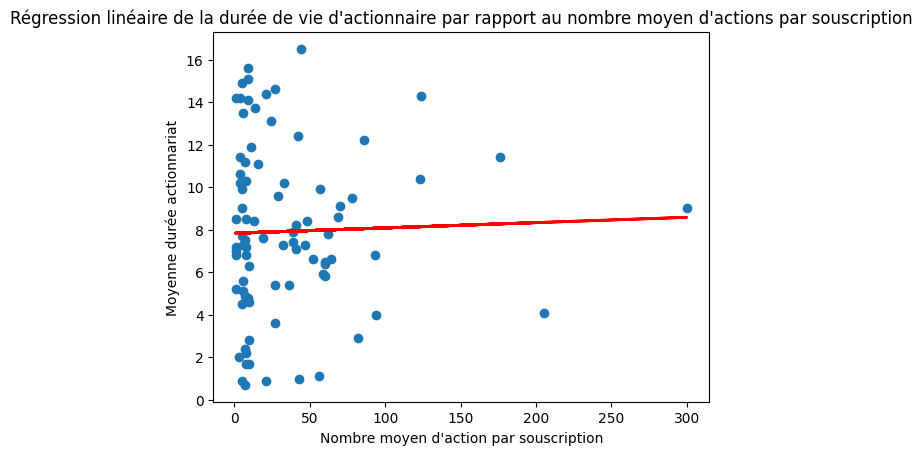

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Charger les données à partir du DataFrame donné (merged_dffinalMS)
dfc = df_retraitdef.copy()

# Supprimer les lignes où la variable "Nombre moyen d'action par souscription" dépasse 300
dfc = dfc.drop(dfc[dfc["Nombre moyen d'action par souscription"] > 300].index)

# Supprimer les lignes avec des valeurs manquantes pour les variables concernées
dfc = dfc.dropna(subset=['Durée actionnariat', "Nombre moyen d'action par souscription"])


# Définir les variables dépendante (y) et indépendante (x)
y = dfc["Durée actionnariat"]
x = dfc["Nombre moyen d'action par souscription"]

# Ajouter une constante à la variable indépendante
x = sm.add_constant(x)

# Créer un modèle de régression linéaire et ajuster aux données avec covariance robuste (HC3)
model = sm.OLS(y, x)
results = model.fit(cov_type='HC3')

# Afficher les résultats de la régression avec covariance robuste
print(results.summary())

# Plot des données avec la ligne de régression
plt.scatter(dfc["Nombre moyen d'action par souscription"], dfc["Durée actionnariat"])
plt.plot(dfc["Nombre moyen d'action par souscription"], results.fittedvalues, color='red', linewidth=2)
plt.xlabel("Nombre moyen d'action par souscription")
plt.ylabel("Moyenne durée actionnariat")
plt.title("Régression linéaire de la durée de vie d'actionnaire par rapport au nombre moyen d'actions par souscription")
plt.show()

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>ANOVA des nombres de souscriptions en fonction des retraits partiels ou non d'actions sur un contrat</h2></center>"))

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Charger les données à partir du DataFrame donné (df_actionnaireretrait)
df = df_retrait
# Supprimer les lignes avec des valeurs manquantes pour les variables concernées
df = df.dropna(subset=["Nombre de souscriptions", "retrait complet ou partiel"])
# Effectuer l'ANOVA
model = ols('df["Nombre de souscriptions"] ~ C(df["retrait complet ou partiel"])', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Effectuer les comparaisons post hoc (méthode de Tukey)
posthoc = pairwise_tukeyhsd(df["Nombre de souscriptions"], df['retrait complet ou partiel'])

# Afficher la table ANOVA
print(anova_table)

# Afficher les comparaisons post hoc
print(posthoc)

                                          sum_sq      df         F    PR(>F)
C(df["retrait complet ou partiel"])     6.609192     1.0  1.562966  0.211398
Residual                             7446.602379  1761.0       NaN       NaN
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
retrait complet retrait partiel   0.1666 0.2114 -0.0947 0.4278  False
---------------------------------------------------------------------


In [ ]:

from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Clé de lecture : On peut affirmer qu'il y a un lien entre le fait de vider complètement ou pas un contrat de ses actions et le fait d'avoir plus ou moins pris de souscriptions. On remarque que la valeur ''p-adj'' (un équivalent de la valeur P>|z|) est égale à 0.009. On a 0,9 % de chance de se tromper en affirmant cela. Cependant cette relation est minime. Les personnes ayant vidé partiellement un de leurs contrats en faisant un rachat d'actions (retrait partiel) avaient en moyenne 0,65 souscription de moins que ceux qui ont vidé complètement leurs contrats. De plus la vérification du lien entre ces variables est un peu biaisée dans le sens ou une même personne aura pu faire des retraits partiels et des retraits complets à la fois  </h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>ANOVA moyenne des nombres de souscriptions en fonction des retraits définitifs ou non de ses actions</h2></center>"))

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Charger les données à partir du DataFrame donné (df_actionnaireretrait)
df = df_retrait
# Supprimer les lignes avec des valeurs manquantes pour les variables concernées
df = df.dropna(subset=["Nombre de souscriptions", "nature du retrait"])
# Effectuer l'ANOVA
model = ols('df["Nombre de souscriptions"] ~ C(df["nature du retrait"])', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Effectuer les comparaisons post hoc (méthode de Tukey)
posthoc = pairwise_tukeyhsd(df["Nombre de souscriptions"], df['nature du retrait'])

# Afficher la table ANOVA
print(anova_table)

# Afficher les comparaisons post hoc
print(posthoc)


                                 sum_sq      df         F        PR(>F)
C(df["nature du retrait"])   101.068215     1.0  24.20806  9.453356e-07
Residual                    7352.143357  1761.0       NaN           NaN
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
      group1           group2     meandiff p-adj lower  upper  reject
---------------------------------------------------------------------
retrait définitif retrait partiel   1.0822   0.0 0.6508 1.5135   True
---------------------------------------------------------------------


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Ceux qui n'ont pas fait de retrait définitif ont en moyenne 3 souscriptions de plus que ceux qui l'ont fait </h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>ANOVA nombre d'actions des contrats en fonction du retrait total ou pas des actions par contrat </h2></center>"))

In [ ]:
df_retrait = df_retrait.merge(df_nbaction[["Nombre d\'actions à l\'acquisition", "ID du contact"]], on='ID du contact', how='left')
df_retrait = df_retrait.drop_duplicates(subset="Mouvement de titre Name")
df_retrait["Nombre moyen action par souscription"] = df_retrait["Nombre d\'actions à l\'acquisition_y"]/df_retrait["Nombre de souscriptions"]

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Charger les données à partir du DataFrame donné (df_retrait)
df = df_retrait
df = df.dropna(subset=["Nombre d'actions à l'acquisition_x", 'retrait complet ou partiel'])

# Effectuer l'ANOVA
model = ols("df[\"Nombre d'actions à l'acquisition_x\"] ~ C(df['retrait complet ou partiel'])", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Effectuer les comparaisons post hoc (méthode de Tukey)
posthoc = pairwise_tukeyhsd(df["Nombre d'actions à l'acquisition_x"], df['retrait complet ou partiel'])

# Afficher la table ANOVA
print(anova_table)

# Afficher les comparaisons post hoc
print(posthoc)


                                           sum_sq      df          F    PR(>F)
C(df['retrait complet ou partiel'])  1.306261e+05     1.0  14.333277  0.000156
Residual                             2.515321e+07  2760.0        NaN       NaN
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
retrait complet retrait partiel  18.5395 0.0002 8.9374 28.1415   True
---------------------------------------------------------------------


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les contrats qui sont vidés complètement ont beaucoup moins d'actions initialement à leur activation</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>ANOVA moyenne des nombres d'actions par souscription par personne en fonction du retrait total ou pas des actions par contrat </h2></center>"))

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Charger les données à partir du DataFrame donné (df_retrait)
df = df_retrait
df = df.dropna(subset=['Nombre moyen action par souscription', 'retrait complet ou partiel'])
# Effectuer l'ANOVA
model = ols("df['Nombre moyen action par souscription'] ~ C(df['retrait complet ou partiel'])", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Effectuer les comparaisons post hoc (méthode de Tukey)
posthoc = pairwise_tukeyhsd(df['Nombre moyen action par souscription'], df['retrait complet ou partiel'])

# Afficher la table ANOVA
print(anova_table)

# Afficher les comparaisons post hoc
print(posthoc)


                                           sum_sq      df         F    PR(>F)
C(df['retrait complet ou partiel'])  1.552296e+02     1.0  0.025288  0.873669
Residual                             1.077901e+07  1756.0       NaN       NaN
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
retrait complet retrait partiel  -0.8086 0.8737 -10.7808 9.1637  False
----------------------------------------------------------------------


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4> Ce sont les plus petits actionnaires qui vident les contrats complètement</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>ANOVA moyenne des nombres d'actions en fonction du retrait définitif ou pas des actions </h2></center>"))

In [ ]:
df_retrait.rename(columns={"Nombre d'actions à l'acquisition_y": "nombre_action_totale"}, inplace=True)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Charger les données à partir du DataFrame donné (df_retrait)
df = df_retrait.copy()
df = df.dropna(subset=["nombre_action_totale", 'nature du retrait'])

# Effectuer l'ANOVA
model = ols("df['nombre_action_totale'] ~ C(df['nature du retrait'])", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Effectuer les comparaisons post hoc (méthode de Tukey)
posthoc = pairwise_tukeyhsd(df["nombre_action_totale"], df['nature du retrait'])

# Afficher la table ANOVA
print(anova_table)

# Afficher les comparaisons post hoc
print(posthoc)



                                  sum_sq      df         F    PR(>F)
C(df['nature du retrait'])  2.898909e+05     1.0  9.347905  0.002266
Residual                    5.445589e+07  1756.0       NaN       NaN
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
      group1           group2     meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
retrait définitif retrait partiel  57.9613 0.0023 20.7797 95.143   True
-----------------------------------------------------------------------


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4> Les personnes qui font des retraits défintifs ont généralement moins d'actions (221 en moins en moyenne)</h4>"))

In [ ]:
df_RFsous = df2.copy()
df_RFsous= df_RFsous[df_RFsous["Nature du mouvement"]== "Souscription"]

df_RFsous["catégorie souscription"] = df_RFsous.apply( lambda row : "Souscription de 5 actions ou moins" if row["Nombre d'actions à l'acquisition"] <=5
                                          else "Souscription de 6 à 50 actions" if row["Nombre d'actions à l'acquisition"] <= 50
                                          else "Souscriptions de 51 à 100 actions" if row["Nombre d'actions à l'acquisition"] <= 100
                                          else "Souscriptions de plus de 100 actions",
                                          axis = 1) 

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>Test Chi-2 pour tester la relation entre les catégories de souscriptions (différentes catégories de nombres d'actions par souscription) avec le fait de demander un reçus fiscal</h2></center>"))

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Créer un tableau de contingence à partir des deux variables catégorielles
table = pd.crosstab(df_RFsous["catégorie souscription"], df_RFsous["A fait l'objet d'un reçu fiscal_1"])

# Effectuer le test du chi-carré
chi2, p_value, dof, expected = chi2_contingency(table)

# Afficher les résultats
print("Test du chi-carré")
print("Valeur de chi2 :", chi2)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)


Test du chi-carré
Valeur de chi2 : 1.5037293365068827
P-valeur : 0.6814098692768409
Degrés de liberté : 3


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Il n'y a aucun lien : regarder la P-valeur, elle est bien supérieure à 0,05 </h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>ANOVA  pour tester la relation entre le nombre d'actions d'une souscription avec le fait de demander un reçu fiscal</h2></center>"))

In [ ]:
df_RFsous.columns
df_RFsous.rename(columns={"Nombre d'actions à l'acquisition": "nombre_actions"}, inplace=True)
df_RFsous.rename(columns={"A fait l'objet d'un reçu fiscal": "RF"}, inplace=True)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Charger les données à partir du DataFrame donné (df_retrait)
df = df_RFsous.copy()
df = df.dropna(subset=["RF", "nombre_actions"])

# Effectuer l'ANOVA
model = ols("df['nombre_actions'] ~ C(df['RF'])", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Effectuer les comparaisons post hoc (méthode de Tukey)
posthoc = pairwise_tukeyhsd(df["nombre_actions"], df["RF"])

# Afficher la table ANOVA
print(anova_table)

# Afficher les comparaisons post hoc
print(posthoc)

                   sum_sq       df         F    PR(>F)
C(df['RF'])  1.238011e+04      1.0  1.344316  0.246291
Residual     1.554978e+08  16885.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -2.0308 0.2463 -5.4638 1.4023  False
---------------------------------------------------


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Il n'y a aucun lien entre le nombre de d'actions par souscription et le fait de demander un reçu fiscal pour cette souscription (différence du nombre d'actions trop minime)</h4>"))

In [ ]:
df_affecsous = df2.copy()

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>Test du lien entre le type d'affectation des actions de la souscription et le nombre d'actions de la souscription</h2></center>"))

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Créer un tableau de contingence à partir des deux variables catégorielles
table = pd.crosstab(df_affecsous ["catégorie souscription"], df_affecsous ["Type affectation"])

# Effectuer le test du chi-carré
chi2, p_value, dof, expected = chi2_contingency(table)

# Afficher les résultats
print("Test du chi-carré")
print("Valeur de chi2 :", chi2)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)

Test du chi-carré
Valeur de chi2 : 5.444360222968541
P-valeur : 0.48820687336541335
Degrés de liberté : 6


In [ ]:
df_affecsous.rename(columns={"Nombre d'actions à l'acquisition": "nombre_actions"}, inplace=True)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Charger les données à partir du DataFrame donné (df_retrait)
df = df_affecsous.copy()
df = df.dropna(subset=["nombre_actions", "Type affectation"])

# Effectuer l'ANOVA
model = ols("df['nombre_actions'] ~ C(df['Type affectation'])", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Effectuer les comparaisons post hoc (méthode de Tukey)
posthoc = pairwise_tukeyhsd(df["nombre_actions"], df["Type affectation"])

# Afficher la table ANOVA
print(anova_table)

# Afficher les comparaisons post hoc
print(posthoc)

                                 sum_sq       df         F    PR(>F)
C(df['Type affectation'])  9.028781e+03      2.0  0.490163  0.612535
Residual                   1.555012e+08  16884.0       NaN       NaN
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
dédié projet dédié région   1.7424 0.5968 -2.4745 5.9592  False
dédié projet   non dédié    0.5327 0.9532 -3.7033 4.7686  False
dédié région   non dédié   -1.2097 0.7844 -5.4796 3.0602  False
---------------------------------------------------------------


In [ ]:
df_affecsousct = df_affecsous.groupby("Type affectation")["nombre_actions"].mean().to_frame()
df_affecsousct

nombre_actions
Type affectation                
dédié projet           52.055488
dédié région           53.797857
non dédié              52.588150

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Les souscriptions avec le moins d'actions voient leur capital le plus souvent alloué à des projets, puis celles qui ont un peu plus d'actions (18 actions de plus en moyenne que les souscriptions dédiées projets) sont allouées aux régions, puis les soucriptions avec le plus d'actions sont souvent non-dédiées</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>ANOVA testant le lien entre la catégorie d'engagement et la  variation du nombre d'actions prises entre la 2eme et 1ere souscription.</h2></center>"))

In [ ]:
df_variationactions10 = df_variationactions10.merge(df_MS[["multi-casquette ?", "ID du contact"]], on = "ID du contact", how = 'left')
df_variationactions10 = df_variationactions10[["multi-casquette ?", "ID du contact", "diff_actions_souscriptions_2_1"]]


import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Charger les données à partir du DataFrame donné (df_retrait)
df = df_variationactions10.copy()
df = df.dropna(subset=["diff_actions_souscriptions_2_1", "multi-casquette ?"])

# Effectuer l'ANOVA
model = ols("df['diff_actions_souscriptions_2_1'] ~ C(df['multi-casquette ?'])", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Effectuer les comparaisons post hoc (méthode de Tukey)
posthoc = pairwise_tukeyhsd(df["diff_actions_souscriptions_2_1"], df["multi-casquette ?"])

# Afficher la table ANOVA
print(anova_table)

# Afficher les comparaisons post hoc
print(posthoc)

                                  sum_sq      df         F   PR(>F)
C(df['multi-casquette ?'])  4.214267e+03     3.0  0.074983  0.97346
Residual                    6.536385e+07  3489.0       NaN      NaN
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------
Actionnaire uniquement Actionnaire-adhérent   2.7392 0.9866 -18.0381 23.5166  False
Actionnaire uniquement Actionnaire-donateur   4.3205 0.9666 -19.5503 28.1913  False
Actionnaire uniquement    Triple-engagement   3.0473 0.9812 -17.5134  23.608  False
  Actionnaire-adhérent Actionnaire-donateur   1.5812 0.9962 -16.8008 19.9632  False
  Actionnaire-adhérent    Triple-engagement    0.308 0.9999  -13.506  14.122  False
  Actionnaire-donateur    Triple-engagement  -1.2732 0.9979   -19.41 16.8636  False
----------------------------------------

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Il n'y a aucun lien entre la catégorie d'engagement de l'actionnaire (multi-engagemenet, etc) et le nombre d'actions qu'il reprend lors de sa deuxième souscription par rapport à la première.</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h2>Test Chi-carré testant le lien entre la catégorie d'engagement et la catégorie de variation du nombre d'actions prises entre la 2eme et 1ere souscription.</h2></center>"))

In [ ]:
conditions = [
    (df_variationactions10["diff_actions_souscriptions_2_1"] > 0),
    (df_variationactions10["diff_actions_souscriptions_2_1"] == 0),
    (df_variationactions10["diff_actions_souscriptions_2_1"] < 0)
]

choices = ['augmentation', 'stagnation', 'diminution']

df_variationactions10['Catégories variation'] = np.select(conditions, choices, default='diminution')

import pandas as pd
from scipy.stats import chi2_contingency

# Créer un tableau de contingence à partir des deux variables catégorielles
table = pd.crosstab(df_variationactions10['Catégories variation'], df_variationactions10["multi-casquette ?"])

# Effectuer le test du chi-carré
chi2, p_value, dof, expected = chi2_contingency(table)

# Afficher les résultats
print("Test du chi-carré")
print("Valeur de chi2 :", chi2)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)

Test du chi-carré
Valeur de chi2 : 13.14554323291345
P-valeur : 0.04078205664946092
Degrés de liberté : 6


In [ ]:
from IPython.display import display, Markdown, HTML

# Afficher un titre avec une taille de police plus grande
display(HTML("<h4>Il n'y a également aucun lien entre le fait de faire augmenter, diminuer ou stagner le nombre d'actions prises lors de la 2eme souscription par rapport à la première et le fait d'avoir différents types de multi-engagement</h4>"))

In [ ]:
from IPython.display import display, Markdown, HTML


# Insérer un saut de page
display(HTML("<div style='page-break-before: always;'></div>"))
# Afficher un titre avec une taille de police plus grande
display(HTML("<center><h1>Annexes</h1><center>"))

In [ ]:
from IPython.display import display, HTML

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<center><h2>Focus annuel sur le nombre  d\'actions et de souscriptions</h2></center>'))

In [ ]:
from IPython.display import display, HTML

# Afficher un titre centré avec une taille de police plus grande
display(HTML('<h3>Pour les graphiques qui suivent nous avons considéré la "date effective du mouvement" sur l\'objet "mouvements de titres" qui est rattaché à l\'objet "contrat"</h3>'))

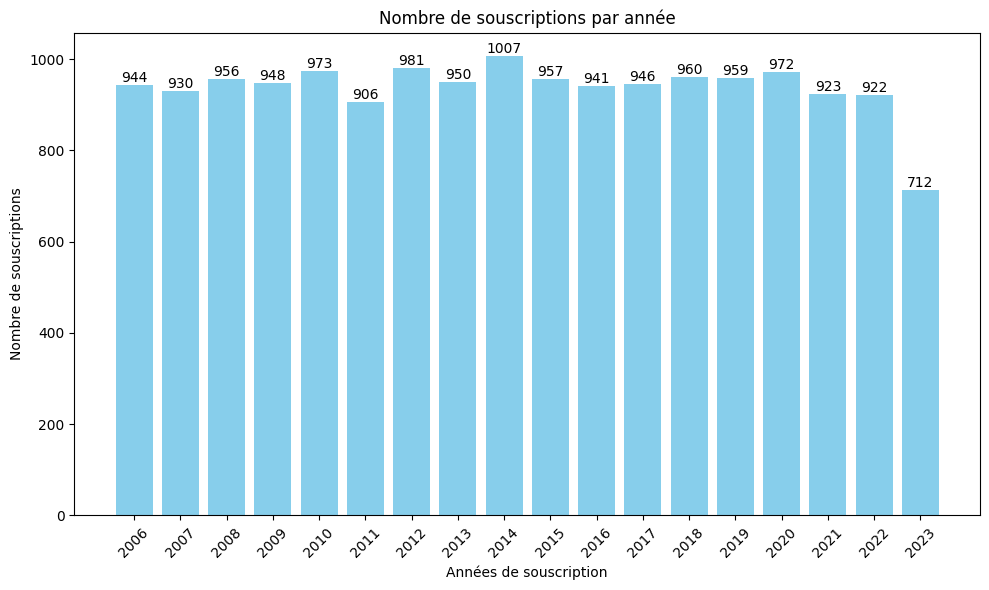

In [ ]:
df_souscription_an = df2["répartition année"].value_counts().to_frame()
df_souscription_an = df_souscription_an.sort_values(by="répartition année")

import matplotlib.pyplot as plt

# Data
annee_souscription = df_souscription_an.index
nombre_souscriptions = df_souscription_an['count']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(annee_souscription, nombre_souscriptions, color='skyblue')

# Add data labels above each bar
for i, v in enumerate(nombre_souscriptions):
    plt.text(annee_souscription[i], v, str(v), ha='center', va='bottom', fontsize=10)

# Title and labels for axes
plt.title("Nombre de souscriptions par année")
plt.xlabel("Années de souscription")
plt.ylabel("Nombre de souscriptions")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()



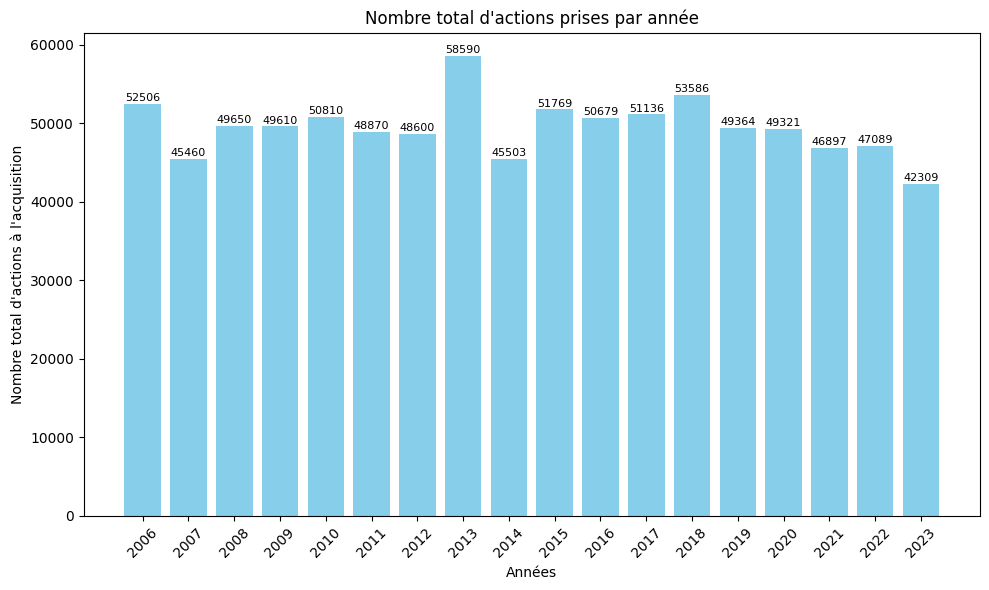

In [ ]:
df_action_an = df2.groupby('répartition année')["Nombre d'actions à l'acquisition"].sum().reset_index()

import matplotlib.pyplot as plt

# Données
annee_rachat = df_action_an['répartition année']
nombre_actions = df_action_an["Nombre d'actions à l'acquisition"]

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 6))
plt.bar(annee_rachat, nombre_actions, width=0.8, color='skyblue')  # Increase the width parameter for wider bars

# Titre et étiquettes des axes
plt.title("Nombre total d'actions prises par année")
plt.xlabel("Années")
plt.ylabel("Nombre total d'actions à l'acquisition")

# Afficher les valeurs au-dessus de chaque barre
for i, v in enumerate(nombre_actions):
    plt.text(annee_rachat[i], v + 100, str(int(v)), ha='center', va='bottom', fontsize=8)

# Faire pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le diagramme en bâtons
plt.tight_layout()
plt.show()

In [ ]:
df_actionmean_an = df2.groupby('répartition année')["Nombre d'actions à l'acquisition"].mean().reset_index()
import matplotlib.pyplot as plt

# Données du tableau
annee_acquisition = df_actionmean_an['répartition année']
nombre_actions_acquisition = df_actionmean_an["Nombre d'actions à l'acquisition"]

# Créer le diagramme en bâtons
plt.bar(annee_acquisition, nombre_actions_acquisition)

# Ajouter les étiquettes de valeurs sur chaque barre
for i in range(len(annee_acquisition)):
    plt.text(annee_acquisition[i], nombre_actions_acquisition[i], str(int(nombre_actions_acquisition[i])),
             ha='center', va='bottom')

# Titre et étiquettes des axes
plt.title("Nombre moyen d'actions par souscription par année")
plt.xlabel("Année d'acquisition")
plt.ylabel("Nombre moyen d'actions à l'acquisition")

# Incliner les années sur l'axe des abscisses
plt.xticks(rotation=45)
# Afficher le diagramme
plt.tight_layout()
plt.show()

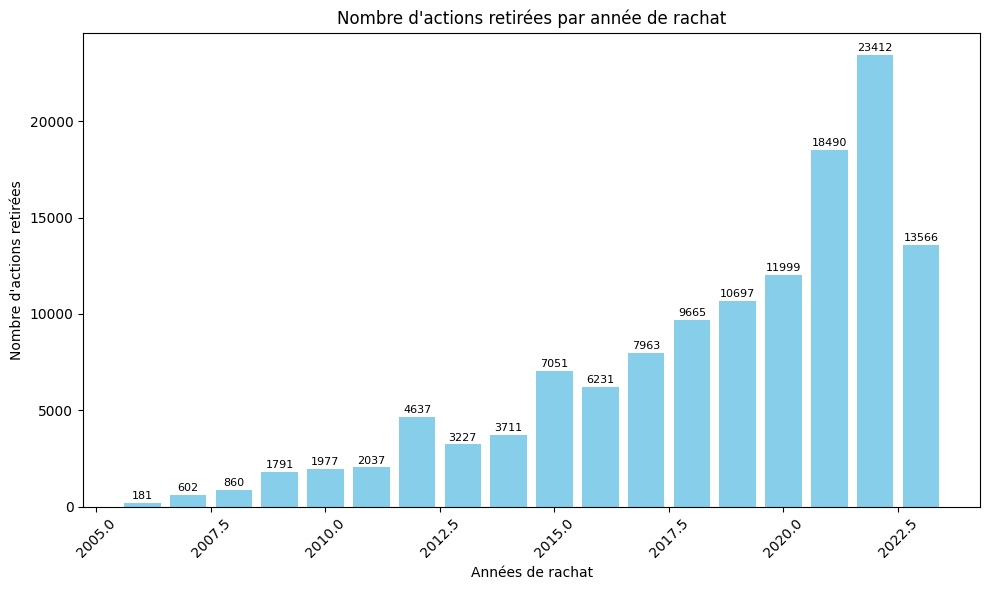

In [ ]:

df_perteaction_an = df_rachat.groupby('année rachat')["Nombre d'actions échangées"].sum().reset_index()
import matplotlib.pyplot as plt

# Données
annee_rachat = df_perteaction_an['année rachat']
nombre_actions = df_perteaction_an['Nombre d\'actions échangées']

# Créer le diagramme en bâtons
plt.figure(figsize=(10, 6))
plt.bar(annee_rachat, nombre_actions, color='skyblue')

# Titre et étiquettes des axes
plt.title("Nombre d'actions retirées par année de rachat")
plt.xlabel("Années de rachat")
plt.ylabel("Nombre d'actions retirées")

# Afficher les valeurs au-dessus de chaque barre
for i, v in enumerate(nombre_actions):
    plt.text(annee_rachat[i], v + 100, str(int(v)), ha='center', va='bottom', fontsize=8)

# Faire pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le diagramme en bâtons
plt.tight_layout()
plt.show()

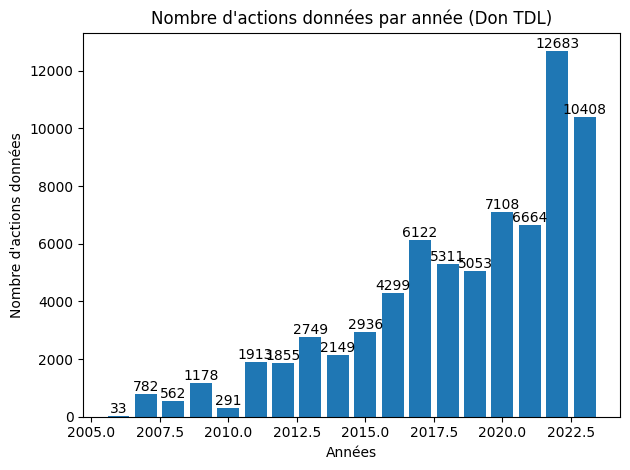

In [ ]:

df_donaction_an = df_dongraph.groupby('année rachat')["Nombre d'actions échangées"].sum().reset_index()

import matplotlib.pyplot as plt

# Données du tableau
annee_rachat = df_donaction_an['année rachat']
nombre_actions = df_donaction_an['Nombre d\'actions échangées']

# Créer le diagramme en bâtons
plt.bar(annee_rachat, nombre_actions)

# Ajouter les étiquettes de valeur au-dessus des barres
for x, y in zip(annee_rachat, nombre_actions):
    plt.text(x, y, str(int(y)), ha='center', va='bottom')

# Titre et étiquettes des axes
plt.title("Nombre d'actions données par année (Don TDL)")
plt.xlabel("Années")
plt.ylabel("Nombre d'actions données")

# Afficher le diagramme
plt.tight_layout()
plt.show()
